# INTRO: Employee Attrition (1/2)

## Configurations 

In [79]:
# Run the pre-configuration script
%run pre_configure.py

# Import my modules
import common_utils as cu
import model_utils as mu
import plotting_utils as pu

### Using Contextual Help in Binder 💡
<p style="margin-left: 20px;">
To view the code for any function or class in this notebook, you can use the "Contextual Help" feature in JupyterLab. Follow these steps:
</p>

1. **Run the cell above:**
   Run the cell above containing the import statements to enable the "Contextual Help" feature.

2. **Select "Contextual Help":**
   Right-click the cell above to open the context menu, then click on "Show Contextual Help". A window will open on the right.

3. **Click on the Name:**
   Click on any function or class name prefixed with cu., mu., or pu. you are interested in. For example, 'cu.EnvironmentChecker' below.

4. **View the Code:**
   The code and documentation for the selected function or class will appear in the right sidebar throughout this project.

<p style="margin-left: 20px;">
This feature is particularly useful for understanding how the functions and classes work without leaving the notebook. To explore all functions, including helper functions, <br>click on the module aliases directly to read through the underlying code.
</p>


<div style="background-color: #F8FDFD; padding: 5px;">

For this project, I also developed an interactive Tableau dashboard to provide visual insights through dynamic filters. 
Explore the dashboard by clicking <a href="https://public.tableau.com/views/BT_Retention_Dashboard/viz?:language=de-DE&:sid=&:display_count=n&:origin=viz_share_link&:embed=y&:showVizHome=no&:toolbar=no" style="color: #6fa5a9; font-weight: bold;">here</a>. 

In [2]:
# ---------------------- CHECK ENV ---------------------- #
env_checker = cu.EnvironmentChecker()

INFO:root:Running in an interactive environment (e.g., Jupyter).


In [3]:
# ---------------------- SET BASE_PATH ---------------------- #
os.environ['BASE_PATH'] = "C:/Users/Barba/BT_Employee_Attrition"

manager = cu.DataFrameManager(os.getenv('BASE_PATH'))

## Load Data

In [4]:
# ---------------------- LOAD DATA ---------------------- #
df = manager.load_data("IBM_HR_Attrition.xlsx", "data")

INFO:root:No JSON dtype file found. Data types might not be fully restored.
INFO:root:'IBM_HR_Attrition.xlsx' loaded successfully from C:/Users/Barba/BT_Employee_Attrition\data\IBM_HR_Attrition.xlsx, 
 -> shape: (1470, 37)



In [5]:
df.head()

Age Attrition  Avg. Satisfaction Score BusinessTravel  DailyRate            Department  DistanceFromHome   Education Field  Education    Education Label Employee Number  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  JobSatisfaction MaritalStatus  Monthly Income  MonthlyRate  NumCompaniesWorked Over18 OverTime  Percent Salary Hike  Performance Rating  Placeholder  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   33        No                      2.6  Travel_Rarely        461  Research_Development                13     Life Sciences          1        High School           E_995                        2  Female          53               3         1         Research Scientist                4        Single            3452        17241                   3      Y       No                   18                   3            0                         1             80                 0                  5                      4                3               3                   2                        0                     2
1   55       Yes                      2.6  Travel_Rarely        267                 Sales                13         Marketing          4    Master's Degree          E_1372                        1    Male          85               4         4            Sales Executive                3        Single           13695         9277                   6      Y      Yes                   17                   3            0                         3             80                 0                 24                      2                2              19                   7                        3                     8
2   45        No                      2.0  Travel_Rarely        954                 Sales                 2  Technical Degree          2  Associates Degree           E_783                        2    Male          46               1         2       Sales Representative                3        Single            6632        12388                   0      Y       No                   13                   3            0                         1             80                 0                  9                      3                3               8                   7                        3                     1
3   31        No                      2.6  Travel_Rarely       1332  Research_Development                11           Medical          2  Associates Degree          E_1251                        3    Male          80               3         2  Healthcare Representative                1       Married            6833        17089                   1      Y      Yes                   12                   3            0                         4             80                 0                  6                      2                2               6                   5                        0                     1
4   58        No                      3.0  Travel_Rarely        682                 Sales                10           Medical          4    Master's Degree           E_131                        4    Male          37               3         4            Sales Executive                3        Single           13872        24409                   0      Y       No                   13                   3            0                         3             80                 0                 38                      1                2              37                  10                        1                     8

# Analysis

In [6]:
# -------------------- ANALYSIS: Function to analyse data ------------------- #

cu.analyze_dataframe(df, "HR Attrition")

INFO:root:DataFrame analysis completed successfully.

Analysis of HR Attrition Dataset:
                         Data Type  Non-Null Count  Null Count  NaN Count Percentage of NaNs
Age                          int64            1470           0          0               0.00
Attrition                   object            1470           0          0               0.00
Avg. Satisfaction Score    float64            1470           0          0               0.00
BusinessTravel              object            1470           0          0               0.00
DailyRate                    int64            1470           0          0               0.00
Department                  object            1470           0          0               0.00
DistanceFromHome             int64            1470           0          0               0.00
Education Field             object            1470           0          0               0.00
Education                    int64            1470           0          0  

## DF Comparison

In [7]:
# ---------------------- ANALYSIS: Function to compare dataframes ---------------------- #

datasets = {
    "HR Train": df,
    #"HR Test": df_test
}

# ---------------------- Iterative Processing ---------------------- #

#matched, unmatched = cu.compare_dataframes(datasets)

## Check date columns

In [8]:
# -------------------- ANALYSIS: Function to find datetypes ----------------- #

cu.check_date_columns(df)

INFO:root:No date columns were found in the DataFrame.


[]

## Check Unique Values

In [9]:
# -------------------- ANALYSIS: Function to GET UNIQUE VALUES ----------------- #

cu.check_unique_values(df, "HR")


Unique values summary for HR:


                      Column     Type                                  First Uniques  Count   Min    Max
0                        Age    int64  18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28...     43    18     60
1                  Attrition   object                                        No, Yes      2     -      -
2    Avg. Satisfaction Score  float64  1.20, 1.40, 1.60, 1.80, 2.0, 2.20, 2.40, 2...     15  1.20   4.00
3             BusinessTravel   object   Non-Travel, Travel_Frequently, Travel_Rarely      3     -      -
4                  DailyRate    int64  102, 103, 104, 105, 106, 107, 109, 111, 11...    886   102   1499
5                 Department   object   Human Resources, Research_Development, Sales      3     -      -
6           DistanceFromHome    int64  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...     29     1     29
7            Education Field   object  Human Resources, Life Sciences, Marketing,...      6     -      -
8                  Edu

## Check duplicates

In [10]:
# -------------------- ANALYSIS: Function to check duplicates ----------------- #

cu.check_duplicates(df)

Duplicates in Dataset:
No duplicate rows found out of total 1470 rows.



## Check missing values

In [11]:
# ------------------- ANALYSIS: Function to check missing values ----------------- #

cu.check_missing_values(df)

Missing values in Dataset:
No missing values found.



# EDA
## Multivariate Analysis

INFO:root:Target 'Attrition' encoded.
INFO:root:Dropping non-numeric columns: ['BusinessTravel', 'Department', 'Education Field', 'Education Label', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
INFO:root:Features with no variation (constant): ['Placeholder', 'StandardHours']


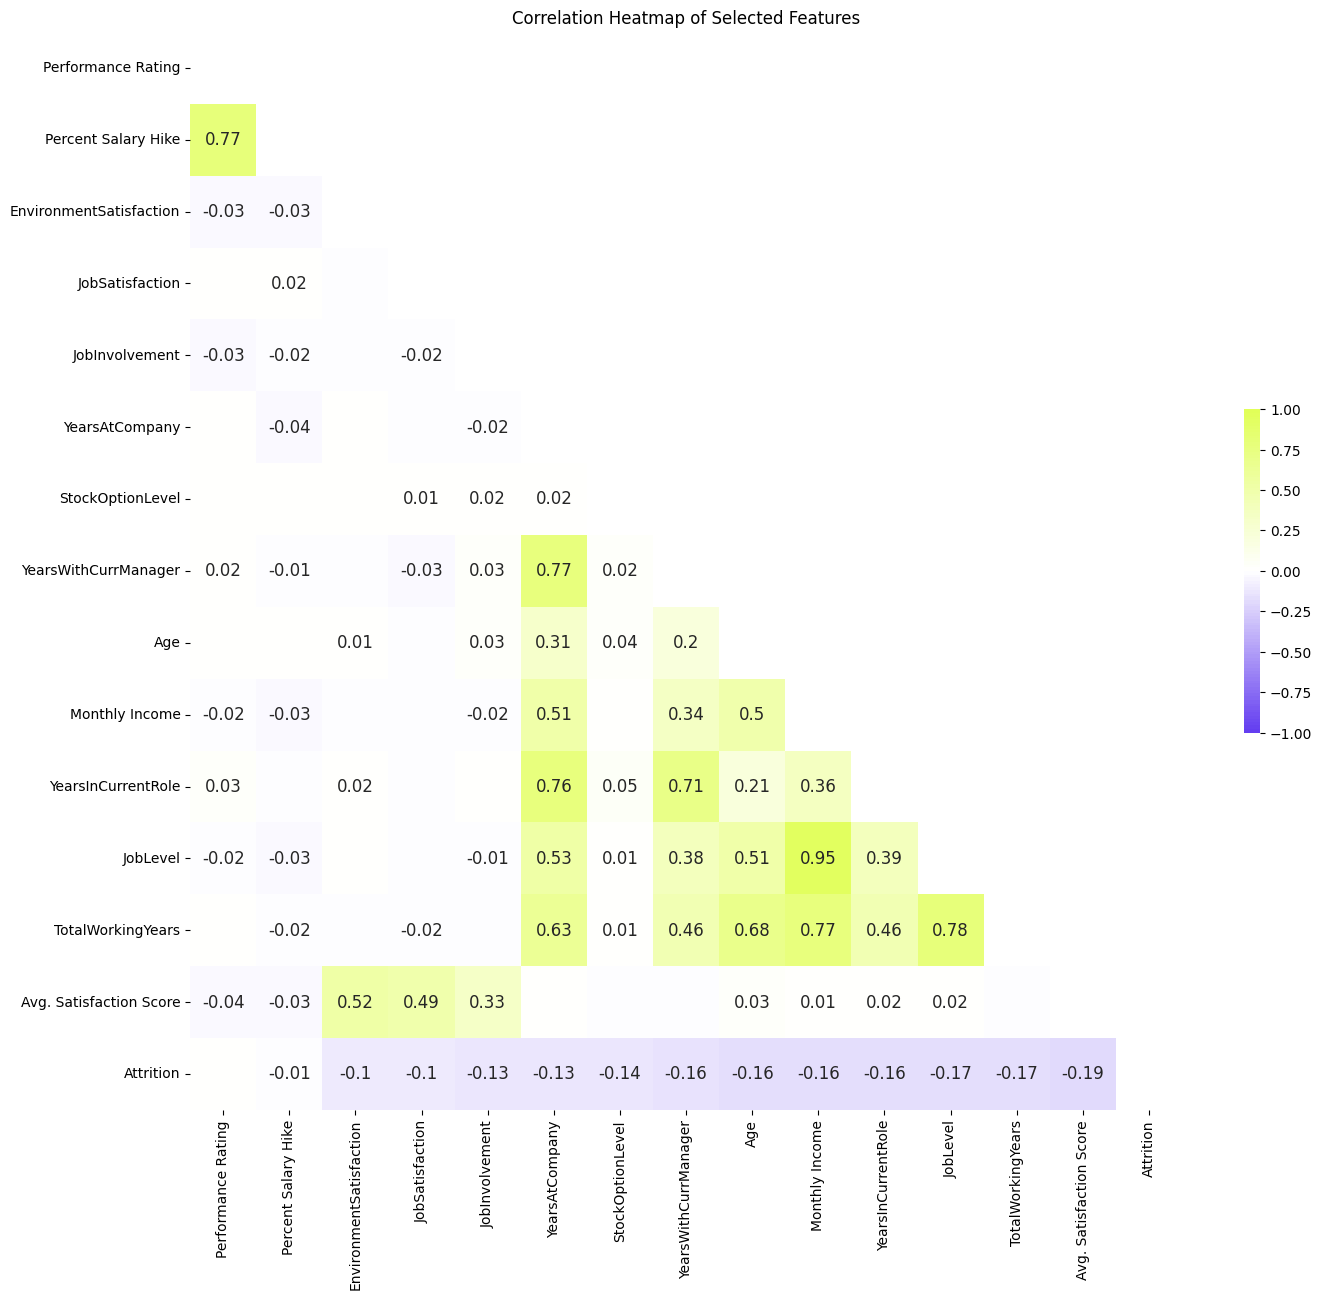

In [12]:
# ---------------------- Exploratory Data Analysis (EDA): Multivariate Analysis ----------------- #

analyzer = pu.DataAnalyzer(df, target_column='Attrition', exclude_cols=['Employee Number'])
insights, highly_corr_df = analyzer.generate_insights()

## Univariate Analysis: Categorical

In [13]:
# ---------------------- Exploratory Data Analysis (EDA): MULTIPLE CATEGORICAL ANALYSIS ----------------- #

plotter = pu.CategoricalPlot(df, dataset_name='Dataset', exclude_cols='Employee Number')

## Univariate Analysis: Numerical 

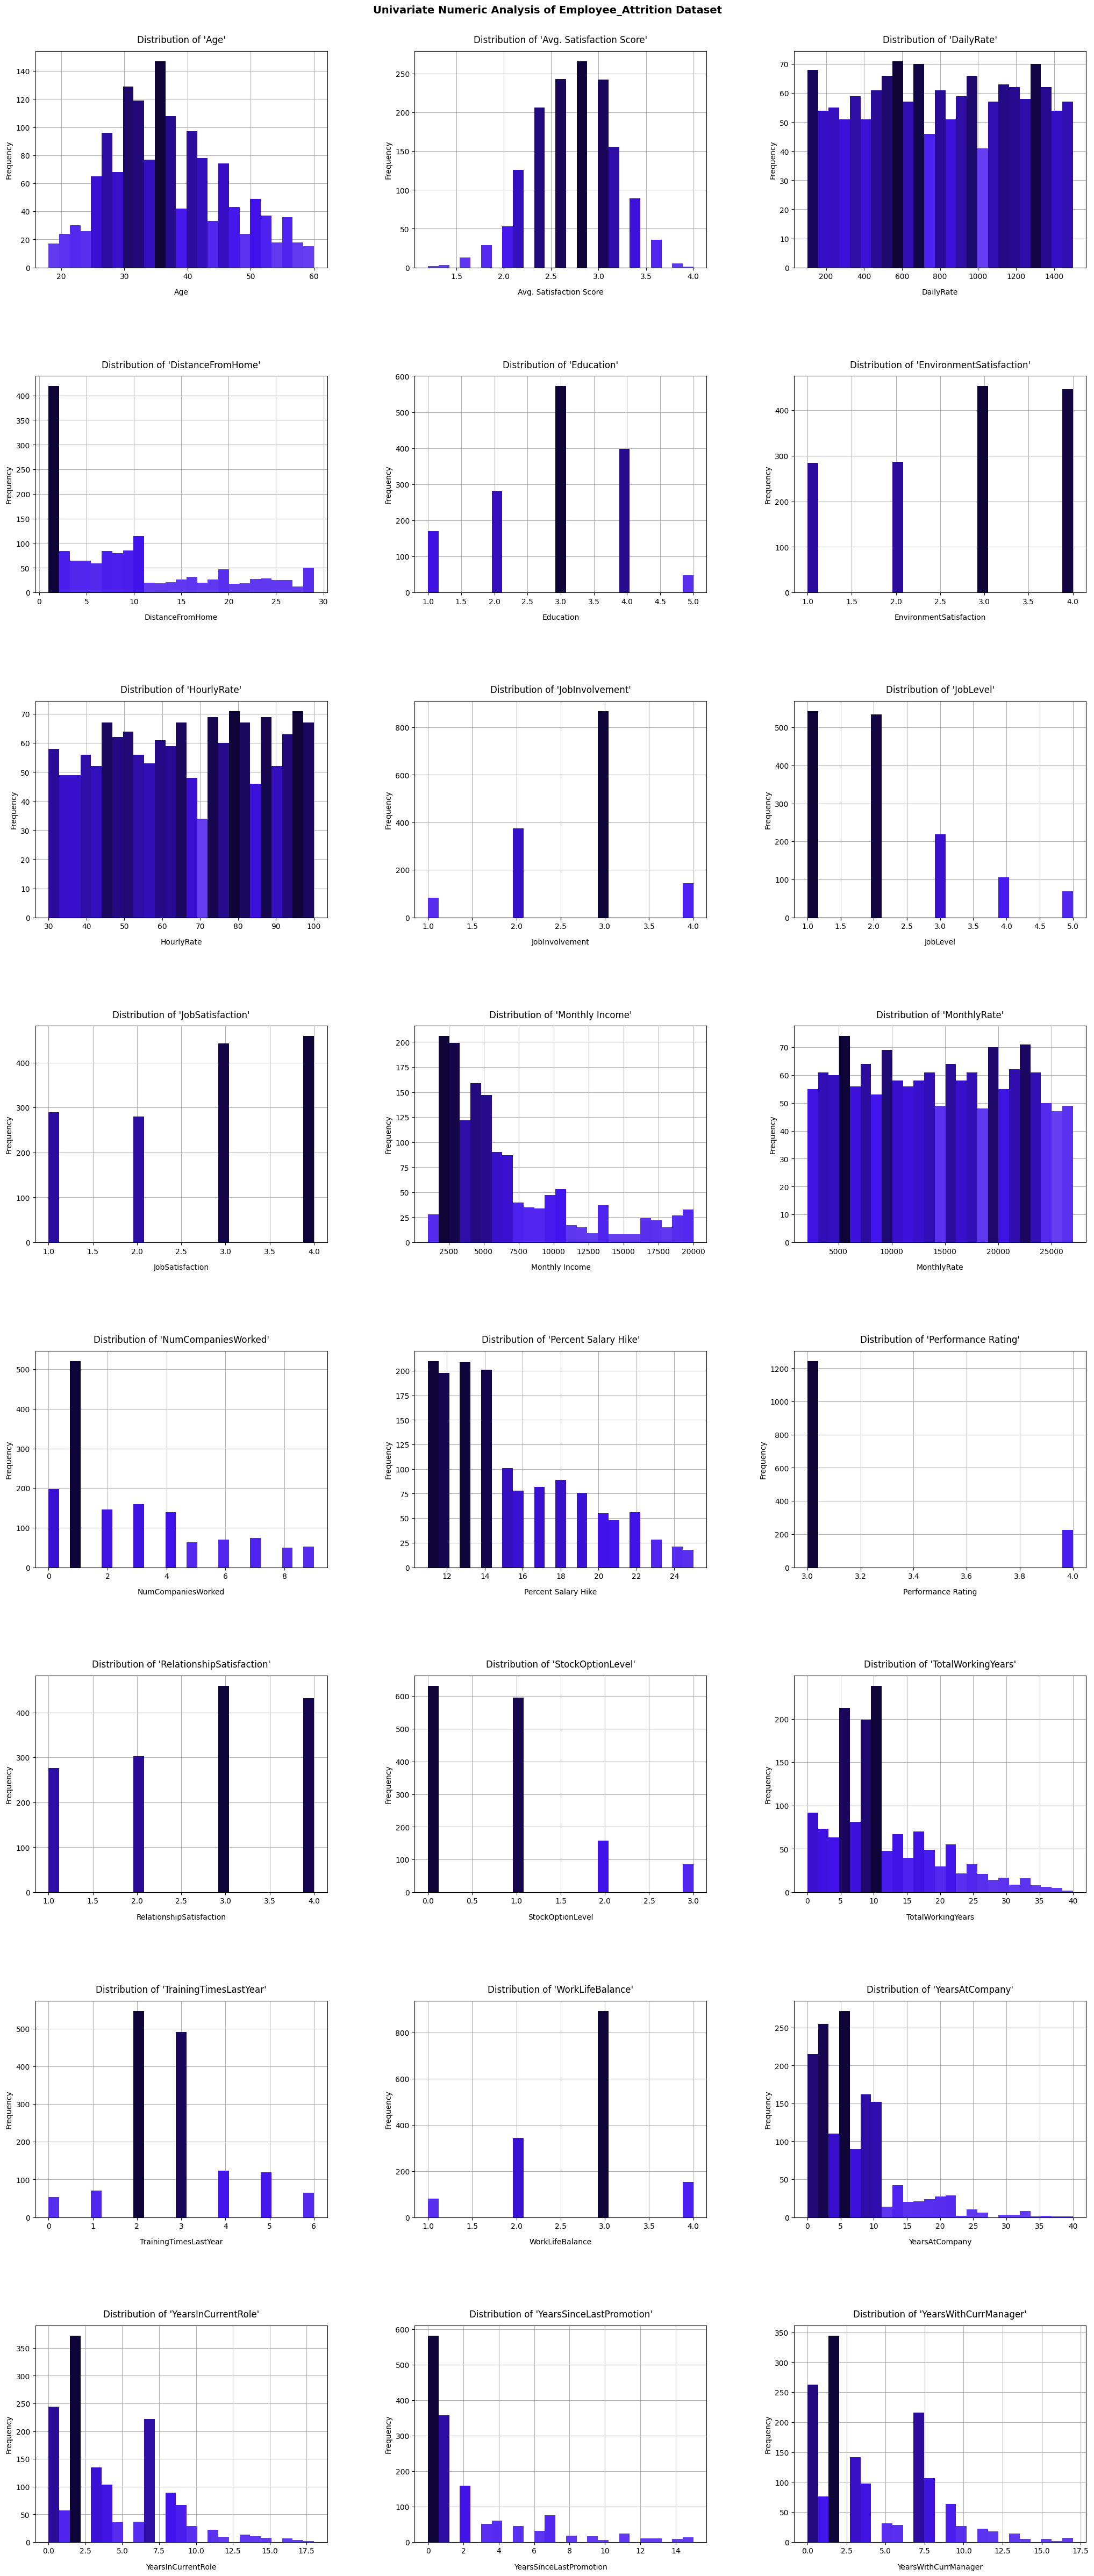

In [14]:
# ---------------------- Exploratory Data Analysis (EDA): UNIVARIATE ANALYSIS (numerical) ----------------- #

plots = pu.NumericAnalysis(df, dataset_name='Employee_Attrition Dataset', variance_threshold=0.05)

#plots = pu.numeric_analysis(df, dataset_name='Employee_Attrition Dataset', variance_threshold=0.05


In [15]:
# ---------------------- Exploratory Data Analysis (EDA): Uniques per numerical features ----------------- #

fig = pu.plot_unique_values(df, log_scale=True)

## Outliers

In [16]:
# ---------------------- Exploratory Data Analysis (EDA): Outliers Detection ----------------- #

pu.detect_outliers(df, log_scale=True)

INFO:root: Skipping features with variance lower than 0.03: Performance Rating (variance: 0.1301936159079016, unique values: 2), Placeholder (variance: 0.0, unique values: 1), StandardHours (variance: 0.0, unique values: 1)


In [17]:
# ---------------------- STRIP CHARTS: DISTRIBUTION & PATTERNS ---------------------- #

pu.strip_chart(df, log_scale=True)

INFO:root: Skipping features with variance lower than 0.03: Performance Rating (variance: 0.1301936159079016, unique values: 2), Placeholder (variance: 0.0, unique values: 1), StandardHours (variance: 0.0, unique values: 1)


## Distribution of target

In [18]:
# ---------------------- EDA: Distribution of specific categorical feature ----------------- #

pu.create_pie_chart(df, categorical_feature='Attrition')                                                          

INFO:root:The feature 'Attrition' is treated as categorical.


In [19]:
cu.check_unique_values(df)


Unique values summary for Dataset:


                      Column     Type                                  First Uniques  Count   Min    Max
0                        Age    int64  18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28...     43    18     60
1                  Attrition   object                                        No, Yes      2     -      -
2    Avg. Satisfaction Score  float64  1.20, 1.40, 1.60, 1.80, 2.0, 2.20, 2.40, 2...     15  1.20   4.00
3             BusinessTravel   object   Non-Travel, Travel_Frequently, Travel_Rarely      3     -      -
4                  DailyRate    int64  102, 103, 104, 105, 106, 107, 109, 111, 11...    886   102   1499
5                 Department   object   Human Resources, Research_Development, Sales      3     -      -
6           DistanceFromHome    int64  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...     29     1     29
7            Education Field   object  Human Resources, Life Sciences, Marketing,...      6     -      -
8                

# Initial Split

In [20]:
# ---------------------- PREPROCESSING: Split Dataframe into Train and Test Sets ---------------------- #

df_train, df_test = cu.split_data(df, 
                               target='Attrition', 
                               test_size=0.3,
                               )

INFO:root:Data successfully split into training and testing sets. Training set size: 1029, Testing set size: 441


In [21]:
df_train.head()

Age Attrition  Avg. Satisfaction Score     BusinessTravel  DailyRate            Department  DistanceFromHome Education Field  Education    Education Label Employee Number  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  Monthly Income  MonthlyRate  NumCompaniesWorked Over18 OverTime  Percent Salary Hike  Performance Rating  Placeholder  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
141    30        No                      2.6      Travel_Rarely        793  Research_Development                16   Life Sciences          1        High School          E_1729                        2    Male          33               3         1     Research Scientist                4       Married            2862         3811                   1      Y       No                   12                   3            0                         2             80                 1                 10                      2                2              10                   0                        0                     8
46     29        No                      3.0  Travel_Frequently        490  Research_Development                10   Life Sciences          3  Bachelor's Degree          E_1143                        4  Female          61               3         1     Research Scientist                2      Divorced            3291        17940                   0      Y       No                   14                   3            0                         4             80                 2                  8                      2                2               7                   5                        1                     1
1218   50        No                      2.6      Travel_Rarely       1452  Research_Development                11   Life Sciences          3  Bachelor's Degree           E_226                        3  Female          53               3         5                Manager                2        Single           19926        17053                   3      Y       No                   15                   3            0                         2             80                 0                 21                      5                3               5                   4                        4                     4
203    42        No                      2.2      Travel_Rarely        201  Research_Development                 1   Life Sciences          4    Master's Degree           E_517                        2  Female          95               3         1  Laboratory Technician                1      Divorced            2576        20490                   3      Y       No                   16                   3            0                         2             80                 1                  8                      5                3               5                   2                        1                     2
1450   30        No                      2.8      Travel_Rarely        330       Human Resources                 1   Life Sciences          3  Bachelor's Degree          E_1499                        3    Male          46               3         1        Human Resources                3      Divorced            2064        15428                   0      Y       No                   21                   4            0                         1             80                 1                  6                      3                4               5                   3                        1                     3

# Data Cleaning

## Sorting Columns

In [22]:
# ---------------------- PREPROCESSING: Sorting columns ----------------- #
sorted_datasets = cu.sort_columns(datasets={
    "DF Train": df_train,
    "DF Test": df_test,
})

# Update df_train and df_test with their sorted versions
df_train = sorted_datasets["DF Train"]
df_test = sorted_datasets["DF Test"]

INFO:root:Shape of DF Train: (1029, 37)

DF Train - Sorted Features (A to Z):
Age
Attrition
Avg. Satisfaction Score
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
Education Field
Education Label
Employee Number
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
Monthly Income
MonthlyRate
NumCompaniesWorked
Over18
OverTime
Percent Salary Hike
Performance Rating
Placeholder
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager

---------------------------------------------
INFO:root:Shape of DF Test: (441, 37)

DF Test - Sorted Features (A to Z):
Age
Attrition
Avg. Satisfaction Score
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
Education Field
Education Label
Employee Number
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
Mari

## Data Conversion

In [23]:
# --------------------------- PREPROCESSING: Data Type Conversion -------------------- #

manual_conversions_1={
        'Attrition':'category', 
        'Employee Number':'category'
}

preprocessor = cu.DataPreprocessor(
    manual_conversions=manual_conversions_1,
    max_unique_values_for_category=50
)

datasets = {
    "DF Train": df_train.copy(),  # Create a copy for modification
    "DF Test": df_test.copy()     # Create a copy for modification
}

# Iterate over each dataset, apply type conversions, and store the results
for dataset_name, df in datasets.items():
    preprocessor.dataset_name = dataset_name  # Update the dataset name for logging purposes
    datasets[dataset_name] = preprocessor.convert_data_types(df)

# Extract the converted dataframes
df_train_converted = datasets["DF Train"]
df_test_converted = datasets["DF Test"]

INFO:root:Manually converted Attrition to category
INFO:root:Manually converted Employee Number to category
INFO:root:Automatically converted BusinessTravel to category
INFO:root:Automatically converted Department to category
INFO:root:Automatically converted Education Field to category
INFO:root:Automatically converted Education Label to category
INFO:root:Automatically converted Gender to category
INFO:root:Automatically converted JobRole to category
INFO:root:Automatically converted MaritalStatus to category
INFO:root:Automatically converted Over18 to category
INFO:root:Automatically converted OverTime to category

DF Train - Data Type Conversion:
                      Column   Before     After
0                        Age    int64      int8
1                  Attrition   object  category
2    Avg. Satisfaction Score  float64   float32
3             BusinessTravel   object  category
4                  DailyRate    int64     int16
5                 Department   object  category
6    

## Data Validation 

In [24]:
# --------------------------- PREPROCESSING CLASS: DATA VALIDATION -------------------- #

validation_rules = {}

# Usage with auto validation
Validator = cu.DataValidator(df_train_converted, validation_rules, exclude_cols=['Attrition','Employee Number'])

INFO:root: 2 different error types were detected in the dataframe


## Removing duplicates

In [25]:
# ---------------------- PREPROCESSING: Removing Duplicates ---------------------- #

datasets = {
    "Train Data": df_train_converted.copy(),
    "Test Data": df_test_converted.copy()
}

# ---------------------- Iterative Processing ---------------------- #
# Process each dataset to remove duplicates and print results
for name, dataset in datasets.items():
    datasets[name] = cu.remove_duplicates(dataset, name) 

df_train_deduped = datasets["Train Data"]
df_test_deduped = datasets["Test Data"]


Train Data - Duplicate Removal:
  Shape before removal: (1029, 37)
  Shape after removal: (1029, 37)
  Number of duplicates removed: 0
INFO:root:No duplicates found in Train Data.

Test Data - Duplicate Removal:
  Shape before removal: (441, 37)
  Shape after removal: (441, 37)
  Number of duplicates removed: 0
INFO:root:No duplicates found in Test Data.


## Handling missing values

In [26]:
# ----------------- PREPROCESSING: Handling Missing Values ----------------- #

# Initialize and use the MissingValueHandler
handler = cu.MissingValueHandler(target_variable='Attrition')
handler.fit(df_train)  # Fit only on training data

# Apply imputation to both training and test data
df_train_imputed = handler.transform(df_train)
df_test_imputed = handler.transform(df_test)


INFO:root:MissingValueHandler initialized successfully.
INFO:root:Calculated medians for features: {'Age': 36.0, 'Avg. Satisfaction Score': 2.8, 'DailyRate': 805.0, 'DistanceFromHome': 7.0, 'Education': 3.0, 'EnvironmentSatisfaction': 3.0, 'HourlyRate': 65.0, 'JobInvolvement': 3.0, 'JobLevel': 2.0, 'JobSatisfaction': 3.0, 'Monthly Income': 4851.0, 'MonthlyRate': 14218.0, 'NumCompaniesWorked': 2.0, 'Percent Salary Hike': 14.0, 'Performance Rating': 3.0, 'Placeholder': 0.0, 'RelationshipSatisfaction': 3.0, 'StandardHours': 80.0, 'StockOptionLevel': 1.0, 'TotalWorkingYears': 10.0, 'TrainingTimesLastYear': 3.0, 'WorkLifeBalance': 3.0, 'YearsAtCompany': 5.0, 'YearsInCurrentRole': 3.0, 'YearsSinceLastPromotion': 1.0, 'YearsWithCurrManager': 3.0}
                     Feature  Missing Before  Missing After
0                        Age               0              0
1                  Attrition               0              0
2    Avg. Satisfaction Score               0              0
3         

# Data Transformation 

## Categorical Encoding

In [27]:
# ---------------------- PREPROCESSING: Encoding Categorical Variables ---------------------- #

manual_encoding = {
    'Gender': {
        'method': 'label',
        'mapping': {'Female': 1, 'Male': 0}
    },
    'Attrition': {
        'method': 'label',
        'mapping': {'Yes': 1, 'No': 0}
    },
    'OverTime': {
        'method': 'label',
        'mapping': {'Yes': 1, 'No': 0}
    },
    'Over18': {
        'method': 'label',
        'mapping': {'Y': 1, 'N': 0}
    },
    'MaritalStatus': {
        'method': 'label',
        'mapping': {'Divorced': 3, 'Married': 2,'Single': 1}
    },
    'BusinessTravel': {
        'method': 'label',
        'mapping': {'Non-Travel': 0, 'Travel_Frequently': 2,'Travel_Rarely': 1}
    }
}

encoder = cu.CategoricalEncoder(
    target_column='Attrition', exclude_columns=['Employee Number','Education Label'], 
    one_hot_threshold=10, manual_encoding=manual_encoding
)

df_train_encoded = encoder.encode_dataframe(df_train_imputed, "DF Train")
df_test_encoded = encoder.encode_dataframe(df_test_imputed, "DF Test")

INFO:root:Encoding completed successfully in DF Train.



Encoding Results for DF Train:
Dataset Name: DF Train
Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'Education Field', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Original Shape: (1029, 37)
New Shape: (1029, 52)
Newly Added Columns: ['Department_Human Resources', 'Department_Research_Development', 'Department_Sales', 'Education Field_Life Sciences', 'Education Field_Medical', 'Education Field_Technical Degree', 'Education Field_Human Resources', 'Education Field_Marketing', 'Education Field_Other', 'JobRole_Healthcare Representative', 'JobRole_Research Scientist', 'JobRole_Research Director', 'JobRole_Sales Executive', 'JobRole_Human Resources', 'JobRole_Manager', 'JobRole_Laboratory Technician', 'JobRole_Sales Representative', 'JobRole_Manufacturing Director']
Newly Added Column Count: 18

---------------------------------------------------------------------------
INFO:root:Encoding completed successfully in DF Test.

Encoding Results for DF Test:

In [28]:
# -------------------------- PREPROCESSING: SORT ------------------- #

sorted_datasets = cu.sort_columns(datasets={
    "DF Train": df_train_encoded.copy(),
    "DF Test": df_test_encoded.copy(),
})

df_train_encoded = sorted_datasets["DF Train"]
df_test_encoded = sorted_datasets["DF Test"]

INFO:root:Shape of DF Train: (1029, 52)

DF Train - Sorted Features (A to Z):
Age
Attrition
Avg. Satisfaction Score
BusinessTravel
DailyRate
Department_Human Resources
Department_Research_Development
Department_Sales
DistanceFromHome
Education
Education Field_Human Resources
Education Field_Life Sciences
Education Field_Marketing
Education Field_Medical
Education Field_Other
Education Field_Technical Degree
Education Label
Employee Number
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative
JobSatisfaction
MaritalStatus
Monthly Income
MonthlyRate
NumCompaniesWorked
Over18
OverTime
Percent Salary Hike
Performance Rating
Placeholder
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBal

## Updating Data

In [29]:
# ---------------------- PREPROCESSING: UPDATE & RENAME ---------------------- #

# Define rename_map to select columns to rename
rename_map = {
    #'invoice_date_count': 'count_of_invoices'
}

# Define columns to drop or select (use only one of these options at a time)
columns_to_drop= ['Education Label']

# Or, selecting columns:
columns_to_select = ['XY', 'XYY'] 


# Process DF Train
preprocessor = cu.DataFramePreprocessor(rename_map=rename_map,columns_to_drop=columns_to_drop,columns_to_select=columns_to_select)

df_train_V1 = preprocessor.process_dataframe(df_train_encoded.copy(), 'DF Train')
df_test_V1 = preprocessor.process_dataframe(df_test_encoded.copy(), 'DF Test')


INFO:root:Columns dropped successfully: ['Education Label']
INFO:root:DF Train processed from shape (1029, 52) to (1029, 51).

INFO:root:Columns dropped successfully: ['Education Label']
INFO:root:DF Test processed from shape (441, 52) to (441, 51).



## Binning

In [30]:
# -------------------------- PREPROCESSING: Binning & Fixing Errors ------------------- #

binning_rules = {
    'Age': {
        'bins': [17, 25, 35, 45, 55, float('inf')],
        'labels': ['18-25', '26-35', '36-45','46-55', '>55']
    },
    'Monthly Income': {
        'bins': [0, 5000, 10000, 15000, 20000, float('inf')],
        'labels': ['0K-5K', '5K-10K', '10K-15K', '15K-20K', '>20K'],
        'right': False
    },
    'Percent Salary Hike': {
        'bins': [10, 15, 20, 25, float('inf')],
        'labels': ['11%-15%', '16%-20%', '21%-25%', '>25%']
    },
    'TotalWorkingYears': {
        'bins': [0, 5, 10, 15, 20, 30, float('inf')],
        'labels': ['0-5', '6-10', '11-15', '16-20', '21-30', '>31']
    },
    'YearsAtCompany': {
        'bins': [0, 2, 5, float('inf')],
        'labels': ['0-2', '3-5', '>5']
    }
}

# Process DF Train
binner = cu.DataBinner(binning_rules)

df_train_binned = binner.apply_binning(df_train_V1.copy(), 'DF Train')
df_test_binned = binner.apply_binning(df_test_V1.copy(), 'DF Test')


INFO:root:Binning successfully applied to DF Train. Columns: ['Age', 'Monthly Income', 'Percent Salary Hike', 'TotalWorkingYears', 'YearsAtCompany']
INFO:root:Binning successfully applied to DF Test. Columns: ['Age', 'Monthly Income', 'Percent Salary Hike', 'TotalWorkingYears', 'YearsAtCompany']


In [31]:
filtered_rows = df_train_binned[df_train_binned['TotalWorkingYears'] == 0]
filtered_rows.head()


Age  Attrition  Avg. Satisfaction Score  BusinessTravel  DailyRate  Department_Human Resources  Department_Research_Development  Department_Sales  DistanceFromHome  Education  Education Field_Human Resources  Education Field_Life Sciences  Education Field_Marketing  Education Field_Medical  Education Field_Other  Education Field_Technical Degree Employee Number  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole_Healthcare Representative  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  JobRole_Research Scientist  JobRole_Sales Executive  JobRole_Sales Representative  JobSatisfaction  MaritalStatus  Monthly Income  MonthlyRate  NumCompaniesWorked  Over18  OverTime  Percent Salary Hike  Performance Rating  Placeholder  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1357   18          0                      3.6               0       1124                           0                                1                 0                 1          3                                0                              1                          0                        0                      0                                 0          E_1368                        4       1          97               3         1                                  0                        0                              1                0                               0                          0                           0                        0                             0                4              1            1611        19305                   1       1         0                   15                   3            0                         3             80                 0                  0                      5                4               0                   0   
467    18          0                      2.4               0       1431                           0                                1                 0                14          3                                0                              0                          0                        1                      0                                 0          E_1839                        2       1          33               3         1                                  0                        0                              0                0                               0                          0                           1                        0                             0                3              1            1514         8018                   1       1         0                   16                   3            0                         3             80                 0                  0                      4                1               0                   0   
95     18          0                      2.6               1        812                           0                                0                 1                10          3                                0                              0                          0                        1                      0                                 0           E_411                        4       1          69               2         1                                  0                        0                              0                0                               0                          0                           0                        0                             1                3              1            1200         9724                   1       1         0                   12                   3            0                         1             80                 0                  0                      2                3               0                   0   
98

In [32]:
# ------------------- Execute save dataframes function & print results ----------------- #

# Call the save_dataframe function
## PARQUET
cu.save_df(df_train_binned, df_name='df_train_binned', directory='Saved_Dataframes', format='parquet')
cu.save_df(df_test_binned, df_name='df_test_binned', directory='Saved_Dataframes', format='parquet')

## CSV
cu.save_df(df_train_binned, df_name='df_train_binned', directory='Saved_Dataframes', format='csv', max_rows=10000)
cu.save_df(df_test_binned, df_name='df_test_binned', directory='Saved_Dataframes', format='csv', max_rows=10000)

INFO:root:Created directory for saving dataframes.
INFO:root:DataFrame saved successfully as df_train_binned.parquet
INFO:root:DataFrame saved successfully.
INFO:root:Created directory for saving dataframes.
INFO:root:DataFrame saved successfully as df_test_binned.parquet
INFO:root:DataFrame saved successfully.
INFO:root:Created directory for saving dataframes.
INFO:root:DataFrame saved successfully as df_train_binned.csv
INFO:root:DataFrame saved successfully.
INFO:root:Created directory for saving dataframes.
INFO:root:DataFrame saved successfully as df_test_binned.csv
INFO:root:DataFrame saved successfully.


## Handling Missing Values V2

In [33]:
# ----------------- PREPROCESSING: Handling Missing Values ----------------- #

# Initialize and use the MissingValueHandler
handler = cu.MissingValueHandler(target_variable='Attrition')
handler.fit(df_train_binned)  # Fit only on training data

# Apply imputation to both training and test data
df_train_imputed_2 = handler.transform(df_train_binned)
df_test_imputed_2 = handler.transform(df_test_binned)

INFO:root:MissingValueHandler initialized successfully.
INFO:root:Calculated medians for features: {'Age': 36.0, 'Avg. Satisfaction Score': 2.8, 'BusinessTravel': 1.0, 'DailyRate': 805.0, 'Department_Human Resources': 0.0, 'Department_Research_Development': 1.0, 'Department_Sales': 0.0, 'DistanceFromHome': 7.0, 'Education': 3.0, 'Education Field_Human Resources': 0.0, 'Education Field_Life Sciences': 0.0, 'Education Field_Marketing': 0.0, 'Education Field_Medical': 0.0, 'Education Field_Other': 0.0, 'Education Field_Technical Degree': 0.0, 'EnvironmentSatisfaction': 3.0, 'Gender': 0.0, 'HourlyRate': 65.0, 'JobInvolvement': 3.0, 'JobLevel': 2.0, 'JobRole_Healthcare Representative': 0.0, 'JobRole_Human Resources': 0.0, 'JobRole_Laboratory Technician': 0.0, 'JobRole_Manager': 0.0, 'JobRole_Manufacturing Director': 0.0, 'JobRole_Research Director': 0.0, 'JobRole_Research Scientist': 0.0, 'JobRole_Sales Executive': 0.0, 'JobRole_Sales Representative': 0.0, 'JobSatisfaction': 3.0, 'MaritalSt

## Categorical Encoding

In [34]:
# ---------------------- PREPROCESSING: Encoding Categorical Variables ---------------------- #

manual_encoding_2 = {
    'Age_Group': {
        'method': 'label',
        'mapping': {'18-25': 1, '26-35': 2,'36-45': 3, '46-55': 4, '>55': 5}
    },
    'Monthly Income_Group': {
        'method': 'label',
        'mapping': {'0K-5K': 1, '5K-10K': 2, '10K-15K': 3, '15K-20K': 4, '>20K':5}
    },
    'Percent Salary Hike_Group': {
        'method': 'label',
        'mapping': {'11%-15%': 1, '16%-20%': 2, '21%-25%': 3,'>25%':4}
    },
    'TotalWorkingYears_Group': {
        'method': 'label',
        'mapping': {'0-5': 1, '6-10': 2, '11-15': 3, '16-20': 4, '21-30': 5, '>31': 6}
    },
    'YearsAtCompany_Group': {
        'method': 'label',
        'mapping': {'0-2': 1, '3-5': 2,'>5': 3}
    }
}


encoder_2 = cu.CategoricalEncoder(
    target_column='Attrition', exclude_columns=['Employee Number'], 
    one_hot_threshold=10, manual_encoding=manual_encoding_2
)

df_train_encoded_2 = encoder_2.encode_dataframe(df_train_imputed_2.copy(), "DF Train")
df_test_encoded_2 = encoder_2.encode_dataframe(df_test_imputed_2.copy(), "DF Test")

INFO:root:Encoding completed successfully in DF Train.

Encoding Results for DF Train:
Dataset Name: DF Train
Categorical Columns: ['Age_Group', 'Monthly Income_Group', 'Percent Salary Hike_Group', 'TotalWorkingYears_Group', 'YearsAtCompany_Group']
Original Shape: (1029, 56)
New Shape: (1029, 56)
Newly Added Columns: []
Newly Added Column Count: 0

---------------------------------------------------------------------------
INFO:root:Encoding completed successfully in DF Test.

Encoding Results for DF Test:
Dataset Name: DF Test
Categorical Columns: ['Age_Group', 'Monthly Income_Group', 'Percent Salary Hike_Group', 'TotalWorkingYears_Group', 'YearsAtCompany_Group']
Original Shape: (441, 56)
New Shape: (441, 56)
Newly Added Columns: []
Newly Added Column Count: 0

---------------------------------------------------------------------------


In [35]:
df_train_encoded_2.head()

Age  Attrition  Avg. Satisfaction Score  BusinessTravel  DailyRate  Department_Human Resources  Department_Research_Development  Department_Sales  DistanceFromHome  Education  Education Field_Human Resources  Education Field_Life Sciences  Education Field_Marketing  Education Field_Medical  Education Field_Other  Education Field_Technical Degree Employee Number  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole_Healthcare Representative  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  JobRole_Research Scientist  JobRole_Sales Executive  JobRole_Sales Representative  JobSatisfaction  MaritalStatus  Monthly Income  MonthlyRate  NumCompaniesWorked  Over18  OverTime  Percent Salary Hike  Performance Rating  Placeholder  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
141    30          0                      2.6               1        793                           0                                1                 0                16          1                                0                              1                          0                        0                      0                                 0          E_1729                        2       0          33               3         1                                  0                        0                              0                0                               0                          0                           1                        0                             0                4              2            2862         3811                   1       1         0                   12                   3            0                         2             80                 1                 10                      2                2              10                   0   
46     29          0                      3.0               2        490                           0                                1                 0                10          3                                0                              1                          0                        0                      0                                 0          E_1143                        4       1          61               3         1                                  0                        0                              0                0                               0                          0                           1                        0                             0                2              3            3291        17940                   0       1         0                   14                   3            0                         4             80                 2                  8                      2                2               7                   5   
1218   50          0                      2.6               1       1452                           0                                1                 0                11          3                                0                              1                          0                        0                      0                                 0           E_226                        3       1          53               3         5                                  0                        0                              0                1                               0                          0                           0                        0                             0                2              1           19926        17053                   3       1         0                   15                   3            0                         2             80                 0                 21                      5                3               5                   4   
20

In [36]:
df_test_encoded_2.head()

Age  Attrition  Avg. Satisfaction Score  BusinessTravel  DailyRate  Department_Human Resources  Department_Research_Development  Department_Sales  DistanceFromHome  Education  Education Field_Human Resources  Education Field_Life Sciences  Education Field_Marketing  Education Field_Medical  Education Field_Other  Education Field_Technical Degree Employee Number  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole_Healthcare Representative  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  JobRole_Research Scientist  JobRole_Sales Executive  JobRole_Sales Representative  JobSatisfaction  MaritalStatus  Monthly Income  MonthlyRate  NumCompaniesWorked  Over18  OverTime  Percent Salary Hike  Performance Rating  Placeholder  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
640   39          1                      3.0               2        203                           0                                1                 0                 2          3                                0                              1                          0                        0                      0                                 0          E_1127                        1       0          84               3         4                                  1                        0                              0                0                               0                          0                           0                        0                             0                4              3           12169        13547                   7       1         0                   11                   3            0                         4             80                 3                 21                      4                3              18                   7   
841   34          0                      3.0               1        810                           0                                0                 1                 8          2                                0                              0                          0                        0                      0                                 1          E_1823                        2       0          92               4         2                                  0                        0                              0                0                               0                          0                           0                        1                             0                3              2            6799        22128                   1       1         0                   21                   4            0                         3             80                 2                 10                      5                3              10                   8   
869   32          0                      2.6               0        862                           0                                0                 1                 2          1                                0                              1                          0                        0                      0                                 0          E_1190                        3       1          76               3         1                                  0                        0                              0                0                               0                          0                           0                        0                             1                1              3            2827        14947                   1       1         0                   12                   3            0                         3             80                 3                  1                      3                3               1                   0   
556  

In [37]:
# --------------------------- PREPROCESSING CLASS: DATA VALIDATION -------------------- #

validation_rules = {}

# Usage with auto validation
Validator = cu.DataValidator(df_test_encoded_2, validation_rules, exclude_cols=['Attrition','Employee Number'])

INFO:root: 2 different error types were detected in the dataframe


## Scaling

In [38]:
# ---------------------- PREPROCESSING: Data Standardization ---------------------- #

# Instantiate the DataScaler with your specific needs
scaler = cu.DataScaler(target='Attrition', exclude_cols=['Employee Number'], method="z-score")

# Fit the scaler using your training DataFrame
scaler.fit(df_train_encoded_2)

# Transform both the training and test DataFrames
df_train_scaled = scaler.transform(df_train_encoded_2)
df_test_scaled = scaler.transform(df_test_encoded_2)

INFO:root:Scaler fitted successfully.
INFO:root:Scaling applied successfully.
INFO:root:Scaling applied successfully.


In [39]:
# --------------------------- PREPROCESSING CLASS: DATA VALIDATION -------------------- #

validation_rules = {}

# Usage with auto validation
Validator = cu.DataValidator(df_train_scaled, validation_rules, exclude_cols=['Attrition','Employee Number'])

INFO:root: 0 different error types were detected in the dataframe


## Outlier detection 

In [40]:
# ---------------------- PREPROCESSING: Handling and Detecting Outliers ---------------------- #

outlier_handler = cu.OutlierHandler(target_column='Attrition', exclude_cols=['Employee Number'])

# Fit outlier handler using only the training data
outlier_handler.fit(df_train_scaled, method='iqr')

# Apply to both training and test data
df_train_flagged = outlier_handler.apply_outlier_flags(df_train_scaled)
df_test_flagged = outlier_handler.apply_outlier_flags(df_test_scaled)


In [61]:
pu.detect_outliers(df_train_flagged)

INFO:root: Skipping features with variance lower than 0.03: Department_Human Resources (variance: 1.000972762645914, unique values: 2), Department_Research_Development (variance: 1.0009727626459144, unique values: 2), Department_Sales (variance: 1.0009727626459144, unique values: 2), Education Field_Human Resources (variance: 1.0009727626459148, unique values: 2), Education Field_Life Sciences (variance: 1.0009727626459144, unique values: 2), Education Field_Marketing (variance: 1.0009727626459144, unique values: 2), Education Field_Medical (variance: 1.0009727626459142, unique values: 2), Education Field_Other (variance: 1.0009727626459146, unique values: 2), Education Field_Technical Degree (variance: 1.0009727626459144, unique values: 2), Gender (variance: 1.0009727626459146, unique values: 2), JobRole_Healthcare Representative (variance: 1.0009727626459146, unique values: 2), JobRole_Human Resources (variance: 1.000972762645914, unique values: 2), JobRole_Laboratory Technician (var

In [42]:
# Assuming df_outlier_flagged is your DataFrame
outlier_count_sum_train = df_train_flagged['outlier_count'].value_counts()
print(outlier_count_sum_train)

outlier_count
0    997
1     26
2      6
Name: count, dtype: int64


In [43]:
df_train_flagged.shape

(1029, 59)

In [44]:
# Assuming df_outlier_flagged is your DataFrame
outlier_counts_train = df_train_flagged['Is_outlier'].value_counts()

print(outlier_counts_train)

Is_outlier
0    997
1     32
Name: count, dtype: int64


In [46]:
# Assuming df_outlier_flagged is your DataFrame
outlier_counts_test = df_test_flagged['Is_outlier'].value_counts()

print(outlier_counts_test)

Is_outlier
0    406
1     35
Name: count, dtype: int64


In [47]:
# Call the function to sort columns and get the sorted DataFrames
sorted_datasets = cu.sort_columns(datasets={
    "DF Train": df_train_flagged,
    "DF Test": df_test_flagged,
})

# Update df_train and df_test with their sorted versions
df_train_flagged = sorted_datasets["DF Train"]
df_test_flagged = sorted_datasets["DF Test"]

INFO:root:Shape of DF Train: (1029, 59)

DF Train - Sorted Features (A to Z):
Age
Age_Group
Attrition
Avg. Satisfaction Score
BusinessTravel
DailyRate
Department_Human Resources
Department_Research_Development
Department_Sales
DistanceFromHome
Education
Education Field_Human Resources
Education Field_Life Sciences
Education Field_Marketing
Education Field_Medical
Education Field_Other
Education Field_Technical Degree
Employee Number
EnvironmentSatisfaction
Gender
HourlyRate
Is_outlier
JobInvolvement
JobLevel
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative
JobSatisfaction
MaritalStatus
Monthly Income
Monthly Income_Group
MonthlyRate
NumCompaniesWorked
Outlier_coefficient
Outlier_count
Over18
OverTime
Percent Salary Hike
Percent Salary Hike_Group
Performance Rating
Placeholder
RelationshipSatisfact

## Anomaly Detection

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1471 - val_loss: 1.0951
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0834 - val_loss: 1.0383
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0166 - val_loss: 0.9804
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9676 - val_loss: 0.9284
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9112 - val_loss: 0.8863
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8663 - val_loss: 0.8544
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8328 - val_loss: 0.8297
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8226 - val_loss: 0.8097
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7939 - val_loss: 0.7935
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7730 - val_loss: 0.7801
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7597 - val_loss: 0.7694
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

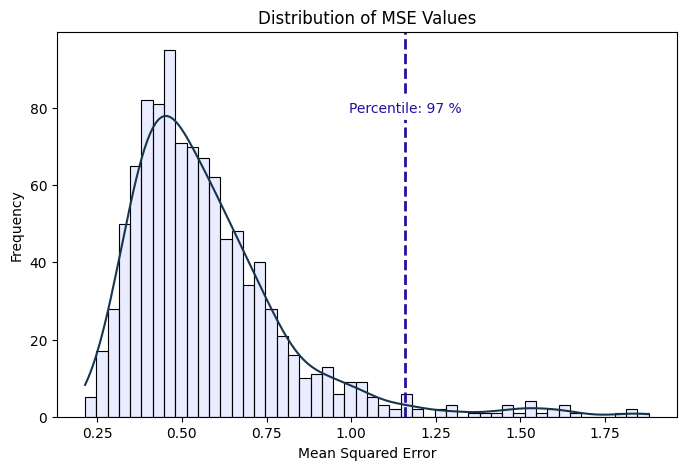

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
count    1029.000000
mean        0.577414
std         0.241839
min         0.213846
25%         0.418177
50%         0.521969
75%         0.668472
max         1.879283
dtype: float64
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
count    441.000000
mean       0.597375
std        0.230690
min        0.250072
25%        0.450944
50%        0.545781
75%        0.701704
max        2.082936
dtype: float64


In [48]:
# ---------------------- PREPROCESSING: AnomalyDetector with autoencoder ---------------------- #

# Initialize the anomaly detector
anomaly_detector = cu.AnomalyDetector(target_column='Attrition', exclude_cols=['Employee Number'], 
                batch_size=32, epochs=100, validation_split=0.2, percentile=97
                )

# Fit the anomaly detector to the training data
anomaly_detector.fit(df_train_flagged)

# Predict anomalies on both the training and test data
df_train_AE = anomaly_detector.predict(df_train_flagged)
df_test_AE = anomaly_detector.predict(df_test_flagged)


In [50]:
# Count occurrences of each value in the 'is_anomaly' column
anomaly_counts_train = df_train_AE['Is_anomaly'].value_counts()

# Display the counts
print(anomaly_counts_train)

Is_anomaly
0    998
1     31
Name: count, dtype: int64


In [51]:
# Count occurrences of each value in the 'is_anomaly' column
anomaly_counts_test = df_test_AE['Is_anomaly'].value_counts()

# Display the counts
print(anomaly_counts_test)

Is_anomaly
0    435
1      6
Name: count, dtype: int64


## Handle Class Imbalance

In [52]:
# ---------------------- PREPROCESSING: Handling Class Imbalance -------------------- #

df_train_resampled = cu.handle_class_imbalance(df=df_train_AE,
                                            target_column='Attrition', 
                                            unique_id_col='Employee Number',
                                            threshold=0.3
                                            )



Original Distribution of Train Dataset:
 Target  Count of Uniques
      0               863
      1               166

--------------------------------------------------
INFO:root:SMOTE applied on 'Train' dataset.

Resampled Distribution of Train Dataset:
 Target  Count of Uniques
      0               863
      1               258

--------------------------------------------------


# SAVE & LOAD

In [53]:
# ------------------- Execute save dataframes function & print results ----------------- #

## PARQUET
manager.save_df(df_train_resampled, df_name='df_train_resampled', directory='Saved_Dataframes', format='parquet')
manager.save_df(df_test_AE, df_name='df_test_AE', directory='Saved_Dataframes', format='parquet')

## CSV
manager.save_df(df_train_resampled, df_name='df_train_resampled', directory='Saved_Dataframes', format='csv')
manager.save_df(df_test_AE, df_name='df_test_AE', directory='Saved_Dataframes', format='csv')

INFO:root:'df_train_resampled.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_train_resampled_dtypes.json



INFO:root:'df_test_AE.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_test_AE_dtypes.json

INFO:root:'df_train_resampled.csv' saved successfully.
INFO:root:Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_train_resampled_dtypes.json

INFO:root:'df_test_AE.csv' saved successfully.
INFO:root:Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_test_AE_dtypes.json



# INTRO: Employee Attrition (2/2)

## Load Data

In [54]:
# ---------------------- SAVE & LOAD DATA ---------------------- #

df_train_cleaned = manager.load_data("df_train_resampled.parquet", "Saved_Dataframes")
df_test_cleaned = manager.load_data("df_test_AE.parquet", "Saved_Dataframes")

INFO:root:'df_train_resampled.parquet' loaded successfully from C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_train_resampled.parquet, 
 -> shape: (1121, 60)

INFO:root:'df_test_AE.parquet' loaded successfully from C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_test_AE.parquet, 
 -> shape: (441, 60)



# Model Training

## Cross-Validation Strategy

In [55]:
# ---------------------- Cross-Validation Strategy for all models ---------------------- #

# Consistent cross-validation setup
n_splits = 20  
random_state = 42 
shuffle = True
skf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, 
                      random_state=random_state)

# Configuration for Repeated Stratified K-Fold
n_repeats = 3  # Number of times cross-validation will be repeated
rskf = RepeatedStratifiedKFold(n_splits=n_splits,
                               n_repeats=n_repeats,
                               random_state=random_state)


## Feature Selection

In [56]:
# ====================== MODEL RANDOM FOREST: Feature Importances & Selection =======================#

df_train_selected_rf = mu.feature_importances_rf(
    df=df_train_cleaned,
    target_column='Attrition', exclude_cols=['Employee Number'],
    use_class_weight=True,
    skf=skf,
    threshold_cut= 0.005,        # Features with an importance score below this threshold will be excluded.
)

DataFrame before: (1121, 60)
DataFrame after: (1121, 42)


                              Feature  SHAP_Value  Importance
0                            OverTime    0.071555    0.062602
1             Avg. Satisfaction Score    0.032939    0.053339
2                      Monthly Income    0.023621    0.047574
3                                 Age    0.023705    0.042133
4                   TotalWorkingYears    0.021306    0.040603
5                    StockOptionLevel    0.035219    0.037581
6                           DailyRate    0.011022    0.035864
7                         MonthlyRate    0.009114    0.034595
8                    DistanceFromHome    0.020270    0.033762
9                          HourlyRate    0.009153    0.033462
10                     YearsAtCompany    0.014728    0.033338
11               YearsWithCurrManager    0.020098    0.031852
12                          Age_Group    0.024886    0.031686
13                      MaritalStatus    0.025131    0.027407
14         

In [57]:
# ---------------------- MODEL RF: Sort & get new DF ---------------------- #

sorted_datasets= cu.sort_columns(datasets={
    "Train_Selected": df_train_selected_rf,
})

# ---------------------- Update dataframe ---------------------- #
df_train_selected = sorted_datasets["Train_Selected"]

INFO:root:Shape of Train_Selected: (1121, 42)

Train_Selected - Sorted Features (A to Z):
Age
Age_Group
Attrition
Avg. Satisfaction Score
BusinessTravel
DailyRate
Department_Research_Development
Department_Sales
DistanceFromHome
Education
Education Field_Life Sciences
Education Field_Medical
Education Field_Technical Degree
Employee Number
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole_Laboratory Technician
JobRole_Research Scientist
JobRole_Sales Executive
JobSatisfaction
MaritalStatus
Monthly Income
Monthly Income_Group
MonthlyRate
NumCompaniesWorked
OverTime
Percent Salary Hike
Percent Salary Hike_Group
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TotalWorkingYears_Group
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsAtCompany_Group
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager

---------------------------------------------


## Alignment of Test & Train data

In [58]:
# ---------------------- ALIGN Features of Test to match Train Df ---------------------- #

df_test_aligned = mu.align_features(df_train_selected, df_test_cleaned)

INFO:root:Starting feature alignment process.
INFO:root:Feature alignment completed successfully.

Train Df: (1121, 42)
Test  Df: (441, 42)


In [59]:
# ------------------- Execute save dataframes function & print results ----------------- #

## PARQUET
manager.save_df(df_train_selected, df_name='df_train_selected', directory='Saved_Dataframes', format='parquet')
manager.save_df(df_test_aligned, df_name='df_test_aligned', directory='Saved_Dataframes', format='parquet')

INFO:root:'df_train_selected.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_train_selected_dtypes.json



INFO:root:'df_test_aligned.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_test_aligned_dtypes.json



In [60]:
# ---------------------- MODEL LOGREG: Save & Load ----------------- #

df_train_selected = manager.load_data("df_train_selected.parquet", "Saved_Dataframes")
df_test_aligned = manager.load_data("df_test_aligned.parquet", "Saved_Dataframes")

INFO:root:'df_train_selected.parquet' loaded successfully from C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_train_selected.parquet, 
 -> shape: (1121, 42)

INFO:root:'df_test_aligned.parquet' loaded successfully from C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_test_aligned.parquet, 
 -> shape: (441, 42)



## Logistic Regression
### Feature Selection

In [45]:
# ---------------------- MODEL LOGREG: Feature Importances & Selection ---------------------- #

df_selected_logreg = mu.feature_importances_logreg(
    df=df_train_cleaned,
    target_column='Attrition',
    exclude_cols=['Employee Number'],
    use_class_weight=True,
    skf=skf,
    threshold_cut= 0.005,        # Features with an importance score below this threshold will be excluded.
)

DataFrame before: (1121, 60)
DataFrame after: (1121, 47)


                              Feature  SHAP_Value  Importance
0                            OverTime      0.9678      0.0574
1                      YearsAtCompany      0.5568      0.0449
2                          Is_outlier      0.0300      0.0411
3                           Age_Group      0.5296      0.0397
4                 Percent Salary Hike      0.5827      0.0388
5                YearsAtCompany_Group      0.5750      0.0382
6           Percent Salary Hike_Group      0.6059      0.0366
7                          Is_anomaly      0.0321      0.0364
8                       Outlier_count      0.0239      0.0333
9                       MaritalStatus      0.5484      0.0307
10                  TotalWorkingYears      0.3556      0.0298
11                                Age      0.3578      0.0297
12                 NumCompaniesWorked      0.3996      0.0295
13          JobRole_Research Director      0.2448      0.0278
14         

In [46]:
# ---------------------- MODEL LOGREG: Sort & get new DF ---------------------- #

sorted_datasets_logreg = cu.sort_columns(datasets={
    "Train_Selected": df_selected_logreg,
})

# ---------------------- Update dataframe ---------------------- #
df_train_selected_logreg = sorted_datasets_logreg["Train_Selected"]

INFO:root:Shape of Train_Selected: (1121, 47)



Train_Selected - Sorted Features (A to Z):
Age
Age_Group
Attrition
Avg. Satisfaction Score
BusinessTravel
DailyRate
Department_Human Resources
Department_Sales
DistanceFromHome
Education Field_Human Resources
Education Field_Life Sciences
Education Field_Medical
Education Field_Technical Degree
Employee Number
EnvironmentSatisfaction
Gender
Is_anomaly
Is_outlier
JobInvolvement
JobLevel
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Research Director
JobRole_Sales Representative
JobSatisfaction
MaritalStatus
Monthly Income
Monthly Income_Group
MonthlyRate
NumCompaniesWorked
Outlier_coefficient
Outlier_count
OverTime
Percent Salary Hike
Percent Salary Hike_Group
Performance Rating
StockOptionLevel
TotalWorkingYears
TotalWorkingYears_Group
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsAtCompany_Group
YearsSinceLastPromotion
YearsWithCurrManager

---------------------------------------------


In [47]:
# ---------------------- MODEL LOGREG: Save & Load ----------------- #

## PARQUET
manager.save_df(df_train_selected_logreg, 'df_train_selected_logreg', 'Saved_Dataframes', 'parquet')
df_train_selected_logreg = manager.load_data("df_train_selected_logreg.parquet", "Saved_Dataframes")

INFO:root:'df_train_selected_logreg.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_Employee_Attrition\Saved_Dataframes\df_train_selected_logreg_dtypes.json

INFO:root:'df_train_selected_logreg.parquet' loaded successfully from C:\Users\Barba\BT_Employee_Attrition\Saved_Dataframes\df_train_selected_logreg.parquet, 
 -> shape: (1121, 47)



### Hypertuning

In [61]:
# ---------------------- MODEL LOGREG: Hyperparameter Tuning Functions ---------------------- #
   
params_logreg = {
    'solver': ['saga'],       # catg
    'penalty': ['l2', 'l1'],  # catg
    'C': (0.001, 1000.0),  
    'max_iter': (100, 2000),  
}

best_params_logreg = mu.hyperparameter_tuning_logreg( 
                                            df= df_train_selected,     # df_train_selected
                                            target_column='Attrition', 
                                            exclude_cols=['Employee Number'],
                                            params=params_logreg,
                                            skf=skf,
                                            use_class_weight=True,  
                                            n_trials=100,
                                            metric='pr_auc',   # recall, pr_auc, roc_auc, balanced_acc, f1, 
)

INFO:root:Starting hyperparameter tuning for Logistic Regression model...


[I 2024-06-16 15:44:02,348] A new study created in memory with name: no-name-2501d741-dec6-4971-80e7-c8bf50df50b7
[I 2024-06-16 15:44:07,004] Trial 0 finished with value: 0.7391961107299758 and parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 67.02358145781321, 'max_iter': 1227, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7391961107299758.
[I 2024-06-16 15:44:07,021] Trial 5 finished with value: 0.7391961107299758 and parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 63.91625957144061, 'max_iter': 407, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7391961107299758.
[I 2024-06-16 15:44:07,032] Trial 2 finished with value: 0.7515862679398344 and parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 167.5144386259539, 'max_iter': 1748, 'class_weight': None}. Best is trial 2 with value: 0.7515862679398344.
[I 2024-06-16 15:44:07,084] Trial 6 finished with value: 0.7391961107299758 and parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 426.46402733301863,


Best Parameters for Logistic Regression:
solver: saga
penalty: l2
C: 1.3903349403565175
max_iter: 1044
class_weight: None
INFO:root:Hyperparameter tuning completed. Best parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 1.3903349403565175, 'max_iter': 1044, 'class_weight': None}


### Training & Cross Validation

In [63]:
# ---------------------- MODEL LOGREG: Training & Cross Validation ---------------------- #

# Default hyperparameters
default_params_logreg =  {'solver': 'saga', 
                          'penalty': 'l1', 
                          'C': 5.536162074748347, 
                          'max_iter': 148, 
                          'class_weight': 'balanced'
                          }


avg_metrics_logreg, std_metrics_logreg, y_val_logreg, y_pred_prob_logreg, train_metrics_logreg, val_metrics_logreg = mu.train_evaluate_logreg_cv(
    df_train_selected, 
    target_column='Attrition',
    exclude_cols=['Employee Number'],
    skf=skf,
    hyperparams= default_params_logreg,      # best_params_logreg or default_params_logreg
)

INFO:root:Received hyperparams: {'solver': 'saga', 'penalty': 'l1', 'C': 5.536162074748347, 'max_iter': 148, 'class_weight': 'balanced'}, Type: <class 'dict'>

INFO:root:Starting with fold 1:
INFO:root:Class distribution in training set (Fold 1): Attrition
0    819
1    245
Name: count, dtype: int64
INFO:root:Hyperparameters being used:{'verbose': 0, 'solver': 'saga', 'penalty': 'l1', 'C': 5.536162074748347, 'max_iter': 148, 'class_weight': 'balanced'}
INFO:root:Validation predicted probabilities for fold 1: [0.55717258 0.08442166 0.57109265 0.0547815  0.70309885]
INFO:root:Fold 1 training completed.

INFO:root:Starting with fold 2:
INFO:root:Class distribution in training set (Fold 2): Attrition
0    819
1    246
Name: count, dtype: int64
INFO:root:Hyperparameters being used:{'verbose': 0, 'solver': 'saga', 'penalty': 'l1', 'C': 5.536162074748347, 'max_iter': 148, 'class_weight': 'balanced'}
INFO:root:Validation predicted probabilities for fold 2: [0.36150933 0.12741291 0.39736465 0.5

### Plots

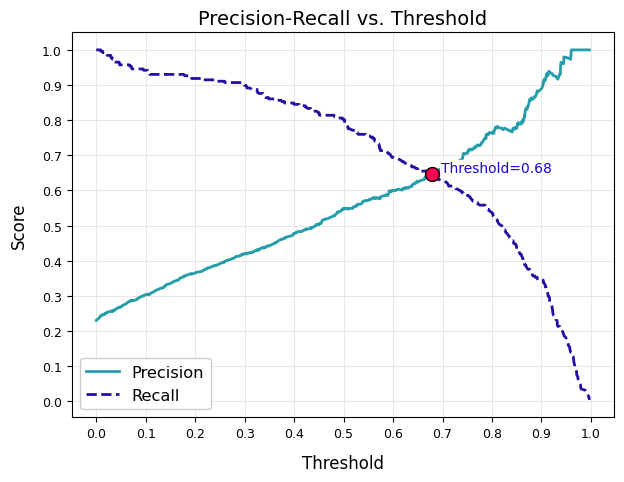

Best Threshold for equal Precision and Recall: 0.68


In [73]:
# ---------------------- MODEL LOGREG: PR vs. Threshold Curves ---------------------- #
pu.plot_pr_tradeoff(y_val_logreg, y_pred_prob_logreg)

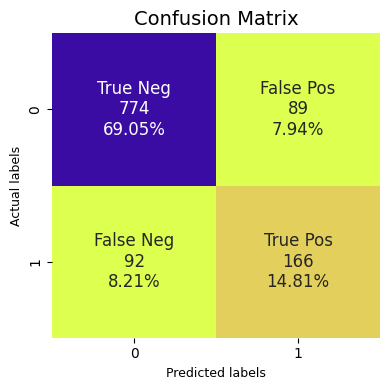

INFO:root:Confusion matrix plotted successfully.


In [66]:
# ---------------------- MODEL LOGREG: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_logreg, y_pred_prob_logreg, threshold = 0.68
    )

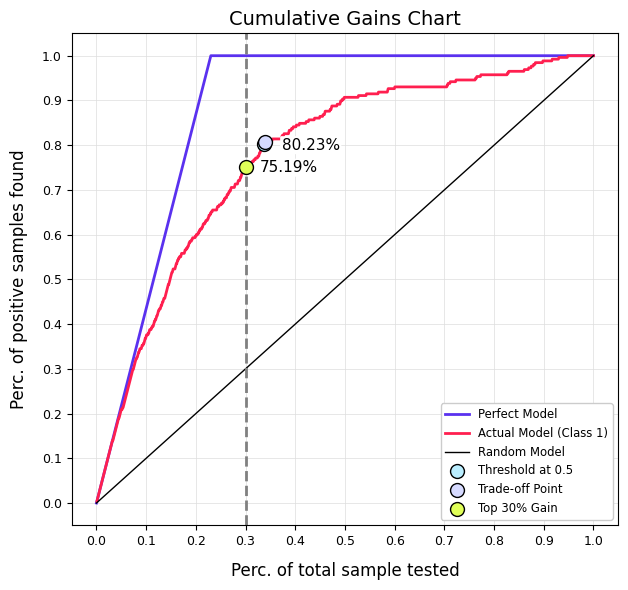

In [67]:
# ---------------------- MODEL LOGREG: Cumulative Gains Charts ---------------------- #

pu.plot_cumulative_gain(
    y_val_logreg, y_pred_prob_logreg, threshold=0.5
    )

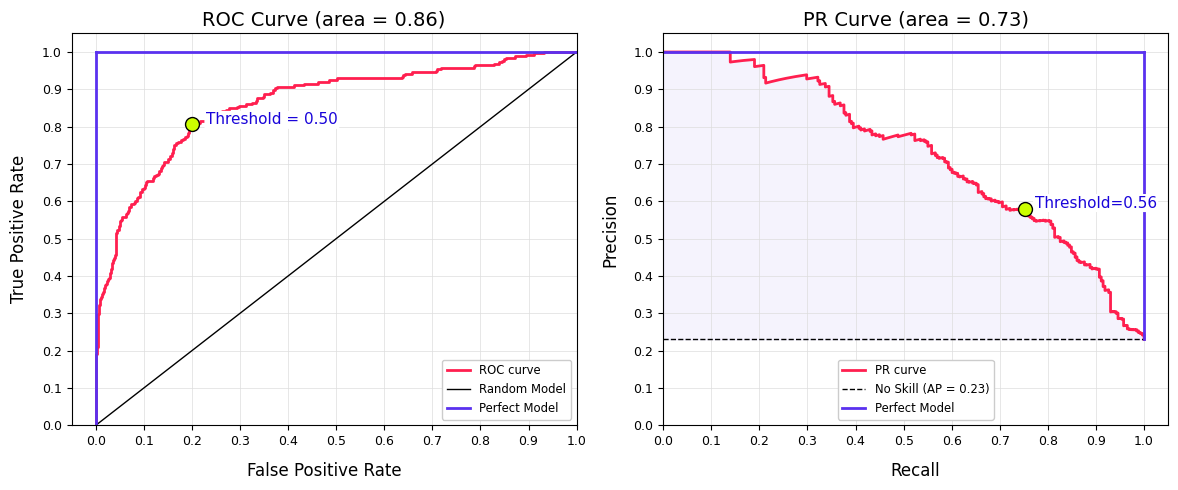

(0.8629442992266028, 0.730408541340828)

In [68]:
# ---------------------- MODEL LOGREG: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_logreg, y_pred_prob_logreg)

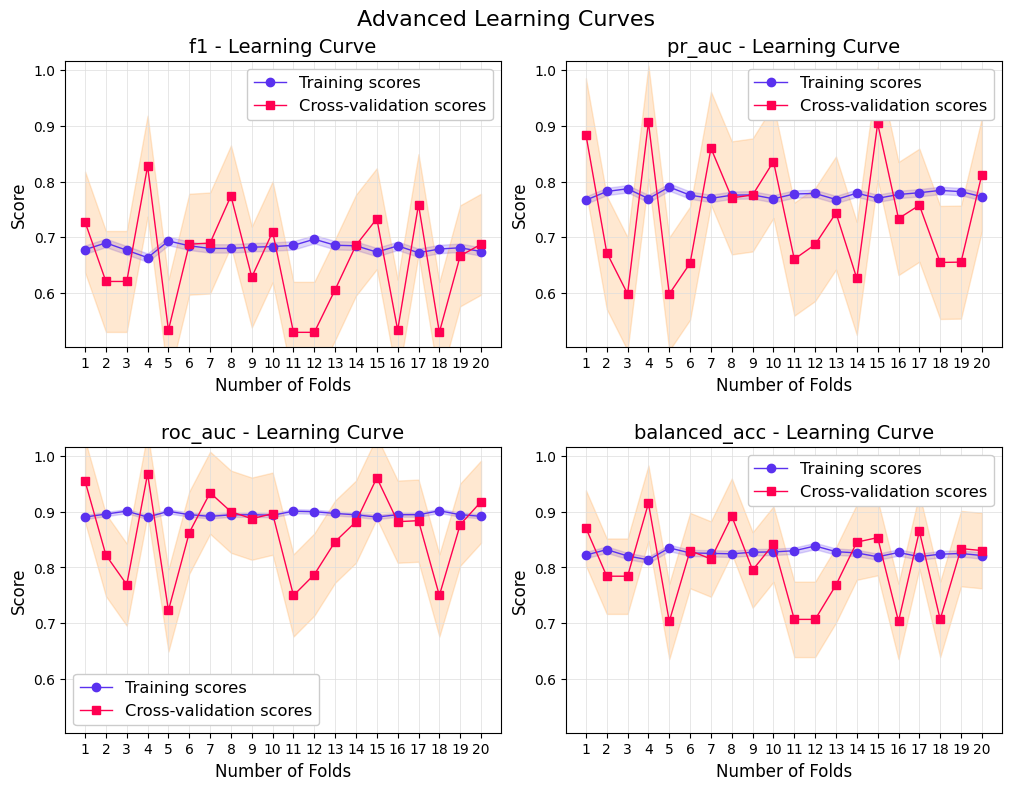

In [69]:
# ---------------------- MODEL LOGREG: Learning Curves ---------------------- #
metrics_to_plot = ['f1', 'pr_auc','roc_auc','balanced_acc']   # precision', 'recall'

# Call the plotting function
pu.plot_advanced_learning_curves(
    train_metrics_df=train_metrics_logreg,        # training metrics for each fold
    val_metrics_df=val_metrics_logreg,            # validation metrics for each fold
    metrics=metrics_to_plot,                      # List of metrics to plot
)

In [55]:
# ---------------------- MODEL LOGREG: INTERACTIVE Learning Curves ---------------------- #

pu.plot_interactive_learning_curves(
    train_metrics_df=train_metrics_logreg,        # training metrics for each fold
    val_metrics_df=val_metrics_logreg,            # validation metrics for each fold
    metrics=metrics_to_plot                       # List of metrics to plot
)

## LGBM
### Feature Selection

In [74]:
# ---------------------- MODEL LGBM: Feature Importances & Selection ---------------------- #

df_selected_lgbm = mu.feature_importances_lgbm(
    df=df_train_cleaned,
    target_column='Attrition',
    exclude_cols=['Employee Number'],
    use_class_weight=True,
    skf=skf,
    threshold_cut= 0.003   # Features with an importance score below this threshold will be excluded.
)

DataFrame before: (1121, 60)
DataFrame after: (1121, 41)


                              Feature  SHAP_Value  Importance
0                            OverTime    0.921911    0.138957
1                                 Age    0.266239    0.083709
2                      Monthly Income    0.508628    0.075155
3             Avg. Satisfaction Score    0.329562    0.063767
4                    StockOptionLevel    0.446720    0.061022
5                YearsWithCurrManager    0.153703    0.042690
6                         MonthlyRate    0.096619    0.038655
7                    DistanceFromHome    0.231372    0.034633
8                           DailyRate    0.143434    0.031383
9                          HourlyRate    0.089489    0.030203
10            YearsSinceLastPromotion    0.157226    0.027299
11                 NumCompaniesWorked    0.293237    0.024958
12                    JobSatisfaction    0.144839    0.022400
13                     JobInvolvement    0.158931    0.021228
14         

In [75]:
# ---------------------- MODEL LGBM: Sort & get new DF ---------------------- #

sorted_datasets_lgbm = cu.sort_columns(datasets={
    "DF Top_N": df_selected_lgbm,
})

# ---------------------- Update dataframe ---------------------- #
df_train_selected_lgbm = sorted_datasets_lgbm["DF Top_N"]

INFO:root:Shape of DF Top_N: (1121, 41)

DF Top_N - Sorted Features (A to Z):
Age
Age_Group
Attrition
Avg. Satisfaction Score
BusinessTravel
DailyRate
Department_Research_Development
Department_Sales
DistanceFromHome
Education
Education Field_Life Sciences
Education Field_Medical
Education Field_Technical Degree
Employee Number
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole_Laboratory Technician
JobRole_Research Scientist
JobRole_Sales Executive
JobSatisfaction
MaritalStatus
Monthly Income
Monthly Income_Group
MonthlyRate
NumCompaniesWorked
OverTime
Percent Salary Hike
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TotalWorkingYears_Group
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsAtCompany_Group
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager

---------------------------------------------


In [76]:
# ---------------------- MODEL LGBM: Save & Load ----------------- #

## PARQUET
manager.save_df(df_train_selected_lgbm, 'df_train_selected_lgbm', 'Saved_Dataframes', 'parquet')
df_train_selected_lgbm = manager.load_data("df_train_selected_lgbm.parquet", "Saved_Dataframes")

INFO:root:'df_train_selected_lgbm.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_train_selected_lgbm_dtypes.json

INFO:root:'df_train_selected_lgbm.parquet' loaded successfully from C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_train_selected_lgbm.parquet, 
 -> shape: (1121, 41)



### Hypertuning

In [70]:
# ---------------------- MODEL LGBM: Hyperparameter Tuning Functions ---------------------- #

# ---------------------- MODEL LGBM: Dynamically adjust the early stopping rounds ---------------------- #

def dynamic_early_stopping_rounds(trial, recent_scores):
    """
    Dynamically adjust the early stopping rounds for a training process based on
    the variability of recent performance improvements.

    This function uses an exponential moving average (EMA) of recent score improvements
    to calculate a standard deviation, which is then used to adjust the number of
    early stopping rounds. The approach aims to make early stopping more responsive
    to changes in training progression, allowing for more rounds when improvements
    are highly variable.

    Parameters:
    - trial (optuna.Trial): The trial object from Optuna, used here for logging.
    - recent_scores (list of float): A list containing the most recent validation scores
      from successive epochs or iterations.

    Returns:
    - int: The dynamically adjusted number of early stopping rounds.

    Raises:
    - ValueError: If recent_scores is not a list or contains non-numeric values.
    - Exception: For unexpected errors, providing a generic error message.

    Usage example:
    early_stopping_rounds = dynamic_early_stopping_rounds(trial, recent_scores)
    model.train(early_stopping_rounds=early_stopping_rounds)
    """
    try:
        if not isinstance(recent_scores, list) or not all(isinstance(score, (int, float)) for score in recent_scores):
            raise ValueError("recent_scores must be a list of numeric values.")

        base_early_stopping = 10  # Default value for early stopping rounds

        if len(recent_scores) > 10:
            #logging.info(f"Trial {trial.number}: Calculating dynamic early stopping rounds based on recent scores.")
            improvements = [recent_scores[i] - recent_scores[i - 1] for i in range(1, len(recent_scores))]
            smoothed_improvements = pd.Series(improvements).ewm(span=5).mean().tolist()
            std_dev = np.std(smoothed_improvements)
            dynamic_rounds = max(int(base_early_stopping + std_dev * 10), base_early_stopping)
            #logging.info(f"Trial {trial.number}: Dynamic early stopping rounds set to {dynamic_rounds}.")

            return dynamic_rounds
        else:
            #logging.info(f"Trial {trial.number}: Insufficient data for dynamic adjustment. Using default {base_early_stopping} rounds.")
            return base_early_stopping
    except ValueError as ve:
        logging.error(f"Input error: {ve}")
        raise
    except Exception as e:
        logging.error("An unexpected error occurred while adjusting early stopping rounds: {}".format(e))
        raise Exception("Failed to adjust early stopping rounds due to an unexpected error.") from e

# ---------------------- MODEL LGBM: Optuna optimization function ---------------------- #

# Custom logging function that does nothing
def silent_log(*args, **kwargs):
    pass

# ---------------------- MODEL LGBM: Optuna optimization function ---------------------- #

def lgbm_objective(trial, X, y,
                   params_space, skf,
                   metric=None, 
                   use_scale_pos_weight=False, 
                   smote_sampling_strategy=None):
    """
    Objective function to optimize LGBM parameters using Optuna.

    Parameters:
    - trial: An Optuna trial object.
    - X: DataFrame containing features.
    - y: Series containing target variable.
    - params_space: Dictionary of search spaces for parameters 
    - skf: StratifiedKFold object for splitting the dataset.
    - metric: Metric to optimize ('f1', 'balanced_acc', 'roc_auc', 'pr_auc', 'recall').
    - use_scale_pos_weight (bool): Whether to use scale pos weight.
    - smote_sampling_strategy (float): Fraction for SMOTE sampling strategy (between 0 and 1).

    Returns:
    - Average score of the optimization metric across all folds.
    """
    try:
        param_grid = {
            'objective': 'binary',
            'metric': 'aucpr',  # This could also be dynamic based on params_space if needed
            'verbosity': -1,  # Set verbosity to 0 to suppress LightGBM's output
        }

        # Dynamically add parameters from params_space
        param_keys = ['learning_rate', 'n_estimators', 'num_leaves', 'max_depth',
                        'min_data_in_leaf', 'min_child_weight', 'bagging_fraction', 'feature_fraction',
                        'lambda_l1', 'lambda_l2', 'bagging_freq','min_gain_to_split'
                        ]
        
        # Log if there are extra parameters not expected
        extra_params = set(params_space.keys()) - set(param_keys)
        if extra_params:
            logging.warning(f"Extra parameters that aren't used in the model: {extra_params}")

        # Check and add only the parameters that are expected and provided
        for key in param_keys:
            if key in params_space:
                if isinstance(params_space[key], tuple) and len(params_space[key]) == 2:
                    if key in ['learning_rate', 'bagging_fraction', 'min_child_weight', 'feature_fraction','lambda_l1', 'lambda_l2']:
                        param_grid[key] = trial.suggest_float(key, *params_space[key])
                    elif key in ['alpha']:
                        param_grid[key] = trial.suggest_loguniform(key, params_space[key])
                    else:
                        param_grid[key] = trial.suggest_int(key, *params_space[key])
            #else:
                #logging.info(f"Parameter '{key}' not provided in params_space and will be skipped.")


        # Initialize the list to store scores for each fold
        recent_scores = []

        # Start Cross Validation
        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            # Handle class imbalance with SMOTE if requested
            if smote_sampling_strategy and 0 < smote_sampling_strategy < 1:
                smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
                X_train, y_train = smote.fit_resample(X_train, y_train)
            
            # Make a copy of param_grid to modify
            param_grid_copy = param_grid.copy()   

            # Dynamic scale_pos_weight adjustment
            if use_scale_pos_weight:
                num_negative = np.sum(y_train == 0)
                num_positive = np.sum(y_train == 1)
                scale_pos_weight_value = num_negative / num_positive
                param_grid_copy['scale_pos_weight'] = trial.suggest_float('scale_pos_weight', scale_pos_weight_value * 0.5, scale_pos_weight_value * 2)

            # Fit the LightGBM model
            early_stopping_callback = lgb.early_stopping(stopping_rounds=dynamic_early_stopping_rounds(trial, recent_scores), verbose=False)
            custom_logger = lgb.log_evaluation(0)  # Disable log output

            # Fit LGBM for feature selection with the early stopping callback
            dtrain = lgb.Dataset(X_train, label=y_train)
            dval = lgb.Dataset(X_val, label=y_val)
            
            model = lgb.train(
                param_grid_copy,
                dtrain,
                valid_sets=[dval],
                valid_names=['validation'],
                callbacks=[early_stopping_callback, custom_logger],
                feval=mu.lgbm_custom_eval(metric),
            )
            
            # Generate predictions and probabilities using best iteration
            y_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
            # For binary classification, use threshold to classify as 0 or 1
            y_pred = (y_pred_prob > 0.5).astype(int) 

            # Evaluate the model
            score = mu.calculate_metric(y_val, y_pred, y_pred_prob, metric)
            recent_scores.append(score)

        # End Cross Validation
        average_score = np.mean(recent_scores)

        return average_score
    
    except lgb.basic.LightGBMError as e:
        logging.error(f"LightGBM training error: {e}")
        raise
    except Exception as e:
        logging.error(f"Unhandled exception: {e}")
        raise

# ---------------------- MODEL LGBM: Hyperparameter tuning using Optuna ---------------------- #

def hyperparameter_tuning_lgbm(df, target_column=None, exclude_cols=None,
                               params=None, skf=None, 
                              n_trials=None, metric=None, 
                              threshold=0.97, 
                              n_trials_no_improve=25, 
                              use_scale_pos_weight=False, 
                              smote_sampling_strategy=None):
    """
    Hyperparameter Tuning for LGBM Model Using Optuna
    ==========================================================

    This function configures and executes a hyperparameter search using Optuna to find the optimal 
    settings for a LGBM model based on a specified performance metric. It supports 
    handling class imbalances with optional SMOTE and class weighting, and it uses StratifiedKFold 
    for cross-validation to ensure the dataset's distribution is respected.

    Sections:
    ---------
    - Overview
    - Parameters
    - Returns
    - Raises
    - Usage
    - Notes

    Overview
    --------
    The function performs hyperparameter tuning for a LGBM model by utilizing the Optuna
    optimization framework to systematically explore a range of parameter configurations. It integrates
    several advanced techniques such as class weight adjustment and SMOTE for managing class imbalance,
    and utilizes cross-validation to ensure robust evaluation of model performance.

    Parameters
    ----------
    - df (pd.DataFrame): The complete dataset containing both features and the target variable.
    - target_column (str, optional): Name of the target variable column in the dataframe.
    - exclude_cols (list, optional): List of column names to exclude from the feature set.
    - params (dict): A dictionary defining the search space for logistic regression parameters.
                     Each entry should define a range or list of options that Optuna will explore.
    - skf (StratifiedKFold, optional): A StratifiedKFold instance for cross-validation. If None,
                                       the function requires an externally provided StratifiedKFold instance.
    - n_trials (int, optional): The number of trials that Optuna will perform. Each trial tests a 
                                different combination of parameters.
    - metric (str, optional): The performance metric to optimize. Valid options include 'f1', 'balanced_acc',
                              'roc_auc', 'pr_auc', 'recall'. The choice of metric influences how the 
                              model's performance is evaluated.
    - threshold (float, optional): A performance threshold for early stopping. If a trial achieves 
                                   a performance above this threshold, the search can optionally be 
                                   halted early.
    - n_trials_no_improve (int, optional): The number of consecutive trials without improvement in 
                                           performance to tolerate before stopping early. Helps in 
                                           limiting resource waste.
    - use_scale_pos_weight (bool, optional): Flag to determine whether to adjust class weights inversely 
                                         proportional to class frequencies.
    - smote_sampling_strategy (float, optional): Specifies the desired ratio of the number of samples 
                                                 in the minority class over the majority class after 
                                                 resampling with SMOTE. Must be between 0 and 1.

    Returns
    -------
    - best_params (dict): Dictionary of the best parameters found during the optimization.

    Raises
    ------
    - ValueError: If 'df' is not a pandas DataFrame, or other parameters are not in the expected format.
    - RuntimeError: If the function encounters an issue during the optimization process.

    Usage
    -----
    >>> best_params = hyperparameter_tuning_lgbm(df=data, target_column='outcome', params=params_dict,
                                                   skf=StratifiedKFold(n_splits=5), n_trials=100,
                                                   metric='roc_auc', use_scale_pos_weight=True)

    Notes
    -----
    - The function relies heavily on the configuration provided via 'params' and 'skf'. Incorrect
      configuration may lead to suboptimal tuning results or runtime errors.
    - It is assumed that the data passed to the function does not contain any missing values in 
      the features or target columns.
    """
    if skf is None or params is None:
        logging.error("StratifiedKFold (skf) or parameters (params) not provided. Please pass valid instances.")
        return None
    
    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column] 

    logging.info("Starting hyperparameter tuning for LGBM model...")

    trials_without_improvement = 0
    best_score = float('-inf')

    def early_stopping_callback(study, trial):
        nonlocal best_score, trials_without_improvement

        # Update the best score and reset trials counter if improvement is seen
        if trial.value > best_score:
            best_score = trial.value
            trials_without_improvement = 0
        else:
            trials_without_improvement += 1

        # Stop if the best score surpasses the hard threshold (if threshold is set)
        if threshold is not None and best_score >= threshold:
            study.stop()
            #print("Stopping early as the performance threshold is achieved.")

        # Stop if no improvement is observed for a specified number of trials (if n_trials_no_improve is set)
        if n_trials_no_improve is not None and trials_without_improvement >= n_trials_no_improve:
            study.stop()
            print("Stopping early due to no improvement in the specified number of trials.")

        # Optionally, handle the case where performance falls below an adaptive threshold
        # Allowing a 20% decrease for continued exploration
        adaptive_threshold = best_score * 0.80  
        if trial.value < adaptive_threshold:
            study.stop()
            #print("Stopping early as performance fell below the adaptive threshold.")

    try:
        # Sampler
        sampler = TPESampler(seed=42)
        #sampler = CmaEsSampler(seed=42)

        # HyperbandPruner
        #pruner = HyperbandPruner(min_resource=30, max_resource=300, reduction_factor=3)

        # MedianPruner
        #pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

        # Configuring underlying pruner and the patient pruner
        underlying_pruner = MedianPruner(n_startup_trials=10, n_warmup_steps=30, interval_steps=5)
        pruner = PatientPruner(underlying_pruner, patience=10)

        study = optuna.create_study(direction="maximize",sampler=sampler, pruner=pruner)

        study.optimize(lambda trial: lgbm_objective(trial, X, y, params, skf, metric, 
                                                   use_scale_pos_weight, smote_sampling_strategy), 
                                                   n_trials=n_trials, callbacks=[early_stopping_callback], 
                                                   n_jobs=-1  #` uses all available cores
                                                   )   
        best_params = study.best_params

        print("\nBest Parameters for LGBM:")
        for key, value in best_params.items():
            print(f"{key}: {value}")

        logging.info("Hyperparameter tuning completed. Best parameters: %s", best_params)
        return best_params

    except Exception as e:
        logging.error(f"Error in hyperparameter tuning: {e}")
        raise

# ---------------------- MODEL LGBM: Hyperparameter Tuning Functions ---------------------- #

params_lgbm = {
    'learning_rate': (0.001, 0.1),
    'n_estimators': (200, 700),
    'num_leaves': (20, 300),
    'max_depth': (0, 15),
    'min_data_in_leaf': (20, 100),
    #'min_child_weight': (0.001, 0.1),
    'bagging_fraction': (0.6, 1.0),
    'feature_fraction': (0.6, 1.0),
    #'lambda_l1': (0.01, 10),
    #'lambda_l2': (0.01, 10)
}     

best_params_lgbm = hyperparameter_tuning_lgbm(
            df=df_train_selected,
            target_column='Attrition', 
            exclude_cols=['Employee Number'],
            params=params_lgbm,
            skf=skf,
            n_trials=50,
            metric='f1',
            use_scale_pos_weight=True
        )

INFO:root:Starting hyperparameter tuning for LGBM model...


[I 2024-06-16 15:46:42,514] A new study created in memory with name: no-name-b4577be0-9beb-40cd-813e-8d735b3ec906
[I 2024-06-16 15:46:53,830] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 0.03193865120531591, 'n_estimators': 458, 'num_leaves': 80, 'max_depth': 5, 'min_data_in_leaf': 69, 'bagging_fraction': 0.9533627516741541, 'feature_fraction': 0.756967821533655, 'scale_pos_weight': 2.998772391362608}. Best is trial 3 with value: 0.0.
[I 2024-06-16 15:46:55,573] Trial 6 finished with value: 0.0 and parameters: {'learning_rate': 0.013032190077628576, 'n_estimators': 321, 'num_leaves': 247, 'max_depth': 15, 'min_data_in_leaf': 95, 'bagging_fraction': 0.9145418588314902, 'feature_fraction': 0.8910589942802618, 'scale_pos_weight': 2.3719347758869422}. Best is trial 3 with value: 0.0.
[I 2024-06-16 15:46:55,968] Trial 9 finished with value: 0.0 and parameters: {'learning_rate': 0.029646426483186886, 'n_estimators': 590, 'num_leaves': 53, 'max_depth': 13, 'min_data_in_l


Best Parameters for LGBM:
learning_rate: 0.09965341585746147
n_estimators: 254
num_leaves: 205
max_depth: 13
min_data_in_leaf: 74
bagging_fraction: 0.6965293837819958
feature_fraction: 0.6355258027430669
scale_pos_weight: 1.8759840683852866
INFO:root:Hyperparameter tuning completed. Best parameters: {'learning_rate': 0.09965341585746147, 'n_estimators': 254, 'num_leaves': 205, 'max_depth': 13, 'min_data_in_leaf': 74, 'bagging_fraction': 0.6965293837819958, 'feature_fraction': 0.6355258027430669, 'scale_pos_weight': 1.8759840683852866}


### Training & Cross Validation

In [78]:
# ---------------------- MODEL LGBM: Trains model with hyperparamters ---------------------- #

def train_model_lgbm(train_data, val_data,hyperparams, metric):
    """
    Trains a LightGBM model with the given hyperparameters.

    Parameters:
    - train_data (DataFrame):training data (features and target).
    - val_data (Series): validation data (features and target)
    - hyperparams (dict): Hyperparameters for the LightGBM model.
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc')

    Returns:
    - model: The trained LightGBM model.
    """
    # Define default hyperparameters
    default_hyperparams = {
        'verbosity': -1,
        'objective': 'binary',
        'metric': 'aucpr',
    }
    # Validate and merge hyperparameters
    if hyperparams is not None:
        if not isinstance(hyperparams, dict):
            raise TypeError("Hyperparameters must be a dictionary.")
        # Merge user-specified hyperparams with defaults, user-specified taking precedence
        hyperparams = {**default_hyperparams, **hyperparams}
    else:
        hyperparams = default_hyperparams.copy()
    
    try:   
        # Train the LightGBM model
        with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):

            # Configure callbacks including early stopping
            callbacks = [
                lgb.early_stopping(stopping_rounds=100, verbose=False),
                lgb.log_evaluation(period=0)  # Adjust period or remove as needed
            ]

            # log_evaluation_callback = lgb.log_evaluation(period=0)  # Set to 0 to disable the log

            model = lgb.train(
                params=hyperparams,
                train_set=train_data,
                num_boost_round=hyperparams.get('n_estimators', 100),
                feval = mu.lgbm_custom_eval(metric),
                valid_sets=[train_data, val_data],
                valid_names=['training', 'validation'],
                callbacks=callbacks,
            )

        return model
    except Exception as e:
        logging.error(f"Error in model training: {e}")
        return None

# ---------------------- MODEL LGBM: Performs training and evaluation for one fold in cross-validation ---------------------- #

def perform_fold_lgbm(X_train, y_train, 
                      X_val, y_val, 
                      hyperparams, fold_number, metric=None, 
                      smote_sampling_strategy=None):
    """
    Performs training and evaluation for one fold in cross-validation directly using data frames.
    
    This function handles the training and evaluation for a single fold in the cross-validation process.
    It trains the model using the provided training data and hyperparameters and evaluates it on both
    the training and validation sets. It returns the performance metrics for both training and validation.
    
    Parameters:
    - X_train (DataFrame): Training features DataFrame.
    - y_train (Series): Training target variable Series.
    - X_val (DataFrame): Validation features DataFrame.
    - y_val (Series): Validation target variable Series.
    - hyperparams (dict): Hyperparameters for the Logistic Regression model.
    - fold_number (int): The fold number being processed (for logging and tracking purposes).
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc')
    - smote_sampling_strategy (float): Fraction for SMOTE sampling strategy (between 0 and 1).
    
    Returns:
    - tuple: A tuple containing two dictionaries (train_metrics, val_metrics), where each dictionary
             includes various performance metrics such as precision, recall, F1 score, AUC-ROC, etc.
    
    Raises:
    - RuntimeError: If the model training fails.
    - Exception: Captures and logs any other exceptions that occur during fold execution.
    """
    try:
        logging.info(f"Starting with fold {fold_number}:")
        logging.info(f"Class distribution in training set (Fold {fold_number}): {y_train.value_counts()}")

        # Handle class imbalance with SMOTE if requested
        if smote_sampling_strategy and 0 < smote_sampling_strategy < 1:
            smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
            X_train, y_train = smote.fit_resample(X_train, y_train)
            logging.info(f"SMOTE applied with strategy {smote_sampling_strategy} on fold {fold_number}.")

        # Prepare data for LGBM
        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

        # Model Training
        model = train_model_lgbm(train_data, val_data, hyperparams, metric) 
        if model is None:
            logging.error("Model training failed for fold {fold_number}")
            return None, None

        # LGBM: Generate predictions and probabilities for evaluation
        # Generate predictions using raw data
        y_train_pred_prob = model.predict(X_train)
        y_val_pred_prob = model.predict(X_val)  # Corrected: Use raw validation data for predictions

        # Change the threshold
        y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

        # After training and evaluation, log the validation predicted probabilities
        logging.info(f"Validation predicted probabilities for fold {fold_number}: {y_val_pred_prob[:5]}")
        logging.info(f"Fold {fold_number} training completed.\n")
        
        return (y_train, y_train_pred, y_train_pred_prob), (y_val, y_val_pred, y_val_pred_prob)
    
    except Exception as e:
        # Print any exceptions that occur during fold execution
        logging.error(f"Error in fold execution: {e}")
        # Return None to indicate failure in processing this fold
        return None, None, None, None

# ---------------------- MODEL LGBM: Main Training and Evaluation Function ---------------------- #
    
def train_evaluate_lgbm_cv(df, skf=None, 
                           target_column=None, exclude_cols=None,
                           hyperparams=None,  
                           metric=None, 
                           smote_sampling_strategy=None):
    """
    Trains and evaluates a LightGBM model using cross-validation. Main function that orchestrates the entire cross-validation process. 
    It sets up the cross-validation (with n_splits), prepares the data, and then calls perform_fold for each fold. 
    It collects the results from all folds, computes the average metrics across all folds, and returns these aggregated metrics.

    Parameters:
    - df (DataFrame): The complete dataset.
    - skf (StratifiedKFold): Stratified K-Folds cross-validator.
    - target_column (str): Name of the target column.
    - hyperparams (dict, optional): Hyperparameters for the LightGBM model.
    - exclude_cols (list, optional): List of columns to exclude from features.
    - verbose (bool, optional): Flag to control logging verbosity.
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc').
    - smote_sampling_strategy (float): Fraction for SMOTE sampling strategy (between 0 and 1).

    Returns:
    - A tuple containing:
      - avg_metrics_across_folds (dict): Averaged evaluation metrics across all folds.
      - std_metrics_across_folds (dict): Standard deviation of evaluation metrics across all folds.
      - all_y_val (list): Concatenated list of all validation target values from each fold.
      - all_y_pred_prob (list): Concatenated list of all model prediction probabilities for the validation data from each fold.
    """
    if skf is None or hyperparams is None:
        logging.error("StratifiedKFold (skf) or parameters (params) not provided. Please pass valid instances.")
        return None

    # Check if hyperparams are provided and valid
    logging.info(f"Received hyperparams: {hyperparams}\n")

    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column]  # Assumes y is already numeric and suitable for stratification

    # Initialize
    all_train_results = []
    all_val_results = []
    all_y_val = []
    all_y_pred_prob = []

    # Start Cross Validation
    for fold_number, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        # Ensure the fold is processed correctly (implement within perform_fold_lgbm)
        fold_train_result, fold_val_result = perform_fold_lgbm(
                X_train, y_train, 
                X_val, y_val_fold, 
                hyperparams.copy(), 
                fold_number,
                metric, 
                smote_sampling_strategy)

        if fold_train_result and fold_val_result:
            all_train_results.append(fold_train_result)
            all_val_results.append(fold_val_result)
            all_y_val.extend(y_val_fold)  # Aggregating true validation labels
            all_y_pred_prob.extend(fold_val_result[2])  # Aggregating validation prediction probabilities

    # After the cross-validation loop, log the aggregated validation predicted probabilities
    logging.info(f"AGGREGATED validation predicted probabilities: {all_y_pred_prob[:5]}")
    logging.info("Cross Validation completed.")

    # Evaluate all folds together
    avg_metrics_across_folds, std_metrics_across_folds, train_metrics_df, val_metrics_df = mu.evaluate_model(all_train_results, all_val_results)  

    return avg_metrics_across_folds, std_metrics_across_folds, all_y_val, all_y_pred_prob, train_metrics_df, val_metrics_df 

# ---------------------- MODEL LGBM: Train & evaluate model  ---------------------- #

# Default hyperparameters
default_params_lgbm = {'learning_rate': 0.08432061486769547, 
                       'n_estimators': 602, 
                       'num_leaves': 104, 
                       'max_depth': 15, 
                       'min_data_in_leaf': 29, 
                       'bagging_fraction': 0.6301314854754636, 
                       'feature_fraction': 0.7951938103528031, 
                       'scale_pos_weight': 5.025503309017717
                       }

avg_metrics_lgbm, std_metrics_lgbm, y_val_lgbm, y_pred_prob_lgbm,train_metrics_lgbm, val_metrics_lgbm = train_evaluate_lgbm_cv(
    df_train_selected,    
    target_column='Attrition',
    exclude_cols=['Employee Number'],
    skf=skf,
    hyperparams= default_params_lgbm,  # default_params_lgbm or best_params_lgbm
    metric='f1'
)

INFO:root:Received hyperparams: {'learning_rate': 0.08432061486769547, 'n_estimators': 602, 'num_leaves': 104, 'max_depth': 15, 'min_data_in_leaf': 29, 'bagging_fraction': 0.6301314854754636, 'feature_fraction': 0.7951938103528031, 'scale_pos_weight': 5.025503309017717}

INFO:root:Starting with fold 1:
INFO:root:Class distribution in training set (Fold 1): Attrition
0    819
1    245
Name: count, dtype: int64
INFO:root:Validation predicted probabilities for fold 1: [0.22802059 0.2062159  0.43597404 0.17000095 0.47958777]
INFO:root:Fold 1 training completed.

INFO:root:Starting with fold 2:
INFO:root:Class distribution in training set (Fold 2): Attrition
0    819
1    246
Name: count, dtype: int64
INFO:root:Validation predicted probabilities for fold 2: [0.53612557 0.02793868 0.0415389  0.48260612 0.77344509]
INFO:root:Fold 2 training completed.

INFO:root:Starting with fold 3:
INFO:root:Class distribution in training set (Fold 3): Attrition
0    819
1    246
Name: count, dtype: int64
I

### Plots

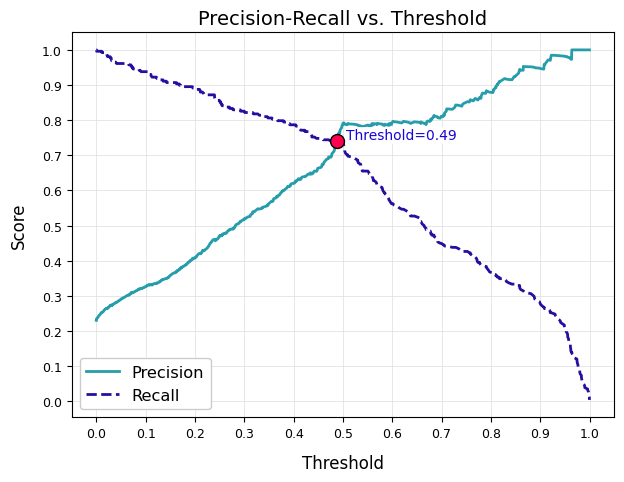

Best Threshold for equal Precision and Recall: 0.49


In [80]:
# ---------------------- MODEL LGBM: PR vs. Threshold Curves ---------------------- #
pu.plot_pr_tradeoff(y_val_lgbm, y_pred_prob_lgbm)

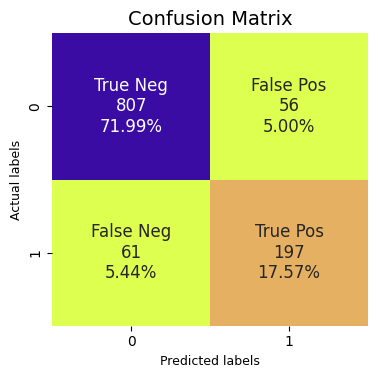

INFO:root:Confusion matrix plotted successfully.


In [62]:
# ---------------------- MODEL LGBM: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_lgbm, y_pred_prob_lgbm, threshold = 0.5
                      )

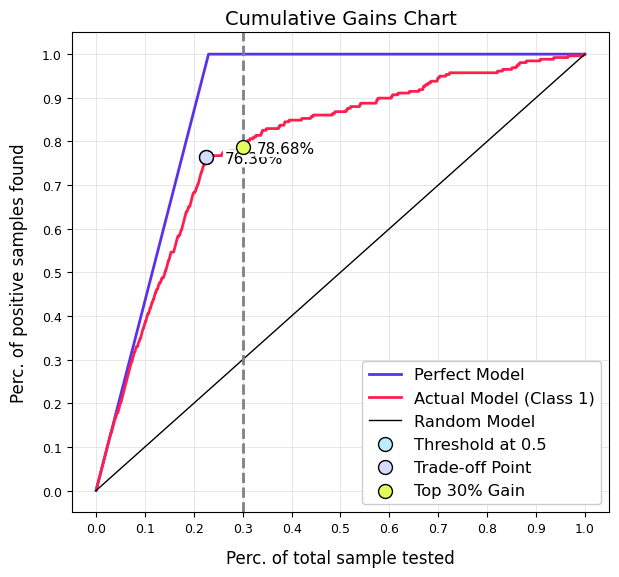

In [63]:
# ---------------------- MODEL LGBM: Cumulative Gains Charts ---------------------- #
pu.plot_cumulative_gain(
    y_val_lgbm, y_pred_prob_lgbm,threshold=0.5
    )

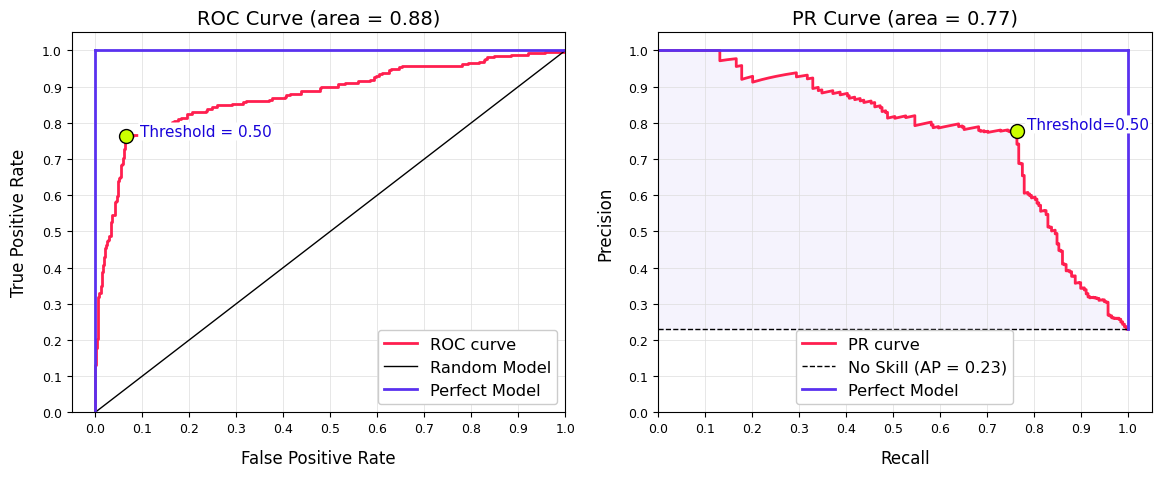

(0.8758656929585815, 0.7724708498005287)

In [64]:
# ---------------------- MODEL LGBM: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_lgbm, y_pred_prob_lgbm)

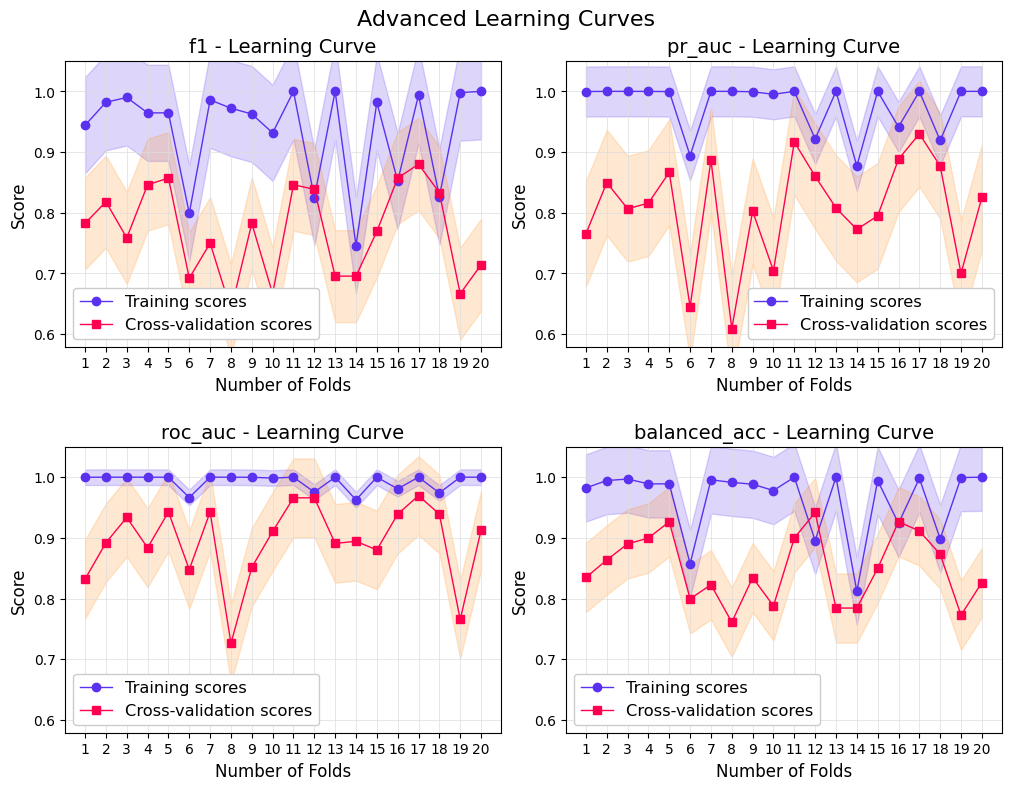

In [65]:
# ---------------------- MODEL LGBM: Learning Curves ---------------------- #
metrics_to_plot = ['f1', 'pr_auc','roc_auc','balanced_acc']   # precision', 'f1', 'recall'

# Call the plotting function
pu.plot_advanced_learning_curves(
    train_metrics_lgbm,             # Original DataFrame with training metrics for each fold
    val_metrics_lgbm,               # Original DataFrame with validation metrics for each fold
    metrics=metrics_to_plot         # List of metrics to plot
)

In [66]:
# ---------------------- MODEL LGBM: INTERACTIVE Learning Curves ---------------------- #

pu.plot_interactive_learning_curves(
    train_metrics_df=train_metrics_lgbm,        # training metrics for each fold
    val_metrics_df=val_metrics_lgbm,            # validation metrics for each fold
    metrics=metrics_to_plot                       # List of metrics to plot
)

## XGBoost
### Feature Selection

In [67]:
# ---------------------- MODEL XGBoost: Feature Importances & Selection ---------------------- #

df_train_selected_xgb = mu.feature_importances_xgb(
    df=df_train_cleaned,
    target_column='Attrition',
    exclude_cols=['Employee Number'],
    use_class_weight=True,
    skf=skf,
    threshold_cut= 0.005       # Features with an importance score below this threshold will be excluded.
)

DataFrame before: (1121, 60)
DataFrame after: (1121, 53)


                              Feature  SHAP_Value  Importance
0                            OverTime      1.5792      0.0711
1                    StockOptionLevel      0.5942      0.0621
2                            JobLevel      0.5642      0.0577
3                 Outlier_coefficient      0.0000      0.0438
4             Avg. Satisfaction Score      0.6449      0.0377
5             JobRole_Human Resources      0.0027      0.0367
6                YearsAtCompany_Group      0.2548      0.0330
7             JobRole_Sales Executive      0.1447      0.0285
8                   TotalWorkingYears      0.1316      0.0260
9                           Age_Group      0.1323      0.0257
10       JobRole_Sales Representative      0.0221      0.0248
11    Education Field_Human Resources      0.0000      0.0239
12                     BusinessTravel      0.4074      0.0238
13                 NumCompaniesWorked      0.4656      0.0214
14         

In [68]:
# ---------------------- MODEL XGBoost: Sort & get new DF ---------------------- #

sorted_datasets_xgb = cu.sort_columns(datasets={
    "DF Top_N": df_train_selected_xgb
})

# ---------------------- Update dataframe ---------------------- #
df_train_selected_xgb = sorted_datasets_xgb["DF Top_N"]

INFO:root:Shape of DF Top_N: (1121, 53)



DF Top_N - Sorted Features (A to Z):
Age
Age_Group
Attrition
Avg. Satisfaction Score
BusinessTravel
DailyRate
Department_Research_Development
Department_Sales
DistanceFromHome
Education
Education Field_Human Resources
Education Field_Life Sciences
Education Field_Marketing
Education Field_Medical
Education Field_Other
Education Field_Technical Degree
Employee Number
EnvironmentSatisfaction
Gender
HourlyRate
Is_anomaly
Is_outlier
JobInvolvement
JobLevel
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative
JobSatisfaction
MaritalStatus
Monthly Income
Monthly Income_Group
MonthlyRate
NumCompaniesWorked
Outlier_coefficient
OverTime
Percent Salary Hike
Percent Salary Hike_Group
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TotalWorkingYears_Group
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsAtC

In [69]:
# ---------------------- MODEL XGBoost: Save & Load ----------------- #

## PARQUET
manager.save_df(df_train_selected_xgb, 'df_train_selected_xgb', 'Saved_Dataframes', 'parquet')
df_train_selected_xgb = manager.load_data("df_train_selected_xgb.parquet", "Saved_Dataframes")

INFO:root:'df_train_selected_xgb.parquet' saved successfully.
INFO:root:Data types JSON saved successfully at C:\Users\Barba\BT_Employee_Attrition\Saved_Dataframes\df_train_selected_xgb_dtypes.json

INFO:root:'df_train_selected_xgb.parquet' loaded successfully from C:\Users\Barba\BT_Employee_Attrition\Saved_Dataframes\df_train_selected_xgb.parquet, 
 -> shape: (1121, 53)



### Hypertuning

In [81]:
# ---------------------- MODEL XGBoost: Hyperparameter Tuning Functions ---------------------- #

# ---------------------- MODEL XGBoost: Dynamically adjust the early stopping rounds ---------------------- #

def dynamic_early_stopping_rounds(trial, recent_scores):
    """
    Dynamically adjust the early stopping rounds for a training process based on
    the variability of recent performance improvements.

    This function uses an exponential moving average (EMA) of recent score improvements
    to calculate a standard deviation, which is then used to adjust the number of
    early stopping rounds. The approach aims to make early stopping more responsive
    to changes in training progression, allowing for more rounds when improvements
    are highly variable.

    Parameters:
    - trial (optuna.Trial): The trial object from Optuna, used here for logging.
    - recent_scores (list of float): A list containing the most recent validation scores
      from successive epochs or iterations.

    Returns:
    - int: The dynamically adjusted number of early stopping rounds.

    Raises:
    - ValueError: If recent_scores is not a list or contains non-numeric values.
    - Exception: For unexpected errors, providing a generic error message.

    Usage example:
    early_stopping_rounds = dynamic_early_stopping_rounds(trial, recent_scores)
    model.train(early_stopping_rounds=early_stopping_rounds)
    """
    try:
        if not isinstance(recent_scores, list) or not all(isinstance(score, (int, float)) for score in recent_scores):
            raise ValueError("recent_scores must be a list of numeric values.")

        base_early_stopping = 10  # Default value for early stopping rounds

        if len(recent_scores) > 10:
            #logging.info(f"Trial {trial.number}: Calculating dynamic early stopping rounds based on recent scores.")
            improvements = [recent_scores[i] - recent_scores[i - 1] for i in range(1, len(recent_scores))]
            smoothed_improvements = pd.Series(improvements).ewm(span=5).mean().tolist()
            std_dev = np.std(smoothed_improvements)
            dynamic_rounds = max(int(base_early_stopping + std_dev * 10), base_early_stopping)
            #logging.info(f"Trial {trial.number}: Dynamic early stopping rounds set to {dynamic_rounds}.")
            return dynamic_rounds
        #else:
         #   logging.info(f"Trial {trial.number}: Insufficient data for dynamic adjustment. Using default {base_early_stopping} rounds.")

            return base_early_stopping
    except ValueError as ve:
        logging.error(f"Input error: {ve}")
        raise
    except Exception as e:
        logging.error("An unexpected error occurred while adjusting early stopping rounds: {}".format(e))
        raise Exception("Failed to adjust early stopping rounds due to an unexpected error.") from e


# ---------------------- MODEL XGBoost: Optuna optimization function ---------------------- #

def xgb_objective(trial, X, y,
                  params_space, skf,
                  metric=None,
                  use_scale_pos_weight=False,
                  smote_sampling_strategy=None):
    """
    Objective function to optimize XGBoost parameters using Optuna.

    Parameters:
    - trial: An Optuna trial object.
    - X: DataFrame containing features.
    - y: Series containing target variable.
    - params_space: Dictionary of search spaces for parameters
    - skf (StratifiedKFold): Stratified K-Folds cross-validator
    - metric: Metric to optimize ('f1', 'balanced_acc', 'roc_auc', 'pr_auc', 'recall').
    - use_scale_pos_weight (bool): Whether to use scale pos weight.
    - smote_sampling_strategy (float): Fraction for SMOTE sampling strategy (between 0 and 1).

    Returns:
    - Average score of the optimization metric across all folds.
    """
    try:
        param_grid = {
            'objective': 'binary:logistic',
            'metric': 'aucpr',  # This could also be dynamic based on params_space if needed
            'verbosity': 0,
        }

        # Dynamically add parameters from params_space
        param_keys = ['learning_rate', 'n_estimators', 'max_depth', 'subsample',
                      'colsample_bytree', 'colsample_bylevel','colsample_bynode',
                      'lambda', 'min_child_weight', 'alpha'
                        ]

        # Log if there are extra parameters not expected
        extra_params = set(params_space.keys()) - set(param_keys)
        #if extra_params:
            #logging.warning(f"Extra parameters that aren't used in the model: {extra_params}")

        # Check and add only the parameters that are expected and provided
        for key in param_keys:
            if key in params_space:
                if isinstance(params_space[key], tuple) and len(params_space[key]) == 2:
                    param_type = 'float' if  key in ['learning_rate', 'subsample', 'min_child_weight', 'colsample_bytree', 'colsample_bylevel',
                                                     'colsample_bynode', 'lambda', 'alpha'] else 'int'
                    if param_type == 'float':
                        param_grid[key] = trial.suggest_float(key, *params_space[key])
                    elif param_type == 'int':
                        param_grid[key] = trial.suggest_int(key, *params_space[key])
            # else:
            #     logging.info(f"Parameter '{key}' not provided in params_space and will be skipped.")

        # Initialize the list to store scores for each fold
        recent_scores = []
        local_evals_results = []  # Temporary storage for this trial's results

        # Start Cross Validation
        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            # Handle class imbalance with SMOTE if requested
            if smote_sampling_strategy and 0 < smote_sampling_strategy < 1:
                smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
                X_train, y_train = smote.fit_resample(X_train, y_train)

            # Make a copy of param_grid to modify
            param_grid_copy = param_grid.copy()

            # Dynamic scale_pos_weight adjustment
            if use_scale_pos_weight:
                num_negative = np.sum(y_train == 0)
                num_positive = np.sum(y_train == 1)
                scale_pos_weight_value = num_negative / num_positive
                param_grid_copy['scale_pos_weight'] = trial.suggest_float('scale_pos_weight',
                                                                          scale_pos_weight_value*0.4, scale_pos_weight_value * 2
                )

            # Prepare data for XGBoost
            dtrain = xgb.DMatrix(X_train, label=y_train)
            dval = xgb.DMatrix(X_val, label=y_val)

            # Train the model
            evals_result = {}
            model = xgb.train(
                param_grid_copy,
                dtrain,
                evals=[(dtrain, 'train'), (dval, 'validation')],
                early_stopping_rounds= dynamic_early_stopping_rounds(trial, recent_scores),
                num_boost_round=param_grid_copy.get('n_estimators', 1000),
                feval= mu.xgb_custom_eval(metric),
                evals_result=evals_result,
                verbose_eval=False
                )


            # XGBoost: Generating predictions
            threshold=0.5

            # XGBoost: Generating predictions
            y_val_pred_prob = model.predict(dval)
            y_val_pred = (y_val_pred_prob >= threshold).astype(int)

            # Evaluate the model
            score = mu.calculate_metric(y_val, y_val_pred, y_val_pred_prob, metric)
            recent_scores.append(score)

        # End Cross Validation
        average_score = np.mean(recent_scores)

        return average_score
    except Exception as e:
        logging.error(f"Error in XGBoost hyperparameter tuning: {e}")
        raise

# ---------------------- MODEL XGBoost: Hyperparameter tuning using Optuna ---------------------- #

def hyperparameter_tuning_xgb(df, target_column=None, exclude_cols=None,
                              params=None, skf=None,
                              n_trials=None, metric=None,
                              threshold=0.97,
                              n_trials_no_improve=50,
                              use_scale_pos_weight=False,
                              smote_sampling_strategy=None,
                              pruner=None
                              ):
    """
    Hyperparameter Tuning for XGBoost Model Using Optuna
    ==========================================================

    This function configures and executes a hyperparameter search using Optuna to find the optimal
    settings for a XGBoost model based on a specified performance metric. It supports
    handling class imbalances with optional SMOTE and class weighting, and it uses StratifiedKFold
    for cross-validation to ensure the dataset's distribution is respected.

    Sections:
    ---------
    - Overview
    - Parameters
    - Returns
    - Raises
    - Usage
    - Notes

    Overview
    --------
    The function performs hyperparameter tuning for a XGBoost model by utilizing the Optuna
    optimization framework to systematically explore a range of parameter configurations. It integrates
    several advanced techniques such as class weight adjustment and SMOTE for managing class imbalance,
    and utilizes cross-validation to ensure robust evaluation of model performance.

    Parameters
    ----------
    - df (pd.DataFrame): The complete dataset containing both features and the target variable.
    - target_column (str, optional): Name of the target variable column in the dataframe.
    - exclude_cols (list, optional): List of column names to exclude from the feature set.
    - params (dict): A dictionary defining the search space for logistic regression parameters.
                     Each entry should define a range or list of options that Optuna will explore.
    - skf (StratifiedKFold, optional): A StratifiedKFold instance for cross-validation. If None,
                                       the function requires an externally provided StratifiedKFold instance.
    - n_trials (int, optional): The number of trials that Optuna will perform. Each trial tests a
                                different combination of parameters.
    - metric (str, optional): The performance metric to optimize. Valid options include 'f1', 'balanced_acc',
                              'roc_auc', 'pr_auc', 'recall'. The choice of metric influences how the
                              model's performance is evaluated.
    - threshold (float, optional): A performance threshold for early stopping. If a trial achieves
                                   a performance above this threshold, the search can optionally be
                                   halted early.
    - n_trials_no_improve (int, optional): The number of consecutive trials without improvement in
                                           performance to tolerate before stopping early. Helps in
                                           limiting resource waste.
    - use_scale_pos_weight (bool, optional): Flag to determine whether to adjust class weights inversely
                                         proportional to class frequencies.
    - smote_sampling_strategy (float, optional): Specifies the desired ratio of the number of samples
                                                 in the minority class over the majority class after
                                                 resampling with SMOTE. Must be between 0 and 1.
    - pruner (optuna.pruners.BasePruner, optional): An Optuna pruner instance to control early stopping of
                                                    unpromising trials. If None, no pruning will be applied.

    Returns
    -------
    - best_params (dict): Dictionary of the best parameters found during the optimization.

    Raises
    ------
    - ValueError: If 'df' is not a pandas DataFrame, or other parameters are not in the expected format.
    - RuntimeError: If the function encounters an issue during the optimization process.

    Usage
    -----
    >>> best_params = hyperparameter_tuning_xgb(df=data, target_column='outcome', params=params_dict,
                                                   skf=StratifiedKFold(n_splits=5), n_trials=100,
                                                   metric='roc_auc', use_scale_pos_weight=True)

    Notes
    -----
    - The function relies heavily on the configuration provided via 'params' and 'skf'. Incorrect
      configuration may lead to suboptimal tuning results or runtime errors.
    - It is assumed that the data passed to the function does not contain any missing values in
      the features or target columns.
    """
    if skf is None or params is None:
        logging.error("StratifiedKFold (skf) or parameters (params) not provided. Please pass valid instances.")
        return None

    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column]

    logging.info("Starting hyperparameter tuning for XGBoost model...")

    trials_without_improvement = 0
    best_score = float('-inf')

    def early_stopping_callback(study, trial):
        nonlocal best_score, trials_without_improvement

        if trial.value > best_score:
            best_score = trial.value
            trials_without_improvement = 0
        else:
            trials_without_improvement += 1

        # Stop if the best score surpasses the hard threshold (if threshold is set)
        if threshold is not None and best_score >= threshold:
            study.stop()
            print("Stopping early as the performance threshold is achieved.")

        # Stop if no improvement is observed for a specified number of trials (if n_trials_no_improve is set)
        if n_trials_no_improve is not None and trials_without_improvement >= n_trials_no_improve:
            study.stop()
            print("Stopping early due to no improvement in the specified number of trials.")

        # Optionally, handle the case where performance falls below an adaptive threshold
        # Allowing a 20% decrease for continued exploration
        adaptive_threshold = best_score * 0.80
        if trial.value < adaptive_threshold:
            study.stop()
            print("Stopping early as performance fell below the adaptive threshold.")

    try:
        # Sampler
        sampler = TPESampler(seed=42)

        # HyperbandPruner
        #pruner = HyperbandPruner(min_resource=30, max_resource=300, reduction_factor=5)

        # MedianPruner
        #pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

        # Configuring underlying pruner and the patient pruner
        # underlying_pruner = MedianPruner(n_startup_trials=10, n_warmup_steps=10, interval_steps=5)
        # pruner = PatientPruner(underlying_pruner, patience=10)

        study = optuna.create_study(direction="maximize", sampler=sampler, pruner=pruner)

        study.optimize(lambda trial: xgb_objective(trial, X, y, params, skf, metric,
                                                   use_scale_pos_weight, smote_sampling_strategy),
                                                   n_trials=n_trials, callbacks=[early_stopping_callback],
                                                   n_jobs=-1)    # `-1` uses all available cores
        best_params = study.best_params

        print("\nBest Parameters for XGBoost:")
        for key, value in best_params.items():
            print(f"{key}: {value}")

        logging.info("Hyperparameter tuning completed. Best parameters: %s", best_params)
        return study, best_params

    except Exception as e:
        logging.error(f"Error in hyperparameter tuning: {e}")
        raise

# ---------------------- MODEL XGBoost: Execute function on data to get the best hyperparameters ---------------------- #

params_xgb = {
    'learning_rate': (0.05, 0.3),
    'n_estimators': (100, 800),
    'max_depth': (0, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'colsample_bylevel': (0.5, 0.9),
    'colsample_bynode': (0.5, 0.9),
    #'lambda': (0.01, 1.0),
    #'alpha': (0.01, 1.0)
}

# Set pruner
pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

study, best_params_xgb = hyperparameter_tuning_xgb(
                                            df= df_test_aligned,         
                                            target_column='Attrition',
                                            exclude_cols=['Employee Number'],
                                            params=params_xgb,
                                            skf=skf,
                                            n_trials=100,
                                            metric='pr_auc',
                                            use_scale_pos_weight=True,
                                            pruner=pruner    # HyperbandPruner, MedianPruner, MedianPruner
                                            )

INFO:root: Starting hyperparameter tuning for XGBoost model...


[I 2024-06-16 15:53:55,910] A new study created in memory with name: no-name-603ec9ad-ad31-4521-b4bc-031225354e08
[I 2024-06-16 15:54:59,061] Trial 1 finished with value: 0.5090658510073661 and parameters: {'learning_rate': 0.06741918936900444, 'n_estimators': 125, 'max_depth': 6, 'subsample': 0.8932936038309065, 'colsample_bytree': 0.684052546090954, 'colsample_bylevel': 0.6348559113708813, 'colsample_bynode': 0.7752012271474736, 'scale_pos_weight': 5.936985197754233}. Best is trial 1 with value: 0.5090658510073661.
[I 2024-06-16 15:55:22,607] Trial 10 finished with value: 0.5483915506864422 and parameters: {'learning_rate': 0.0618433729819718, 'n_estimators': 101, 'max_depth': 10, 'subsample': 0.736320352091663, 'colsample_bytree': 0.5544773231836174, 'colsample_bylevel': 0.8959762426759189, 'colsample_bynode': 0.7471754981972852, 'scale_pos_weight': 6.5806320067460735}. Best is trial 10 with value: 0.5483915506864422.
[I 2024-06-16 15:57:27,489] Trial 6 finished with value: 0.569637


Best Parameters for XGBoost:
learning_rate: 0.17782657324214077
n_estimators: 435
max_depth: 2
subsample: 0.8844616851130841
colsample_bytree: 0.6749295656125498
colsample_bylevel: 0.5712795467583807
colsample_bynode: 0.5586772121850437
scale_pos_weight: 5.4970818727693365
INFO:root: Hyperparameter tuning completed. Best parameters: {'learning_rate': 0.17782657324214077, 'n_estimators': 435, 'max_depth': 2, 'subsample': 0.8844616851130841, 'colsample_bytree': 0.6749295656125498, 'colsample_bylevel': 0.5712795467583807, 'colsample_bynode': 0.5586772121850437, 'scale_pos_weight': 5.4970818727693365}


### Training & Cross Validation

In [82]:
# ---------------------- MODEL XGBoost: Trains model with hyperparamters ---------------------- #

def train_model_xgb(dtrain, dval, hyperparams, metric):
    """
    Trains an XGBoost model using pre-constructed DMatrix objects and given hyperparameters.

    Parameters:
    - dtrain (xgb.DMatrix): Pre-constructed DMatrix containing training data (features and target).
    - dval (xgb.DMatrix): Pre-constructed DMatrix containing validation data (features and target).
    - hyperparams (dict): A dictionary of hyperparameters for configuring the XGBoost model.
    - metric (str): The name of the metric used for model evaluation and early stopping. The metric should be 
      one of the following: 'f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc'. This metric name is used to 
      select the appropriate custom evaluation function for the model's training process.

    Returns:
    - model (xgb.Booster): The trained XGBoost model. This model can be used for making predictions on new data.

    Raises:
    - Exception: Propagates any exceptions that occur during the model training process, including errors related to 
      invalid hyperparameters or issues encountered during training.

    This function trains an XGBoost model using the specified training and validation datasets encapsulated in DMatrix objects,
    along with a set of hyperparameters and a metric for evaluation. The function is designed to facilitate the training 
    process within a cross-validation loop, allowing for the efficient reuse of DMatrix objects across folds. It leverages 
    XGBoost's advanced functionalities, such as custom evaluation metrics and early stopping, to optimize the model's performance.
    """
    # Define default hyperparameters
    default_hyperparams = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'aucpr',
    }
    # Validate and merge hyperparameters
    if hyperparams is not None:
        if not isinstance(hyperparams, dict):
            raise TypeError("Hyperparameters must be a dictionary.")
        # Merge user-specified hyperparams with defaults, user-specified taking precedence
        hyperparams = {**default_hyperparams, **hyperparams}
    else:
        hyperparams = default_hyperparams.copy()

    try:
        # Training the model with provided hyperparameters
        evals_result = {}
        model = xgb.train(
            params=hyperparams,
            dtrain=dtrain,
            evals=[(dtrain, 'train'), (dval, 'validation')],
            early_stopping_rounds=100,
            num_boost_round=hyperparams.get('n_estimators', 100),
            feval= mu.xgb_custom_eval(metric),
            evals_result=evals_result, 
            verbose_eval=False,
        )

        return model, evals_result
    except Exception as e:
        logging.error(f"Error in model training: {e}")
        return None, None

# ---------------------- MODEL XGBoost: Performs training and evaluation for one fold in cross-validation ---------------------- #
    
# Define a modified version of perform_fold that uses the data directly instead of indices
def perform_fold_xgb(X_train, y_train, 
                     X_val, y_val, 
                     hyperparams, 
                     fold_number, 
                     metric=None, 
                     strategy=None):
    """
    Performs training and evaluation for one fold in cross-validation directly using data frames.
    
    This function handles the training and evaluation for a single fold in the cross-validation process.
    It trains the model using the provided training data and hyperparameters and evaluates it on both
    the training and validation sets. It returns the performance metrics for both training and validation.
    
    Parameters:
    - X_train (DataFrame): Training features DataFrame.
    - y_train (Series): Training target variable Series.
    - X_val (DataFrame): Validation features DataFrame.
    - y_val (Series): Validation target variable Series.
    - hyperparams (dict): Hyperparameters for the XGBoost model.
    - fold_number (int): The fold number being processed (for logging and tracking purposes).
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc').
    - strategy (str): Whether to apply SMOTE, ADASYN or Base.
    
    Returns:
    - tuple: A tuple containing two dictionaries (train_metrics, val_metrics), where each dictionary
             includes various performance metrics such as precision, recall, F1 score, AUC-ROC, etc.
    
    Raises:
    - RuntimeError: If the model training fails.
    - Exception: Captures and logs any other exceptions that occur during fold execution.
    """
    try:
        logging.info(f"Starting with fold {fold_number}:")  
        logging.info(f"Class distribution in training set (Fold {fold_number}): {y_train.value_counts()}")
        
        if strategy == 'SMOTE':
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)
            logging.info(f"SMOTE applied with strategy on fold {fold_number}.")

        if strategy == 'ADASYN':
            adasyn = ADASYN(random_state=42)
            X_train, y_train = adasyn.fit_resample(X_train, y_train)

        dtrain = xgb.DMatrix(X_train, label=y_train)
        dval = xgb.DMatrix(X_val, label=y_val)

        # Model Training
        model, evals_result = train_model_xgb(dtrain, dval, hyperparams, metric)
        if model is None:
            logging.error("Model training failed for fold {fold_number}")
            return None, None

        # XGBoost: Generating predictions
        y_train_pred_prob = model.predict(dtrain)
        y_val_pred_prob = model.predict(dval)

        # Change the threshold
        y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
        y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

        # After training and evaluation, log the validation predicted probabilities
        #logging.info(f"Validation predicted probabilities for fold {fold_number}: {y_val_pred_prob[:5]}")
        logging.info(f"Fold {fold_number} training completed.\n")
        
        return (y_train, y_train_pred, y_train_pred_prob), (y_val, y_val_pred, y_val_pred_prob),evals_result

    except Exception as e:
        # Print any exceptions that occur during fold execution
        logging.error(f"Error in fold execution: {e}")
        # Return None to indicate failure in processing this fold
        return None, None, None, None
    
# ---------------------- MODEL XGBoost: Main Training and Evaluation Function ---------------------- #

def train_evaluate_xgb_cv(df, skf=None, 
                          target_column=None, exclude_cols=None, 
                          hyperparams=None, 
                          metric=None, 
                          strategy=None):
    """
    Trains and evaluates a XGBoost model using cross-validation. Main function that orchestrates the entire cross-validation process. 
    It sets up the cross-validation (with n_splits), prepares the data, and then calls perform_fold for each fold. 
    It collects the results from all folds, computes the average metrics across all folds, and returns these aggregated metrics.

    Parameters:
    - df (DataFrame): The complete dataset.
    - skf (StratifiedKFold): Stratified K-Folds cross-validator.
    - target_column (str): Name of the target column.
    - exclude_cols (list, optional): List of columns to exclude from features.
    - hyperparams (dict, optional): Hyperparameters for the XGBoost model.
    - metric (str): The metric to calculate ('f1', 'roc_auc', 'balanced_acc', 'recall', 'pr_auc').
    - strategy (float): Fraction for SMOTE or ADASYn sampling strategy (between 0 and 1).

    Returns:
    - A tuple containing:
      - avg_metrics_across_folds (dict): Averaged evaluation metrics across all folds.
      - std_metrics_across_folds (dict): Standard deviation of evaluation metrics across all folds.
      - all_y_val (list): Concatenated list of all validation target values from each fold.
      - all_y_pred_prob (list): Concatenated list of all model prediction probabilities for the validation data from each fold.
    """
    if skf is None or hyperparams is None:
        logging.error("StratifiedKFold (skf) or parameters (params) not provided. Please pass valid instances.")
        return None

    logging.info(f"Received hyperparameters: {hyperparams}\n")

    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column] 

    # Initialize
    all_train_results = []
    all_val_results = []
    all_y_val = []
    all_y_pred_prob = []
    all_evals_results = {}

    # Start Cross Validation
    for fold_number, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Perform training and evaluation for the current fold and strategy
        fold_train_result, fold_val_result, fold_evals_result = perform_fold_xgb(
                X_train, y_train, 
                X_val, y_val_fold, 
                hyperparams.copy(), 
                fold_number,
                metric, 
                strategy)

        if fold_train_result and fold_val_result:
            all_train_results.append(fold_train_result)
            all_val_results.append(fold_val_result)
            all_y_val.extend(y_val_fold)  # Aggregating true validation labels
            all_y_pred_prob.extend(fold_val_result[2])  # Aggregating validation prediction probabilities
            all_evals_results[fold_number] = fold_evals_result

    # After the cross-validation loop, log the aggregated validation predicted probabilities
    logging.info(f"AGGREGATED validation predicted probabilities: {all_y_pred_prob[:5]}")
    logging.info("Cross Validation completed.")

    # Evaluate all folds together
    avg_metrics_across_folds, std_metrics_across_folds, train_metrics_df, val_metrics_df = mu.evaluate_model(all_train_results, all_val_results)  

    return avg_metrics_across_folds, std_metrics_across_folds, all_y_val, all_y_pred_prob, train_metrics_df, val_metrics_df, all_evals_results  

# ---------------------- MODEL XGBoost: Train & evaluate model ---------------------- #

# Default hyperparameters
default_params_xgb =  {
    'learning_rate': 0.14583858865272661, 
    'n_estimators': 811, 
    'max_depth': 8, 
    'subsample': 0.8696827010337991, 
    'colsample_bytree': 0.8668510649507546, 
    'colsample_bylevel': 0.6467166060880252, 
    'colsample_bynode': 0.8713738630843667, 
    'lambda': 1.5317329514310143, 
    'alpha': 3.3779376256719114, 
    'scale_pos_weight': 4.09957874068088
    }

ok=  {'learning_rate': 0.1956641685291994, 'n_estimators': 299, 'max_depth': 7, 'subsample': 0.5651746497446744, 'colsample_bytree': 0.6852021957843313, 'colsample_bylevel': 0.6215344003502802, 'colsample_bynode': 0.6510070117700898, 'lambda': 2.6568774817370597, 'alpha': 0.11594936985459856, 'scale_pos_weight': 2.8190768965769397}

avg_metrics_xgb, std_metrics_xgb, y_val_xgb, y_pred_prob_xgb, train_metrics_xgb, val_metrics_xgb, all_evals_results_xgb= train_evaluate_xgb_cv(
    df_train_selected, 
    target_column='Attrition',
    exclude_cols=['Employee Number'],
    skf=skf,
    hyperparams= default_params_xgb,  # default_params_xgb or best_params_xgb
    metric='pr_auc',        # pr_auc, f1, etc
    strategy=None           # 'SMOTE'; 'ADASYN'
)


INFO:root: Received hyperparameters: {'learning_rate': 0.14583858865272661, 'n_estimators': 811, 'max_depth': 8, 'subsample': 0.8696827010337991, 'colsample_bytree': 0.8668510649507546, 'colsample_bylevel': 0.6467166060880252, 'colsample_bynode': 0.8713738630843667, 'lambda': 1.5317329514310143, 'alpha': 3.3779376256719114, 'scale_pos_weight': 4.09957874068088}



INFO:root: Starting with fold 1:
INFO:root: Class distribution in training set (Fold 1): Attrition
0    819
1    245
Name: count, dtype: int64
INFO:root: Fold 1 training completed.

INFO:root: Starting with fold 2:
INFO:root: Class distribution in training set (Fold 2): Attrition
0    819
1    246
Name: count, dtype: int64
INFO:root: Fold 2 training completed.

INFO:root: Starting with fold 3:
INFO:root: Class distribution in training set (Fold 3): Attrition
0    819
1    246
Name: count, dtype: int64
INFO:root: Fold 3 training completed.

INFO:root: Starting with fold 4:
INFO:root: Class distribution in training set (Fold 4): Attrition
0    820
1    245
Name: count, dtype: int64
INFO:root: Fold 4 training completed.

INFO:root: Starting with fold 5:
INFO:root: Class distribution in training set (Fold 5): Attrition
0    820
1    245
Name: count, dtype: int64
INFO:root: Fold 5 training completed.

INFO:root: Starting with fold 6:
INFO:root: Class distribution in training set (Fold 6): A

### Plots

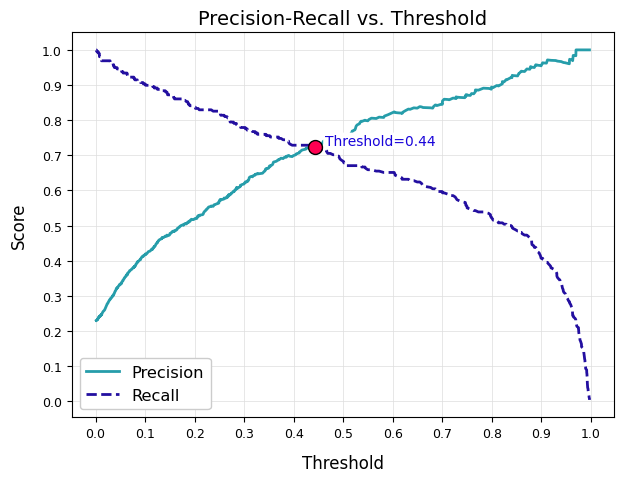

Best Threshold for equal Precision and Recall: 0.44


In [73]:
# ---------------------- MODEL XGBoost: PR vs. Threshold Curves ---------------------- #

pu.plot_pr_tradeoff(y_val_xgb, y_pred_prob_xgb)

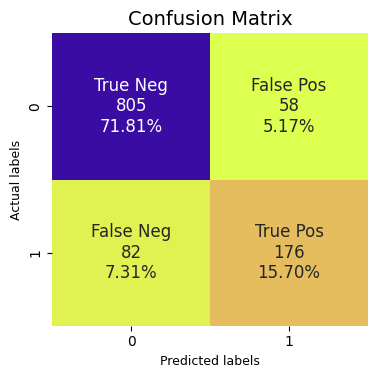

INFO:root:Confusion matrix plotted successfully.


In [74]:
# ---------------------- MODEL XGBoost: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_xgb, y_pred_prob_xgb, threshold = 0.5
                      )

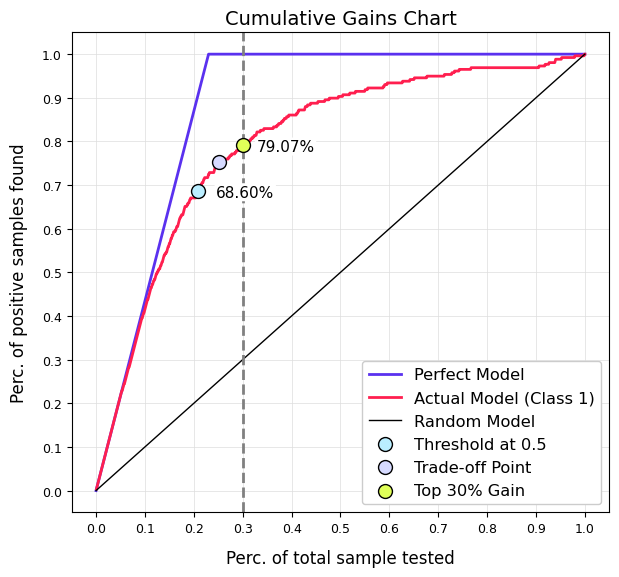

In [75]:
# ---------------------- MODEL XGBoost: Cumulative Gains Charts ---------------------- #
pu.plot_cumulative_gain(
    y_val_xgb, y_pred_prob_xgb, threshold=0.5
    )

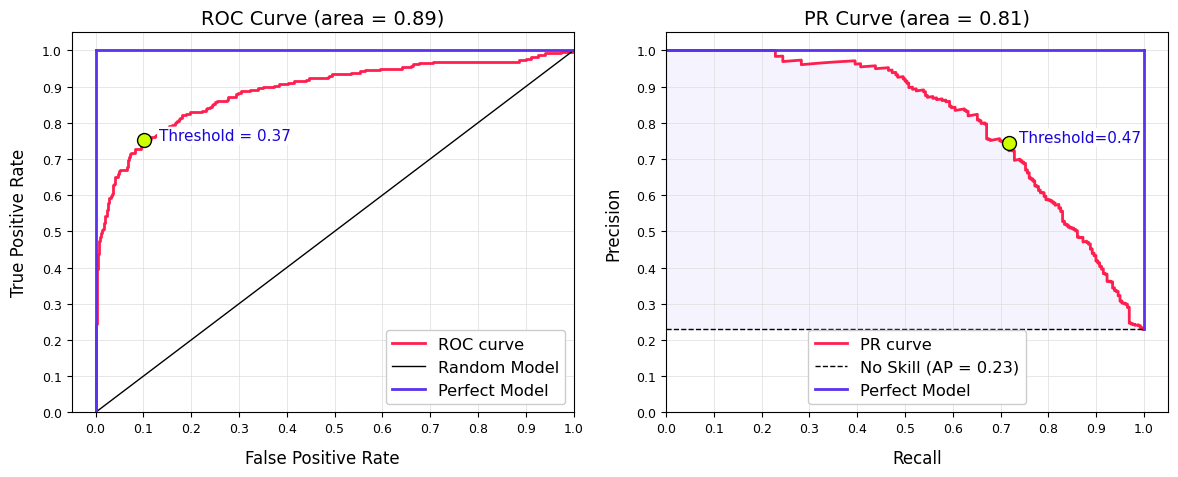

(0.889954817789036, 0.8075391980040295)

In [76]:
# ---------------------- MODEL XGBoost: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_xgb, y_pred_prob_xgb)

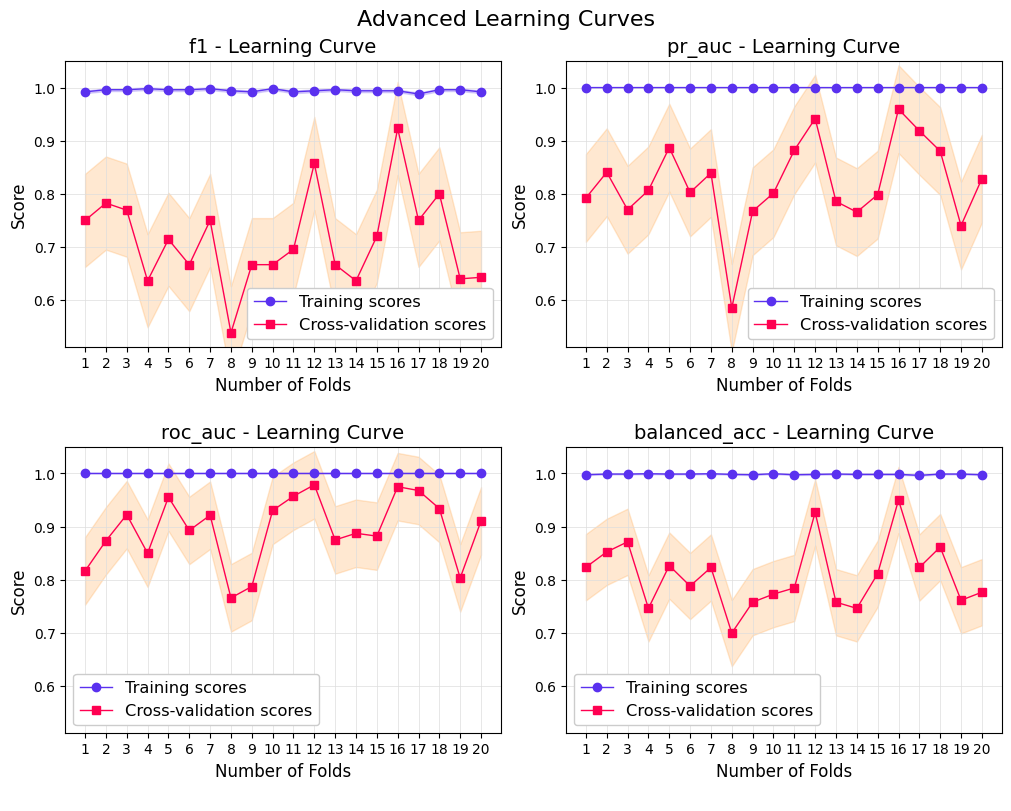

In [77]:
# ---------------------- MODEL XGBoost: Learning Curves ---------------------- #
metrics_to_plot_xgb = ['f1', 'pr_auc','roc_auc','balanced_acc']   # precision', 'f1', 'recall'

# Call the plotting function
pu.plot_advanced_learning_curves(
    train_metrics_xgb,             # Original DataFrame with training metrics for each fold
    val_metrics_xgb,               # Original DataFrame with validation metrics for each fold
    metrics=metrics_to_plot_xgb,                      # List of metrics to plot
)

In [78]:
# ---------------------- MODEL LOGREG: INTERACTIVE Learning Curves ---------------------- #

pu.plot_interactive_learning_curves(
    train_metrics_df=train_metrics_xgb,        # training metrics for each fold
    val_metrics_df=val_metrics_xgb,            # validation metrics for each fold
    metrics=metrics_to_plot_xgb                       # List of metrics to plot
)

## Autoencoder
### Hypertuning

In [ ]:
# ---------------------- MODEL AUTOENCODER: Hyperparameter Tuning with Optuna ---------------------- #

# Suppress specific TensorFlow warnings:
tf.get_logger().setLevel(logging.ERROR)

def build_autoencoder(input_dim, num_layers, units, activation):
    """
    Builds a symmetric autoencoder model based on the specified parameters.
    
    Parameters:
        input_dim (int): Number of input features.
        num_layers (int): Number of layers in the encoder (decoder will mirror this).
        units (int): Number of neurons in each layer of the encoder.
        activation (str): Activation function to use in the layers.

    Returns:
        tf.keras.Model: Compiled autoencoder model.
    """
    input_layer = layers.Input(shape=(input_dim,))
    x = input_layer
    
    # Encoder
    for _ in range(num_layers):
        x = layers.Dense(units, activation=activation)(x)
    
    # Decoder
    for _ in range(num_layers):
        x = layers.Dense(units, activation=activation)(x)
    
    output_layer = layers.Dense(input_dim, activation='sigmoid')(x)
    autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    return autoencoder

# ---------------------- MODEL AUTOENCODER: Optuna optimization function ---------------------- #

def ae_objective(trial, X):
    """
    Objective function for Optuna to optimize autoencoder parameters.
    
    Parameters:
        trial (optuna.trial.Trial): A trial object from Optuna.
        X (pd.DataFrame): Input data for the autoencoder.

    Returns:
        float: Mean squared error of the autoencoder's reconstruction error.
    """
    # Hyperparameters to tune
    num_layers = trial.suggest_int('num_layers', 1, 10)
    units = trial.suggest_int('units', 10, 700)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh', 'softplus'])
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.01)

    # Data preparation
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # K-Fold Cross-Validation
    kf = KFold(n_splits=20)
    scores = []

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_index], X_scaled[test_index]
        
        autoencoder = build_autoencoder(X_train.shape[1], num_layers, units, activation, 
                                        )
        autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mse')
        
        # Early stopping to prevent overfitting
        es_callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        
        # Train the model
        autoencoder.fit(X_train, X_train, epochs=100, batch_size=64, shuffle=True,
                        validation_data=(X_val, X_val), callbacks=[es_callback], verbose=0)
        
        # Evaluate the model
        reconstructed = autoencoder.predict(X_val)
        mse = np.mean(np.power(X_val - reconstructed, 2))
        scores.append(mse)

    return np.mean(scores)

# ---------------------- MODEL AUTOENCODER: Hyperparameter tuning using Optuna ---------------------- #

def hyperparameter_tuning_ae(df, exclude_cols, n_trials=None):
    """
    Conducts hyperparameter tuning for an autoencoder using Optuna.
    
    Parameters:
        - df (pd.DataFrame): The dataset to train the autoencoder on.
        - exclude_cols (list, optional): List of columns to exclude from features.
        - n_trials: Number of trials for hyperparameter optimization.

    Returns:
        dict: Best parameters found by the hyperparameter tuning process.
    """
    X = df.drop(columns=exclude_cols)

    logging.info("Starting hyperparameter tuning for Autoencoder model...")
    
    try:
        # Sampler
        sampler = TPESampler(seed=42)
        #sampler = CmaEsSampler(seed=42)

        # HyperbandPruner
        pruner = HyperbandPruner(min_resource=5, max_resource=50, reduction_factor=2)

        # MedianPruner
        #pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

        # Configuring underlying pruner and the patient pruner
        #underlying_pruner = MedianPruner(n_startup_trials=10, n_warmup_steps=10, interval_steps=2)
        #patient_pruner = PatientPruner(underlying_pruner, patience=3)

        study = optuna.create_study(direction='minimize', sampler=sampler, pruner=pruner)

        study.optimize(lambda trial: ae_objective(trial, X), 
                                                n_trials= n_trials, 
                                                n_jobs= -1
                                                )
        
        best_params = study.best_params

        print("\nBest Parameters for Autoencoder:")
        for key, value in best_params.items():
            print(f"{key}: {value}")

        logging.info("Hyperparameter tuning completed. Best parameters: %s", best_params)

        return best_params

    except Exception as e:
        logging.error(f"Error in hyperparameter tuning: {e}")
        raise

# ---------------------- AUTOENCODER: Execute function to get the best hyperparameters ---------------------- #

best_params_ae = hyperparameter_tuning_ae(
                                        df=df_test_aligned,            # df_train_selected
                                        exclude_cols=['Employee Number'],
                                        n_trials=50
                                        )

### Training

In [83]:
# ---------------------- AUTOENCODER: Trains & Evaluates model with hyperparameters ---------------------- #

def build_autoencoder(input_dim, num_layers, units, activation, learning_rate):
    """
    Builds an autoencoder model with specified parameters.

    Args:
        input_dim (int): Number of features in the input data.
        num_layers (int): Number of layers in both encoder and decoder.
        units (int): Number of neurons in each layer.
        activation (str): Activation function for the layers.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        tf.keras.Model: Compiled autoencoder model.
    """
    model = models.Sequential()
    # Encoder
    for i in range(num_layers):
        model.add(layers.Dense(units, activation=activation, 
                               input_shape=(input_dim,) if i == 0 else None))
    
    # Decoder
    for i in range(num_layers):
        model.add(layers.Dense(units, activation=activation))
    
    # Output layer
    model.add(layers.Dense(input_dim, activation='sigmoid'))

    # Compile the autoencoder
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

def train_autoencoder(X_train, X_val, num_layers, units, activation, learning_rate):
    """
    Trains the autoencoder using the provided training data.

    Args:
        X_train (np.array): Training data for the autoencoder.
        X_val (np.array): Validation data for the autoencoder.
        num_layers (int): Number of layers in the autoencoder.
        units (int): Number of units per layer.
        activation (str): Activation function.
        learning_rate (float): Learning rate for training.

    Returns:
        tf.keras.Model: Encoder part of the autoencoder.
    """
    input_dim = X_train.shape[1]
    autoencoder = build_autoencoder(input_dim, num_layers, units, activation, learning_rate)
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, 
                    validation_data=(X_val, X_val), verbose=0)
    encoder = models.Sequential(autoencoder.layers[:num_layers + 1])  # Ensures only encoder layers
    return encoder

def build_and_train_classifier(X_train, y_train, X_val, y_val):
    """
    Builds and trains a classifier using the encoded features.

    Args:
        X_train (np.array): Encoded training data.
        y_train (np.array): Labels for training data.
        X_val (np.array): Encoded validation data.
        y_val (np.array): Labels for validation data.

    Returns:
        tf.keras.Model: Trained classifier model.
    """
    model = models.Sequential([
        layers.Dense(10, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=64, 
              validation_data=(X_val, y_val), verbose=0)
    return model

def train_evaluate_autoencoder(df, target_col, exclude_cols, hyperparams):
    """
    Full training and evaluation pipeline for autoencoder and subsequent classification.

    Args:
        df (pd.DataFrame): Dataset containing the features and target.
        target_col (str): Name of the target column.
        exclude_cols (list): Columns to exclude from the model training.
        hyperparams (dict): Dictionary of hyperparameters for the autoencoder.

    Returns:
        tuple: Validation labels, predicted probabilities, and metrics.
    """
    try:
        logging.info("Starting the training process...")
        logging.info(f"Using hyperparameters: {hyperparams}")

        # Data preparation
        X = df.drop(columns=exclude_cols + [target_col])
        y = df[target_col].values

        # Feature scaling
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

        # Train autoencoder and encode data
        encoder = train_autoencoder(X_train, X_val, 
                                    hyperparams['num_layers'], 
                                    hyperparams['units'], 
                                    hyperparams['activation'], 
                                    hyperparams['learning_rate'])
        X_train_encoded = encoder.predict(X_train)
        X_val_encoded = encoder.predict(X_val)

        # Train classifier using encoded features
        classifier = build_and_train_classifier(X_train_encoded, y_train, X_val_encoded, y_val)

        # Autoencoder: Generating predictions
        threshold=0.5

        # Evaluate classifier
        y_train_pred_prob = classifier.predict(X_train_encoded).ravel()
        y_val_pred_prob = classifier.predict(X_val_encoded).ravel()

        y_train_pred = (y_train_pred_prob > threshold).astype(int)
        y_val_pred = (y_val_pred_prob > threshold).astype(int)

        # Calculate metrics using the helper function
        metrics = mu.calculate_and_display_metrics(y_train, y_train_pred, y_train_pred_prob, 
                                                y_val, y_val_pred, y_val_pred_prob, 
                                                model_name='Autoencoder')

        return y_val, y_val_pred_prob, metrics

    except Exception as e:
        logging.exception("An error occurred during the training process")
        raise

# ---------------------- Autoencoder: Train & Evaluate ---------------------- #
default_params_ae = {
    'num_layers': 1, 
    'units': 217, 
    'activation': 'tanh', 
    'learning_rate': 0.008460015363053894
    }

y_val_ae, y_pred_prob_ae, metrics_ae = train_evaluate_autoencoder(
    df=df_train_selected,
    target_col='Attrition',
    exclude_cols=['Employee Number'],
    hyperparams=default_params_ae
)


INFO:root: Starting the training process...
INFO:root: Using hyperparameters: {'num_layers': 1, 'units': 217, 'activation': 'tanh', 'learning_rate': 0.008460015363053894}
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Autoencoder - Comparison of Train & Test Metrics:

      Metric  Train Set  Test Set
   precision   0.933333  0.680000
      recall   0.747573  0.653846
          f1   0.830189  0.666667
      pr_auc   0.931227  0.720395
     roc_auc   0.969375  0.862383
balanced_acc   0.865815  0.780680


### Plots

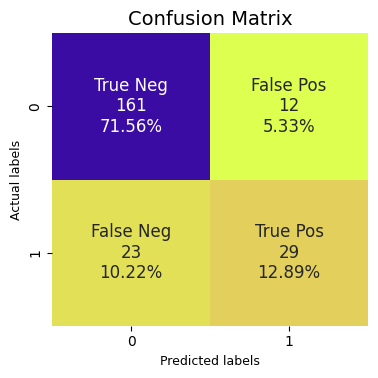

INFO:root:Confusion matrix plotted successfully.


In [80]:
# ---------------------- MODEL Autoencoder: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_ae, y_pred_prob_ae, threshold = 0.5
                      )

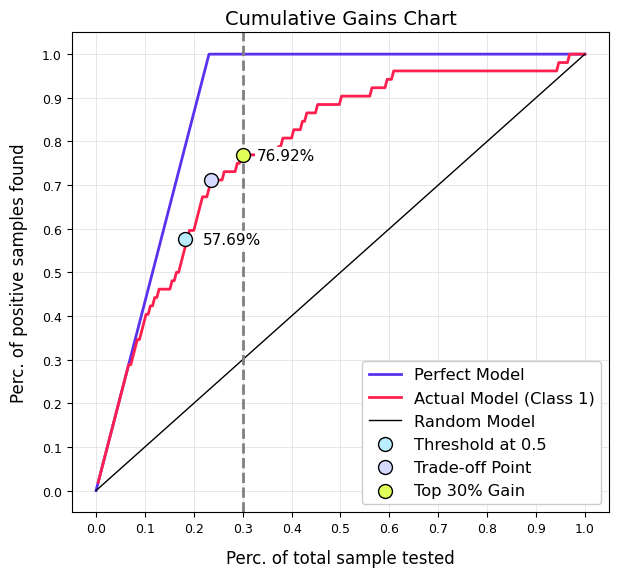

In [81]:
# ---------------------- MODEL Autoencoder: Cumulative Gains Charts ---------------------- #
pu.plot_cumulative_gain(
    y_val_ae, y_pred_prob_ae, threshold=0.5
    )

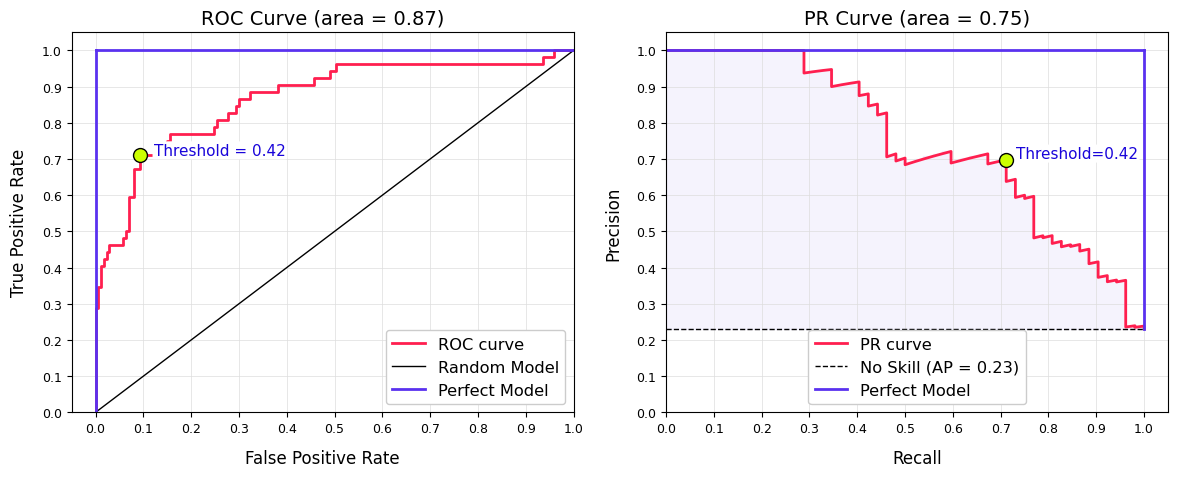

(0.8662738995108937, 0.7470657764272989)

In [82]:
# ---------------------- MODEL Autoencoder: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_ae, y_pred_prob_ae)

## Artificial Neural Network (ANN)
### Hypertuning

In [ ]:
# ---------------------- MODEL ANN: Hyperparameter Tuning with Optuna ---------------------- #

def build_ann(input_dim, num_layers, units, activation):
    """
    Builds an ANN model based on the specified parameters.
    
    Parameters:
        input_dim (int): Number of input features.
        num_layers (int): Number of hidden layers.
        units (int): Number of neurons in each hidden layer.
        activation (str): Activation function for the hidden layers.

    Returns:
        tf.keras.Model: Compiled ANN model.
    """
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    for _ in range(num_layers):
        model.add(layers.Dense(units, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification assumption
    return model

# ---------------------- MODEL ANN: Optuna optimization function ---------------------- #

def ann_objective(trial, X, y):
    """
    Objective function for Optuna to optimize ANN parameters.
    
    Parameters:
        trial (optuna.trial.Trial): A trial object from Optuna.
        X (np.array): Input data for the ANN.
        y (np.array): Target data.

    Returns:
        float: Validation loss of the ANN.
    """
    # Hyperparameters to tune
    num_layers = trial.suggest_int('num_layers', 1, 6)
    units = trial.suggest_int('units', 10, 250)
    activation = trial.suggest_categorical('activation', ['relu', 'softplus', 'tanh'])
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.005)

    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
    class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

    kf = KFold(n_splits= 5)  # Reduced for quicker execution; consider more splits if time allows
    scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = build_ann(X_train.shape[1], num_layers, units, activation)
        optimizer = optimizers.Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR', name='auc')])

        es_callback = callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[es_callback], verbose=0, class_weight=class_weights_dict)

        val_auc = model.evaluate(X_val, y_val, verbose=0)[1]  # [1] to fetch the AUC score
        scores.append(val_auc)

    return -np.mean(scores)  # Minimize negative AUC to maximize AUC

# ---------------------- MODEL ANN: Hyperparameter tuning using Optuna ---------------------- #

def hyperparameter_tuning_ann(df, target_column=None, exclude_cols=None, n_trials=None):
    """
    Conducts hyperparameter tuning for an ANN using Optuna, focusing on handling imbalanced data
    and optimizing based on Precision-Recall AUC.

    Parameters:
        - df (DataFrame): The complete dataset.
        - target_column (str): Name of the target column.
        - exclude_cols (list, optional): List of columns to exclude from features.
        - n_trials: Number of trials for hyperparameter optimization.

    Returns:
        dict: Best parameters found by the hyperparameter tuning process.
    """
    # Call the function to validate input DataFrame and prepare the data for model training
    X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
    y = df[target_column] 

    # Normalize the input features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    logging.info("Starting hyperparameter tuning for ANN model...") 

    try:
        # Sampler
        sampler = TPESampler(seed=42)
        #sampler = CmaEsSampler(seed=42)

        # HyperbandPruner
        pruner = HyperbandPruner(min_resource=5, max_resource=50, reduction_factor=2)

        # MedianPruner
        #pruner = MedianPruner(n_startup_trials= 10, n_warmup_steps= 10, interval_steps=5)

        # Configuring underlying pruner and the patient pruner
        #underlying_pruner = MedianPruner(n_startup_trials=10, n_warmup_steps=10, interval_steps=2)
        #patient_pruner = PatientPruner(underlying_pruner, patience=3)

        study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)

        study.optimize(lambda trial: ann_objective(trial, X_scaled, y), 
                                                n_trials=n_trials, 
                                                n_jobs= -1
                                                )

        best_params = study.best_params

        print("\nBest Parameters for ANN:")
        for key, value in best_params.items():
            print(f"{key}: {value}")

        logging.info("Hyperparameter tuning completed. Best parameters: %s", best_params)

        return best_params

    except Exception as e:
        logging.error("Optuna optimization failed: %s", e)
        best_params = None

# ---------------------- MODEL ANN: Hyperparameter Tuning with Optuna ---------------------- #

best_params_ann = hyperparameter_tuning_ann(
                                        df= df_test_aligned, 
                                        target_col='Attrition',
                                        exclude_cols=['Employee Number'],
                                        n_trials=50
                                        ) 

### Training

In [84]:
# ---------------------- MODEL ANN: Trains & Evaluates model with hyperparameters ---------------------- #

def plot_learning_curves(history):
    """
    Plots learning curves for the training and validation loss.

    Args:
        history: A history object returned by the fit method of keras models.
    """
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------------- MODEL ANN: Build model on parameters Function ---------------------- #

def build_ann(input_dim, num_layers, units, activation):
    """
    Builds an ANN model based on the specified architecture parameters, including regularization and initializer.
    
    Parameters:
        input_dim (int): Number of input features.
        num_layers (int): Number of hidden layers.
        units (int): Number of neurons in each hidden layer.
        activation (str): Activation function for the hidden layers.
        
    Returns:
        tf.keras.Model: Uncompiled ANN model.
    """
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    for _ in range(num_layers):
        model.add(layers.Dense(units, 
                               activation=activation, 
                              ))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# ---------------------- MODEL ANN: Main Training and Evaluation Function ---------------------- #

def train_evaluate_ann(df, target_column=None, exclude_cols=None, hyperparams=None):
    """
    Trains and evaluates an ANN model using the provided hyperparameters and dataset.
    Separates model architecture configuration from optimizer settings.
    
    Parameters:
    - df (pd.DataFrame): The dataset.
    - target_column (str): Name of the target column.
    - exclude_cols (list, optional): List of columns to exclude from features.
    - hyperparams (dict, optional): Hyperparameters for the ANN model.

    Returns:
        Tuple of validation target, prediction probabilities, and metrics DataFrame.
    """
    # Check if hyperparameters are provided
    if hyperparams is None:
        logging.info("No hyperparameters provided. The function will terminate without training the model.")
        return  # raise ValueError("Hyperparameters must be provided.")

    logging.info(f"Received hyperparameters: {hyperparams}\n")

    try:
        # Data preparation
        X, _ = cu.validate_and_prepare(df, target_column, exclude_cols)
        y = df[target_column] 

        # Feature scaling
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

        # Build and compile model
        model = build_ann(X_train.shape[1], 
                        hyperparams['num_layers'], 
                        hyperparams['units'], 
                        hyperparams['activation'],
                        )
        optimizer = tf.keras.optimizers.Adam(learning_rate=hyperparams['learning_rate'])
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR', name='auc')])

        # Training setup
        es_callback = callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)
        batch_size = hyperparams.get('batch_size', 64)
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                            batch_size=batch_size, callbacks=[es_callback], verbose=0)
        #plot_learning_curves(history)
        
        # ANN: Generating predictions
        threshold=0.5

        # Predictions and metrics
        y_train_pred_prob = model.predict(X_train).ravel()
        y_train_pred = (y_train_pred_prob > threshold).astype(int)

        y_val_pred_prob = model.predict(X_val).ravel()
        y_val_pred = (y_val_pred_prob > threshold).astype(int)

        # Evaluation
        metrics = mu.calculate_and_display_metrics(
                y_train,  y_train_pred, y_train_pred_prob,
                y_val, y_val_pred, y_val_pred_prob, model_name='ANN')

        return y_val, y_val_pred_prob, metrics
    
    except Exception as e:
        logging.exception("Failed during the training and evaluation process")
        raise

# ---------------------- ANN: Train & Evaluate ---------------------- #
# Default hyperparameters

default_params_ann = {
    'num_layers': 6,
    'units': 188,
    'activation': 'tanh',
    'learning_rate': 0.004
}


y_val_ann, y_pred_prob_ann, metrics_ann = train_evaluate_ann(
                                df_train_selected, 
                                'Attrition', 
                                ['Employee Number'], 
                                default_params_ann)  # default_params_ann or best_params_ann


INFO:root: Received hyperparameters: {'num_layers': 6, 'units': 188, 'activation': 'tanh', 'learning_rate': 0.004}

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

ANN - Comparison of Train & Test Metrics:

      Metric  Train Set  Test Set
   precision   0.819767  0.627451
      recall   0.684466  0.615385
          f1   0.746032  0.621359
      pr_auc   0.855121  0.759916
     roc_auc   0.931582  0.852268
balanced_acc   0.819769  0.752779


### Plots

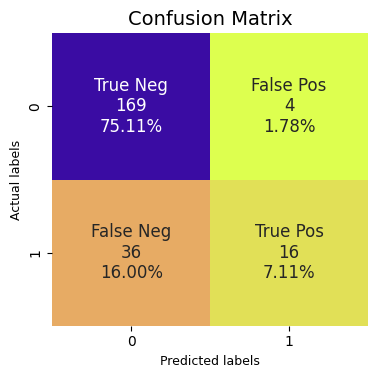

INFO:root:Confusion matrix plotted successfully.


In [84]:
# ---------------------- MODEL ANN: Confusion Matrix ----------------- #

pu.plot_confusion_matrix(
    y_val_ann, y_pred_prob_ann, threshold = 0.5
)

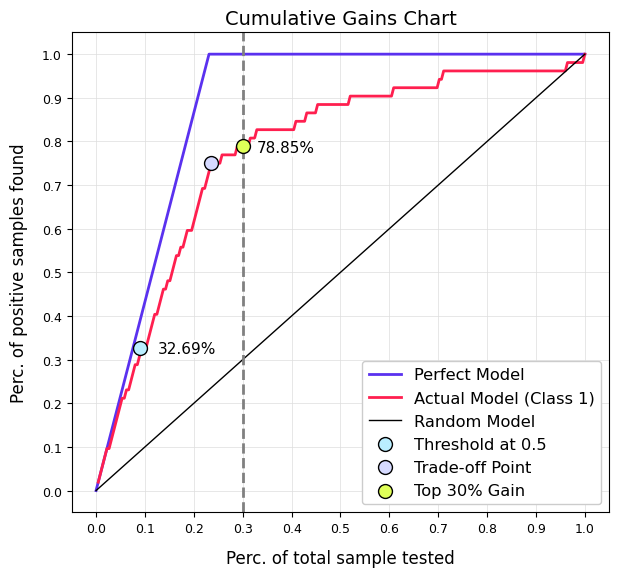

In [85]:
# ---------------------- MODEL ANN: Cumulative Gains Charts ---------------------- #
pu.plot_cumulative_gain(
    y_val_ann, y_pred_prob_ann, threshold=0.5
    )

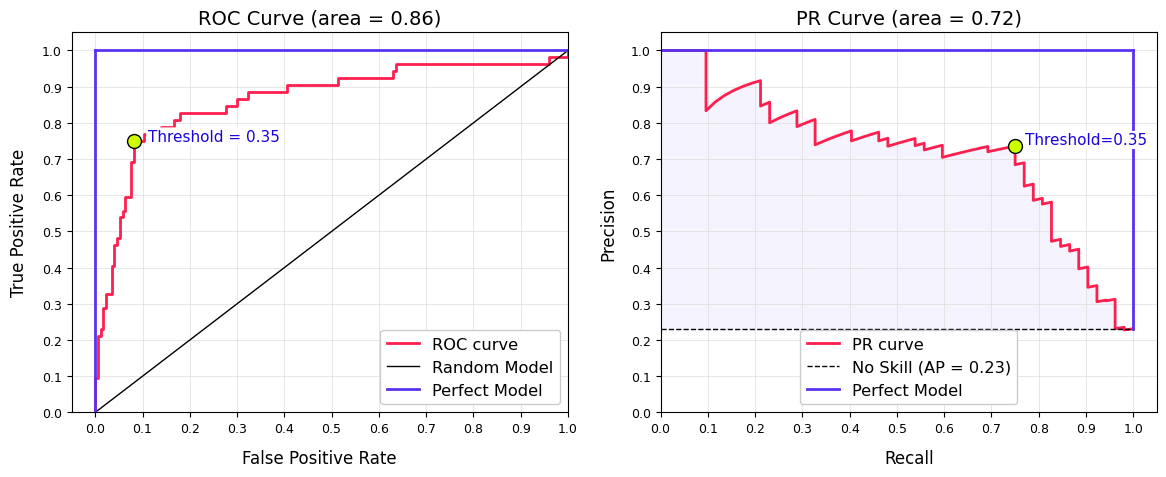

(0.8644953312583369, 0.7155676551444593)

In [86]:
# ---------------------- MODEL ANN: ROC & PR-AUC Curves ---------------------- #

pu.plot_roc_and_precision_recall_curves(y_val_ann, y_pred_prob_ann)

## Model Comparison

### Check of y_vals

In [85]:
# ---------------------- MODEL COMPARISON: Check of y_vals of different models ---------------------- #

y_val_dict = {
    'LogReg': y_val_logreg,
    'LGBM': y_val_lgbm,
    'XGB': y_val_xgb,
}

# Call the function with the dictionary
model_info_df = mu.compare_y_val_arrays(y_val_dict)

INFO:root: Checking lengths of y_val arrays...
INFO:root: All y_val arrays have the same length: 1121
INFO:root: All y_val arrays are identical across models.


  y_val array  Length dUniques Distribution      Order
0      LogReg    1121   [0, 1]   [863, 258]  Identical
1        LGBM    1121   [0, 1]   [863, 258]  Identical
2         XGB    1121   [0, 1]   [863, 258]  Identical


### Model performances

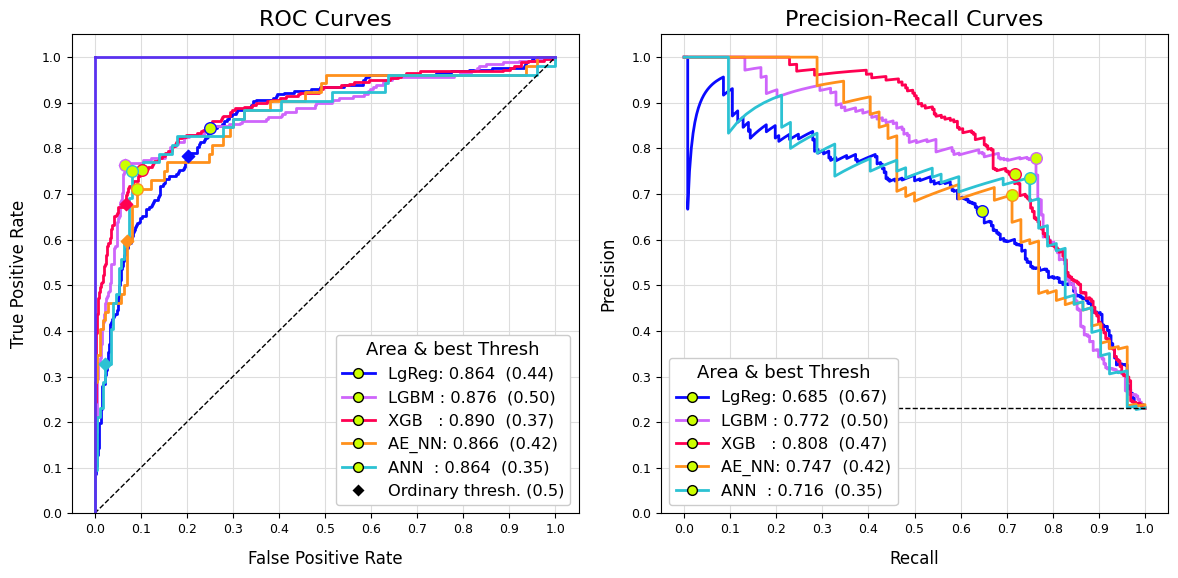

In [88]:
# ---------------------- COMPARE: MULTIPLE ROC & PR CURVES ---------------------- #
models_data = {
    'LgReg': (y_val_logreg, y_pred_prob_logreg),
    'LGBM ': (y_val_lgbm, y_pred_prob_lgbm),
    'XGB   ': (y_val_xgb, y_pred_prob_xgb),
    'AE_NN': (y_val_ae, y_pred_prob_ae),
    'ANN  ': (y_val_ann, y_pred_prob_ann),
}
pu.plot_multiple_roc_prc(models_data)

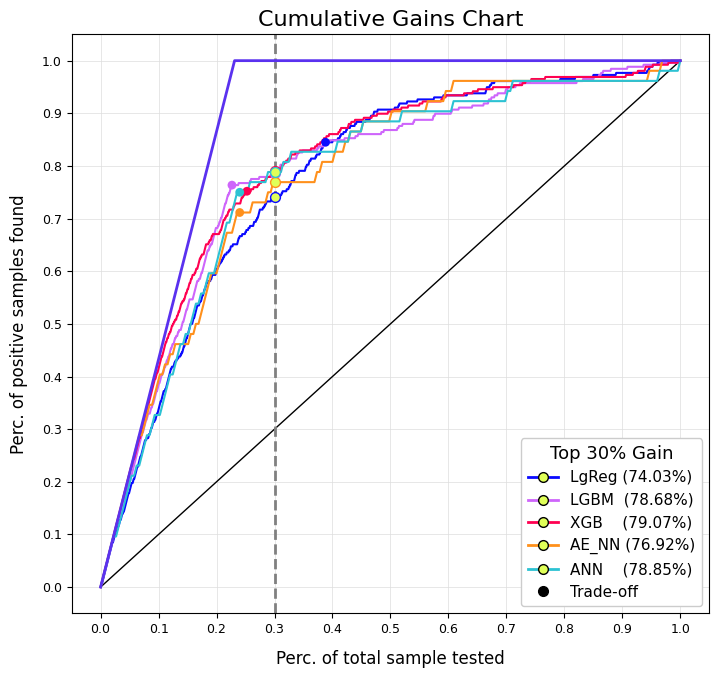

In [89]:
# ---------------------- COMPARE: MULTIPLE CUMULATIVE GAINS CHARTS ---------------------- #
models_data = {
    'LgReg': (y_val_logreg, y_pred_prob_logreg),
    'LGBM ': (y_val_lgbm, y_pred_prob_lgbm),
    'XGB   ': (y_val_xgb, y_pred_prob_xgb),
    'AE_NN': (y_val_ae, y_pred_prob_ae),
    'ANN   ': (y_val_ann, y_pred_prob_ann),
}

pu.plot_multiple_cumulative_gains(models_data)

In [86]:
# ----------------- MODEL PERFORMANCE SUMMARY -------------- #

model_metrics_dict = {
    'Logreg': avg_metrics_logreg,
    'LGBM': avg_metrics_lgbm,
    'XGB': avg_metrics_xgb,
    'AE_NN': metrics_ae,
    'ANN': metrics_ann
}

mu.plot_performance_summary(model_metrics_dict)

    Model  precision    recall        f1    pr_auc   roc_auc  balanced_acc
2     XGB   0.761388  0.666346  0.704437  0.808093  0.895791      0.800152
1    LGBM   0.799066  0.736538  0.760498  0.806537  0.891371      0.839292
4     ANN   0.627451  0.615385  0.621359  0.759916  0.852268      0.752779
0  Logreg   0.554907  0.801923  0.653932  0.739504  0.862514      0.802441
3   AE_NN   0.680000  0.653846  0.666667  0.720395  0.862383      0.780680


# Test & Evaluate Best Final Model(s)

## LGBM

Received hyperparams: {'verbosity': -1, 'objective': 'binary', 'random_state': 42, 'metric': 'aucpr', 'learning_rate': 0.0333980966888203, 'n_estimators': 433, 'num_leaves': 46, 'max_depth': 7, 'min_data_in_leaf': 46, 'bagging_fraction': 0.7258786774198822, 'feature_fraction': 0.9438375022595552, 'lambda_l1': 4.241821386412489, 'lambda_l2': 6.261909012806449, 'bagging_freq': 2, 'scale_pos_weight': 1.9777070892117714}

INFO:root: Model training completed.

LGBM - Comparison of Train & Test Metrics:

      Metric  Train Set  Test Set
   precision   0.897233  0.633803
      recall   0.879845  0.633803
          f1   0.888454  0.633803
      pr_auc   0.956023  0.666275
     roc_auc   0.981801  0.842101
balanced_acc   0.924859  0.781766


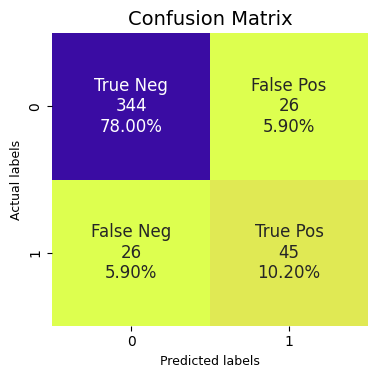

INFO:root: Confusion matrix plotted successfully.


In [100]:
# ---------------------- FINAL MODEL LGBM: Trains and Evaluates the final model ---------------------- #

def train_final_lgbm(df_train, df_test,
                        target_column, Identifier=None, 
                        hyperparams=None, 
                        plot_charts=True, model_name='LGBM',
                        metric='pr_auc', 
                        use_scale_pos_weight=False,
                        smote_sampling_strategy=None):
    """
    Trains and evaluates a LightGBM model with options for SMOTE and dynamic is_unbalance adjustment.

    Parameters:
    - df_train (pd.DataFrame): DataFrame containing the training data features and target column.

    - target_column (str): Name of the target column in df.
    - Identifier (list of str, optional): Unique ID
    - hyperparams (dict, optional): Dictionary of hyperparameters for LightGBM.
    - plot_charts (bool, optional): If True, plots evaluation charts.
    - model_name (str, optional): Name of the model for display purposes.
    - use_scale_pos_weight (bool, optional): If True, dynamically adjusts is_unbalance or scale_pos_weight for binary tasks.
    - smote_sampling_strategy (None, str, or float, optional): Controls the SMOTE application. If None or "0", SMOTE is not applied. If set to "auto" or a float between 0 and 1, SMOTE is applied.

    Returns:
    - Tuple: (trained model, evaluation metrics DataFrame, test dataset features, 
             test dataset target, training dataset features, training dataset target, 
             test predicted probabilities)
    """
    # Define default hyperparameters
    default_hyperparams = {
        'verbosity': -1,
        'objective': 'binary',
        'random_state': 42,
        'metric': 'aucpr',
    }
    # Validate and merge hyperparameters
    if hyperparams is not None:
        if not isinstance(hyperparams, dict):
            raise TypeError("Hyperparameters must be a dictionary.")
        hyperparams = {**default_hyperparams, **hyperparams}
    else:
        hyperparams = default_hyperparams.copy()

    # Check if hyperparams are provided and valid
    print(f"Received hyperparams: {hyperparams}\n")

    # Prepare training data
    X_train, _ = cu.validate_and_prepare(df_train, target_column, Identifier)
    y_train = df_train[target_column]
    
    # # Prepare test data
    X_test, _ = cu.validate_and_prepare(df_test, target_column, Identifier)
    y_test = df_test[target_column]

    Identifier = df_test[Identifier[0]]  

    # Handle class imbalance with SMOTE if requested
    if smote_sampling_strategy and 0 < smote_sampling_strategy < 1:
        smote = SMOTE(random_state=42, sampling_strategy=smote_sampling_strategy)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        logging.info(f"After SMOTE: X_train shape: {X_train.shape}, y_train distribution: {np.bincount(y_train)}")

    # Prepare data for LGBM
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Train the LightGBM model
    with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):

        # Configure callbacks including early stopping
        callbacks = [
            lgb.early_stopping(stopping_rounds=100, verbose=False),
            lgb.log_evaluation(period=0)  # Adjust period or remove as needed
        ]

        model = lgb.train(
            params=hyperparams,
            train_set=train_data,
            num_boost_round=hyperparams.get('n_estimators', 100),
            feval = mu.lgbm_custom_eval(metric),
            valid_sets=[train_data, test_data],
            valid_names=['training', 'test'],
            callbacks=callbacks,
        )

    # LGBM: Generating predictions and probabilities for evaluation
    # Change the threshold
    threshold=0.47

    y_train_pred_prob = model.predict(X_train)
    y_train_pred = (y_train_pred_prob >= threshold).astype(int)
    
    y_test_pred_prob = model.predict(X_test)
    y_test_pred = (y_test_pred_prob >= threshold).astype(int)

    logging.info("Model training completed.")

    # Return & display metrics df for comparisonm
    metrics_df = mu.calculate_and_display_metrics(
        y_train, y_train_pred, y_train_pred_prob,
        y_test, y_test_pred, y_test_pred_prob,
        model_name=model_name
    )

    # Creating the predictions DataFrame
    predictions_df = pd.DataFrame({
        'Identifier': Identifier,  # Series, not DataFrame
        'Prediction_Probability': y_test_pred_prob,
        'Predicted_Class': y_test_pred
    })

    # Plotting evaluation charts if plot_charts is True
    if plot_charts:
        pu.plot_confusion_matrix(y_test, y_test_pred)

    return model, predictions_df, metrics_df, X_test, y_test, y_test_pred_prob

# ---------------------- FINAL MODEL LGBM: Training & Evaluation ---------------------- #
# Default hyperparameters
default_params_lgbm = {
        'learning_rate': 0.0333980966888203, 
        'n_estimators': 433, 
        'num_leaves': 46, 
        'max_depth': 7, 
        'min_data_in_leaf': 46, 
        'bagging_fraction': 0.7258786774198822, 
        'feature_fraction': 0.9438375022595552, 
        'lambda_l1': 4.241821386412489, 
        'lambda_l2': 6.261909012806449, 
        'bagging_freq': 2, 
        'scale_pos_weight': 1.9777070892117714
        }

model_lgbm, predictions_lgbm, metrics_lgbm, X_test_lgbm, y_test_lgbm, y_test_pred_prob_lgbm = train_final_lgbm(
            df_train=df_train_selected,
            df_test=df_test_aligned,
            target_column='Attrition',
            Identifier=['Employee Number'],
            hyperparams= default_params_lgbm,   # default_params_lgbm or best_params_lgbm
            metric='pr_auc',
        )

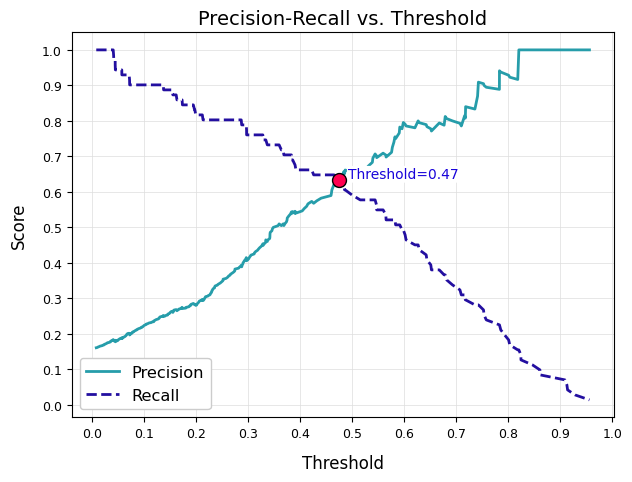

Best Threshold for equal Precision and Recall: 0.47


In [101]:
# ---------------------- MODEL LGBM: PR vs. Threshold Curves ---------------------- #
pu.plot_pr_tradeoff(y_test_lgbm, y_test_pred_prob_lgbm)

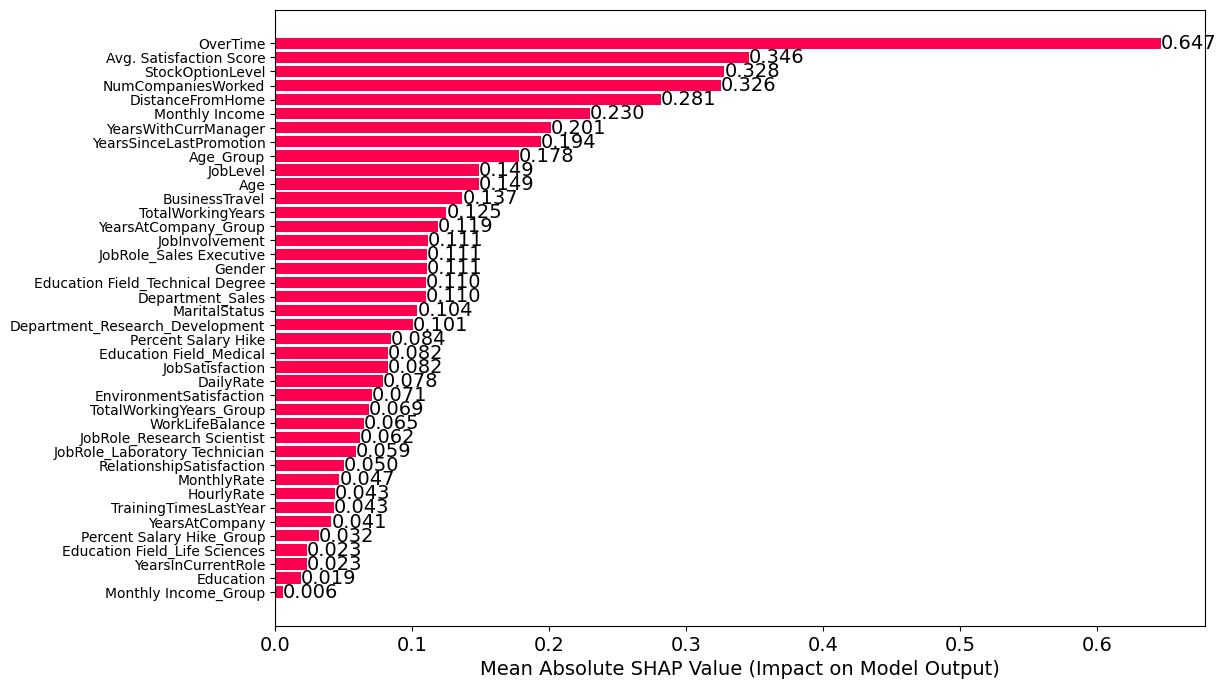


Features and their corresponding SHAP values in descending order:
                             Feature  Mean Absolute SHAP Value
0                           OverTime                  0.646581
1            Avg. Satisfaction Score                  0.345712
2                   StockOptionLevel                  0.327956
3                 NumCompaniesWorked                  0.325668
4                   DistanceFromHome                  0.281349
5                     Monthly Income                  0.229634
6               YearsWithCurrManager                  0.201492
7            YearsSinceLastPromotion                  0.194144
8                          Age_Group                  0.177712
9                           JobLevel                  0.148816
10                               Age                  0.148752
11                    BusinessTravel                  0.136802
12                 TotalWorkingYears                  0.124991
13              YearsAtCompany_Group               

In [92]:
# ---------------------- FINAL MODEL LGBM: SHAP analysis function for model ---------------------- #
shap_values_lgbm = pu.shap_analysis(model_lgbm, 
                                X_test_lgbm,
                                show_dataframe=True)

## ANN

INFO:root: Received hyperparameters: {'num_layers': 6, 'units': 188, 'activation': 'tanh', 'learning_rate': 0.004}

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

ANN Model - Comparison of Train & Test Metrics:

      Metric  Train Set  Test Set
   precision   0.813253  0.701754
      recall   0.523256  0.563380
          f1   0.636792  0.625000
      pr_auc   0.781015  0.664871
     roc_auc   0.889331  0.851504
balanced_acc   0.743667  0.758717


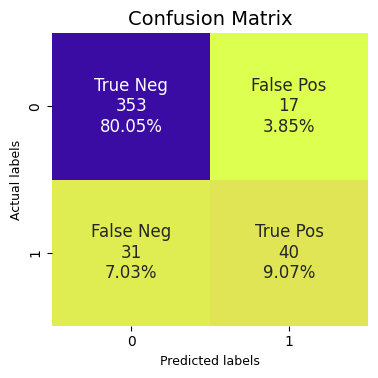

INFO:root: Confusion matrix plotted successfully.


In [102]:
# ---------------------- FINAL MODEL ANN: Trains and Evaluates the final model ---------------------- #

def build_ann(input_dim, num_layers, units, activation):
    """
    Builds an ANN model based on the specified architecture parameters, including regularization and initializer.
    
    Parameters:
        input_dim (int): Number of input features.
        num_layers (int): Number of hidden layers.
        units (int): Number of neurons in each hidden layer.
        activation (str): Activation function for the hidden layers.
        
    Returns:
        tf.keras.Model: Uncompiled ANN model.
    """
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    for _ in range(num_layers):
        model.add(layers.Dense(units, 
                               activation=activation, 
                              ))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


def final_train_evaluate_ann(df_train, df_test, 
                             target_col, exclude_cols, 
                             hyperparams, plot_charts=True):
    """
    Final training and evaluation of an ANN model using both training and test datasets.
    """
    logging.info(f"Received hyperparameters: {hyperparams}\n")

    try:
        # Data preparation
        X_train = df_train.drop(columns=exclude_cols + [target_col])
        y_train = df_train[target_col]
        X_test = df_test.drop(columns=exclude_cols + [target_col])
        y_test = df_test[target_col]

        Identifier = df_test[exclude_cols[0]]  

        # Feature scaling
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model building and compilation
        model = build_ann(X_train_scaled.shape[1], 
                        hyperparams['num_layers'], 
                        hyperparams['units'], 
                        hyperparams['activation']
                        )
        
        optimizer = tf.keras.optimizers.Adam(learning_rate=hyperparams['learning_rate'])
        
        # Compile the model
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR', name='auc')])

        # Training with early stopping
        es_callback = callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)
        batch_size = hyperparams.get('batch_size', 64) 
         
        model.fit(X_train_scaled, y_train, epochs=100, 
                  batch_size=batch_size, 
                  validation_data=(X_test_scaled, y_test), 
                  callbacks=[es_callback], verbose=0)

        # ANN: Generating predictions
        threshold=0.45

        # Predictions
        y_train_pred_prob = model.predict(X_train_scaled).ravel()
        y_train_pred = (y_train_pred_prob > threshold).astype(int)

        y_test_pred_prob = model.predict(X_test_scaled).ravel()
        y_test_pred = (y_test_pred_prob > threshold).astype(int)

        # Evaluation
        metrics_df = mu.calculate_and_display_metrics(
            y_train, y_train_pred, y_train_pred_prob,
            y_test, y_test_pred, y_test_pred_prob,
            model_name='ANN Model'
        )

        # Creating the predictions DataFrame
        predictions_df = pd.DataFrame({
            'Identifier': Identifier,  # Series, not DataFrame
            'Prediction_Probability': y_test_pred_prob,
            'Predicted_Class': y_test_pred
        })

        if plot_charts:
            pu.plot_confusion_matrix(y_test, y_test_pred)

        return model, predictions_df, metrics_df, X_test, y_test, y_test_pred_prob
    except Exception as e:
        logging.exception("Failed during the final training and evaluation process")
        raise

# ---------------------- FINAL MODEL ANN: Training & Evaluation ---------------------- #

model_ann, predictions_ann, metrics_ann, X_test_ann, y_test_ann, y_test_pred_prob_ann = final_train_evaluate_ann(
        df_train_selected, 
        df_test_aligned, 
        'Attrition', 
        ['Employee Number'], 
        default_params_ann,
        )


## Final Comparison

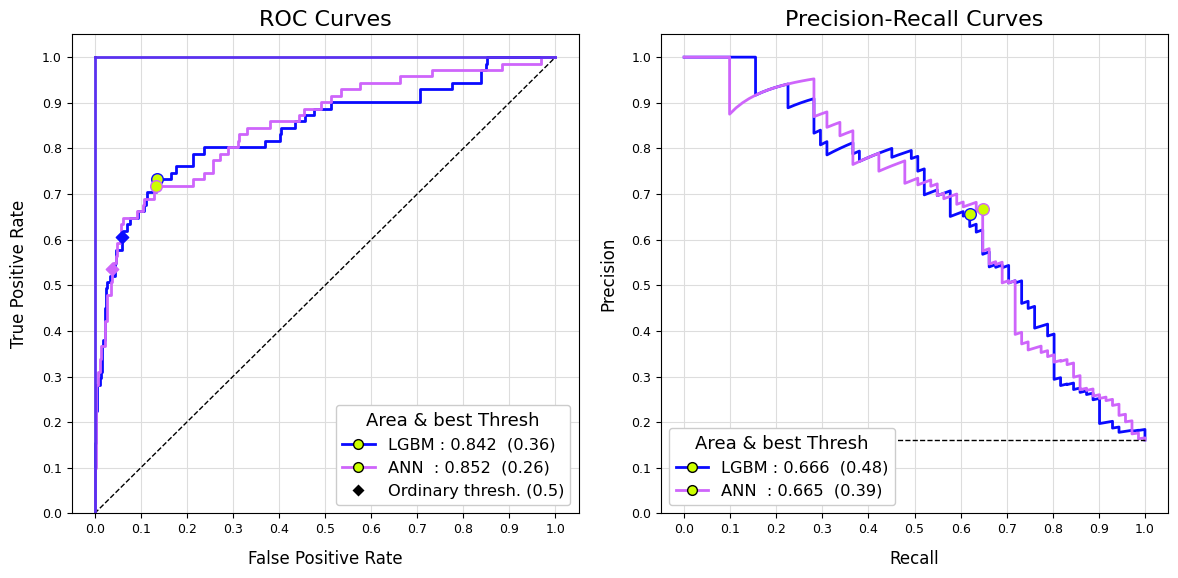

In [103]:
# ---------------------- FINAL MODEL Comparison: MULTIPLE ROC & PR CURVES ---------------------- #
final_comparison_1 = {
    'LGBM ': (y_test_lgbm, y_test_pred_prob_lgbm),
    'ANN  ': (y_test_ann, y_test_pred_prob_ann)
}
pu.plot_multiple_roc_prc(final_comparison_1)

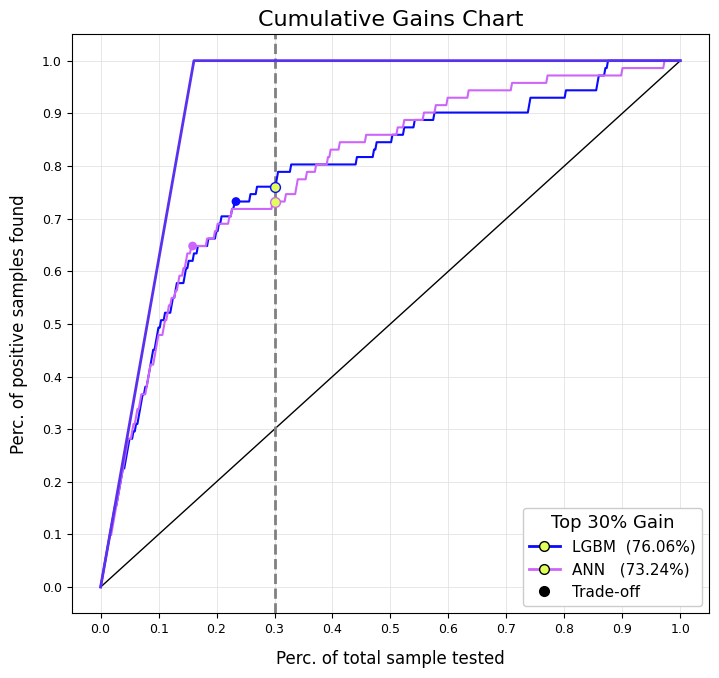

In [104]:
# ---------------------- COMPARE: MULTIPLE CUMULATIVE GAINS CHARTS ---------------------- #
final_comparison_2 = {
    'LGBM ': (y_test_lgbm, y_test_pred_prob_lgbm),
    'ANN  ': (y_test_ann, y_test_pred_prob_ann)
}

pu.plot_multiple_cumulative_gains(final_comparison_2)

In [105]:
# ----------------- MODEL PERFORMANCE SUMMARY -------------- #
final_metrics_dict = {
    'LGBM': metrics_lgbm,
    'ANN': metrics_ann,
}

mu.plot_performance_summary(final_metrics_dict)

  Model  precision    recall        f1    pr_auc   roc_auc  balanced_acc
0  LGBM   0.633803  0.633803  0.633803  0.666275  0.842101      0.781766
1   ANN   0.701754  0.563380  0.625000  0.664871  0.851504      0.758717


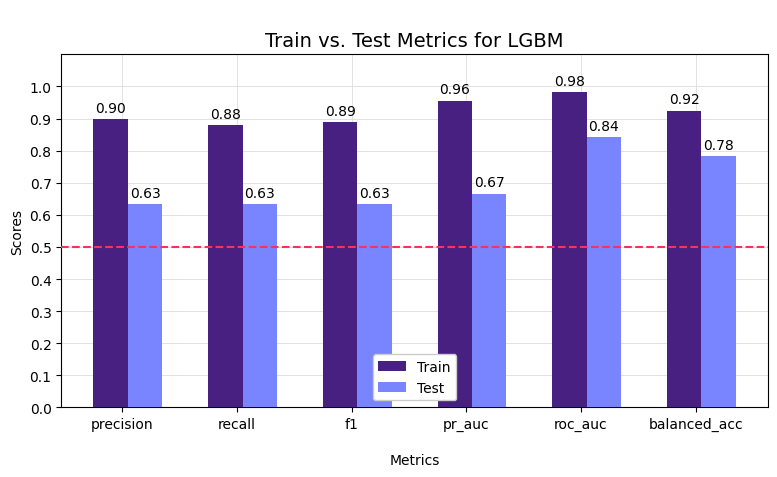

In [106]:
# ---------------------- FINAL MODEL LGBM: Comparison of Train & Test metrics -------------------- #

pu.compare_train_val_metrics(metrics_lgbm, model_name='LGBM')

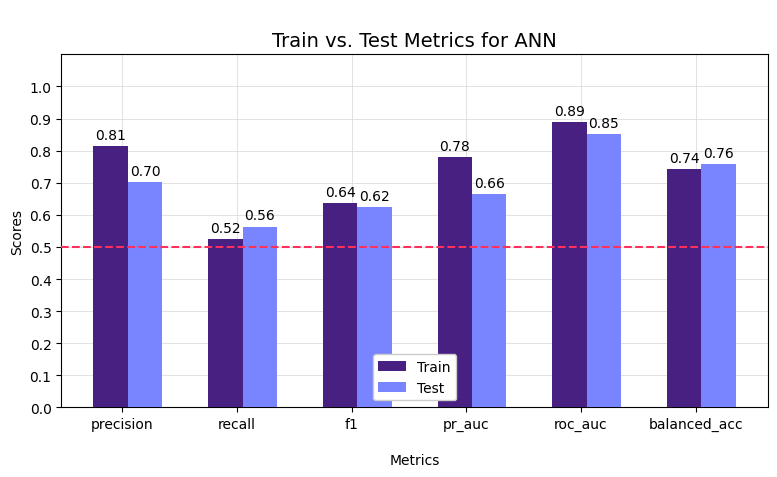

In [107]:
# ---------------------- FINAL MODEL ANN: Comparison of Train & Test metrics -------------------- #

pu.compare_train_val_metrics(metrics_ann, model_name='ANN')

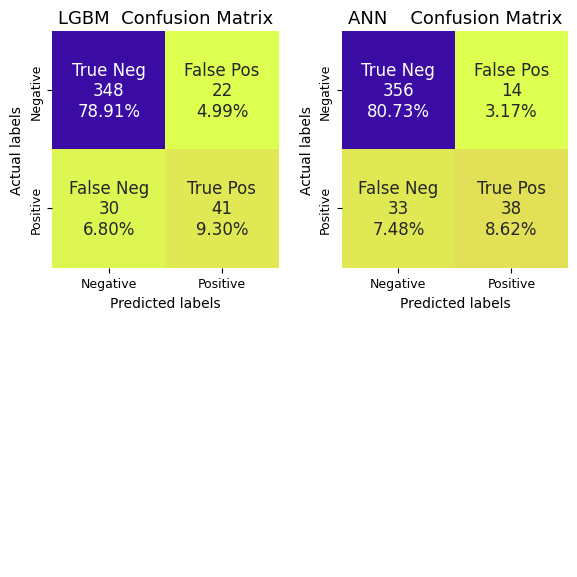

INFO:root: Multiple confusion matrices plotted successfully.


In [108]:
# ---------------------- FINAL MODEL Comparison: Confusion Matrices -------------------- #
models_data = {
    'LGBM ': (y_test_lgbm, y_test_pred_prob_lgbm),
    'ANN   ': (y_test_ann, y_test_pred_prob_ann)
}

pu.panel_of_confusion_matrices(models_data,threshold=0.5)

## Process Prediction 

In [109]:
# ---------------------- Function to LOAD DATA & DF ---------------------- #

df_test_binned = manager.load_data("df_test_binned.parquet", "Saved_Dataframes")

INFO:root: No JSON dtype file found. Data types might not be fully restored.
INFO:root: 'df_test_binned.parquet' loaded successfully from C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\df_test_binned.parquet, 
 -> shape: (441, 56)



In [112]:
# ----------------- FINAL MODEL LGBM: Create predictions & probabilities -------------- #

mu.create_predictions(predictions_lgbm, model_name='LGBM')

INFO:root: Displaying top 10 predictions for LGBM:

     Employee Number  Prediction_Probability  Predicted_Class
1254           E_622                0.956137                1
1291          E_1427                0.928401                1
221           E_1108                0.914125                1
1063          E_1273                0.912757                1
812            E_614                0.909046                1
682           E_1504                0.861438                1
846           E_1968                0.860959                1
120           E_1079                0.846631                1
1424            E_65                0.824523                1
1121           E_454                0.824345                1

Predicted_Class
0    370
1     71

LGBM: Number of pos. labeled over >70% probability: 29


In [107]:
# ----------------- FINAL MODEL ANN: Create predictions & probabilities -------------- #

mu.create_predictions(predictions_ann, model_name='ANN')

INFO:root:Displaying top 10 predictions for ANN:



     Identifier  Prediction_Probability  Predicted_Class
1028      E_994                  0.9856                1
1063     E_1273                  0.9809                1
221      E_1108                  0.9805                1
1238      E_960                  0.9786                1
601      E_1053                  0.9774                1
1244       E_55                  0.9747                1
410      E_1016                  0.9716                1
639      E_1878                  0.9686                1
352      E_1752                  0.9492                1
1116      E_167                  0.9439                1

Predicted_Class
0    391
1     50

ANN: Number of pos. labeled over >70% probability: 31


In [110]:
# ----------------- FINAL MODEL Evaluation: Actual vs. prediction -------------------- #
actual_pred_dict = {
    'LGBM': predictions_lgbm,
    'ANN': predictions_ann
}

evaluation_results = mu.evaluate_predictions(
    df_predictions_dict=actual_pred_dict,
    df_actuals=df_test_aligned,
    Identifier='Employee Number',
    target_column='Attrition'
)

  Model | Actual (total) |      Predicted | Correct Predictions |    F1 | PR_AUC | ROC_AUC | Balanced_Acc |
0  LGBM |  TP:71, TN:370 |  P: 71, N: 370 |     TP: 45, TN: 344 |  0.63 |   0.67 |    0.84 |         0.78 |
1   ANN |  TP:71, TN:370 |  P: 57, N: 384 |     TP: 40, TN: 353 |  0.62 |   0.67 |    0.85 |         0.76 |


In [113]:
output_lgbm = pd.merge(df_test_binned, predictions_lgbm, on='Employee Number', how='left')

output_lgbm.head()

Age  Attrition  Avg. Satisfaction Score  BusinessTravel  DailyRate  Department_Human Resources  Department_Research_Development  Department_Sales  DistanceFromHome  Education  Education Field_Human Resources  Education Field_Life Sciences  Education Field_Marketing  Education Field_Medical  Education Field_Other  Education Field_Technical Degree Employee Number  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole_Healthcare Representative  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  JobRole_Research Scientist  JobRole_Sales Executive  JobRole_Sales Representative  JobSatisfaction  MaritalStatus  Monthly Income  MonthlyRate  NumCompaniesWorked  Over18  OverTime  Percent Salary Hike  Performance Rating  Placeholder  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0   39          1                      3.0               2        203                           0                                1                 0                 2          3                                0                              1                          0                        0                      0                                 0          E_1127                        1       0          84               3         4                                  1                        0                              0                0                               0                          0                           0                        0                             0                4              3           12169        13547                   7       1         0                   11                   3            0                         4             80                 3                 21                      4                3              18                   7   
1   34          0                      3.0               1        810                           0                                0                 1                 8          2                                0                              0                          0                        0                      0                                 1          E_1823                        2       0          92               4         2                                  0                        0                              0                0                               0                          0                           0                        1                             0                3              2            6799        22128                   1       1         0                   21                   4            0                         3             80                 2                 10                      5                3              10                   8   
2   32          0                      2.6               0        862                           0                                0                 1                 2          1                                0                              1                          0                        0                      0                                 0          E_1190                        3       1          76               3         1                                  0                        0                              0                0                               0                          0                           0                        0                             1                1              3            2827        14947                   1       1         0                   12                   3            0                         3             80                 3                  1                      3                3               1                   0   
3   35     

In [114]:
# ------------------- Execute save dataframes function & print results ----------------- #

## PARQUET
manager.save_df(output_lgbm, 'output_lgbm', 'Saved_Dataframes', 'parquet')

## CSV
manager.save_df(output_lgbm, 'output_lgbm', 'Saved_Dataframes', 'csv')


INFO:root: 'output_lgbm.parquet' saved successfully.
INFO:root: Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\output_lgbm_dtypes.json

INFO:root: 'output_lgbm.csv' saved successfully.
INFO:root: Data types JSON saved successfully at C:/Users/Barba/BT_Employee_Attrition\Saved_Dataframes\output_lgbm_dtypes.json



<img src="data/bt.png" width="125" height="125" style="float: left;"/>